In [7]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset from Colab
from google.colab import files
uploaded = files.upload()


Saving Health Dataset4.csv to Health Dataset4.csv


In [8]:
# Read the dataset
df = pd.read_csv('Health Dataset4.csv')

# Summary for general info
print("Summary for general info:")
df.info()

# Summary for descriptive statistics for numeric columns
print("\nSummary for descriptive statistics for numeric columns:")
print(df.describe())


Summary for general info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21022 entries, 0 to 21021
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        21022 non-null  object 
 1   Year                           21022 non-null  int64  
 2   Cost of a healthy diet         20740 non-null  float64
 3   Income                         20761 non-null  float64
 4   Inflation                      20967 non-null  float64
 5   Child mortality rate           21022 non-null  float64
 6   Unemployment Rate              20981 non-null  float64
 7   Life expectancy                21022 non-null  float64
 8   Incomplete tertiary education  21022 non-null  float64
 9   Gini coefficient               20761 non-null  float64
 10  Diabetes                       20992 non-null  float64
 11  BMI (female)                   20997 non-null  float64
 12  Cardiovascular disea

#**Data Cleaning**

## Identify and Handle Duplicates

In [ ]:
# Identify duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Inspect duplicate rows
print(df[df.duplicated(keep=False)])

# Drop rows where all values are NaN (completely blank rows)
df.dropna(how='all', inplace=True)


Number of duplicate rows: 0
Empty DataFrame
Columns: [Country, Year, Cost of a healthy diet, Income, Inflation, Child mortality rate, Unemployment Rate, Life expectancy, Incomplete tertiary education, Gini coefficient, Diabetes, BMI (female), Cardiovascular diseases, BMI (male), Sex ratio, GDP, Median age, CPI]
Index: []


Based on the above results, all the duplicates are blank rows (rows where all columns are NaN or empty), and I will drop those blank rows entirely

In [ ]:
# Drop rows where all values are NaN (all blank rows)
df.dropna(how='all', inplace=True)

# Drop duplicate rows (keep first occurrence)
df.drop_duplicates(inplace=True)

# Check remaining duplicates
print(f"Duplicates after dropping: {df.duplicated().sum()}")

Duplicates after dropping: 0


After removed the blank rows and verified there is no duplicates in this dataset.

##Identify Missing Data

In [9]:
# Identify number of missing values per column

print("\nCount of missing values:")
print(df.isnull().sum())


Count of missing values:
Country                            0
Year                               0
Cost of a healthy diet           282
Income                           261
Inflation                         55
Child mortality rate               0
Unemployment Rate                 41
Life expectancy                    0
Incomplete tertiary education      0
Gini coefficient                 261
Diabetes                          30
BMI (female)                      25
Cardiovascular diseases           50
BMI (male)                        25
Sex ratio                          0
GDP                               50
Median age                         0
CPI                               54
dtype: int64


# QQ Plot of Residuals, Residuals vs. Fitted Values Plot
This plot helps check for the assumptions of linearity and constant variance for a linear regression model.

If curved residual patterns, it indicates that the relationship between predictors and the target is not linear that a linear model may be inappropriate.

The funnel shapes increasing or decreasing spread, which means the variance of the residuals is not constant across all fitted values. This violates one of the key assumptions of linear regression and can lead to inefficient and biased estimates



Modeling for: Life expectancy


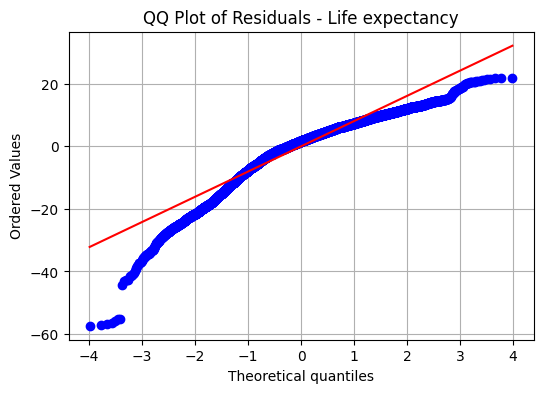

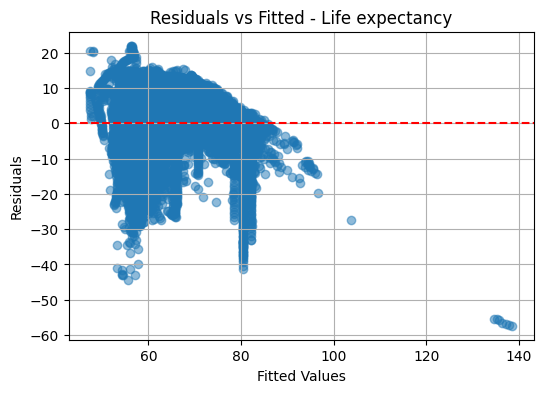

Residuals Summary:
  Mean: 0.0001
  Std Dev: 8.3820
  Skewness: -1.1880
  Kurtosis: 2.0946
  Shapiro-Wilk: Statistic=0.9266, p-value=0.0000
 Residuals deviate from normality.

Modeling for: Cardiovascular diseases


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20740.
  res = hypotest_fun_out(*samples, **kwds)


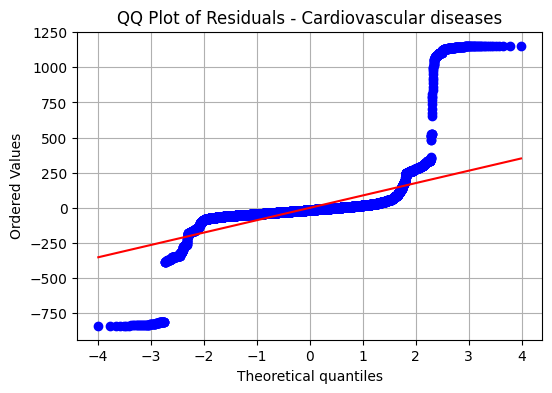

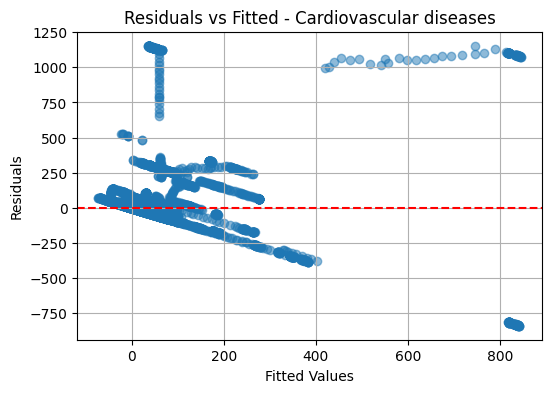

Residuals Summary:
  Mean: 0.0005
  Std Dev: 138.6809
  Skewness: 4.8048
  Kurtosis: 44.4306
  Shapiro-Wilk: Statistic=0.4036, p-value=0.0000
 Residuals deviate from normality.

Modeling for: Diabetes


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20740.
  res = hypotest_fun_out(*samples, **kwds)


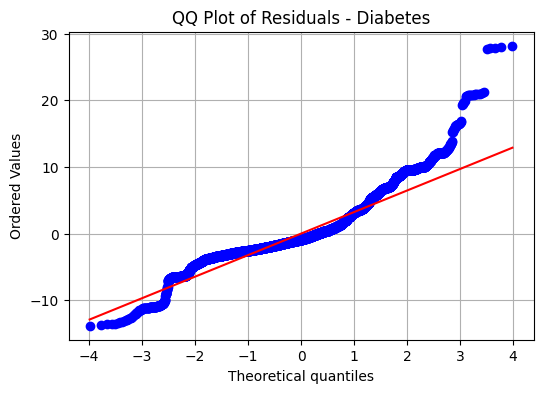

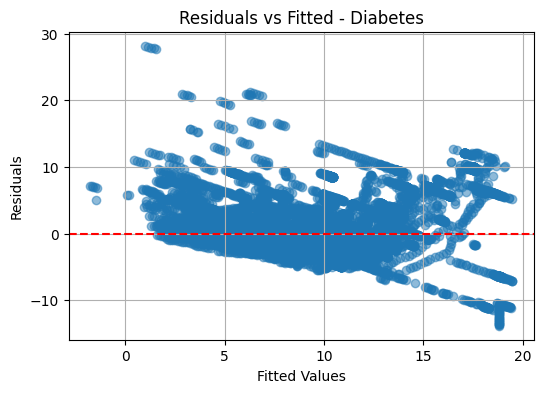

Residuals Summary:
  Mean: 0.0001
  Std Dev: 3.4359
  Skewness: 1.3190
  Kurtosis: 4.0660
  Shapiro-Wilk: Statistic=0.8846, p-value=0.0000
 Residuals deviate from normality.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20740.
  res = hypotest_fun_out(*samples, **kwds)


In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

# List of predictors (make sure column names match exactly in your dataframe)
features = [
    'Income', 'GDP', 'CPI', 'Sex ratio',
    'BMI (female)', 'Cost of a healthy diet', 'Inflation',
    'Incomplete tertiary education', 'Gini coefficient', 'Median age'
]

# Loop through each target variable
for target in ['Life expectancy', 'Cardiovascular diseases', 'Diabetes']:
    print(f"\nModeling for: {target}")

    # Subset and drop rows with missing values
    model_data = df[[target] + features].dropna()
    X = model_data[features]
    y = model_data[target]

    # Add constant (intercept)
    X = sm.add_constant(X)

    # Fit OLS regression model
    model = sm.OLS(y, X).fit()
    residuals = model.resid

    # --- QQ Plot ---
    plt.figure(figsize=(6, 4))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'QQ Plot of Residuals - {target}')
    plt.grid(True)
    plt.show()

    # --- Residuals vs. Fitted Values Plot ---
    plt.figure(figsize=(6, 4))
    plt.scatter(model.fittedvalues, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs Fitted - {target}')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

    # --- Residual Summary ---
    print("Residuals Summary:")
    print(f"  Mean: {residuals.mean():.4f}")
    print(f"  Std Dev: {residuals.std():.4f}")
    print(f"  Skewness: {residuals.skew():.4f}")
    print(f"  Kurtosis: {residuals.kurtosis():.4f}")

    # --- Shapiro-Wilk Test for Normality ---
    shapiro_test = stats.shapiro(residuals)
    print(f"  Shapiro-Wilk: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")
    if shapiro_test.pvalue > 0.05:
        print(" Residuals are approximately normal.")
    else:
        print(" Residuals deviate from normality.")

The results of the QQ plot and Residual vs Fitted value:

1. Life Expectancy
The residuals for the life expectancy model have a near-zero mean, which is good. However, they exhibit moderate left skew (skewness = -1.19) and slightly lower-than-normal kurtosis (2.09), suggesting they are not perfectly normally distributed. The Shapiro-Wilk test confirms this, with a p-value of 0.0000 indicating a significant deviation from normality. The QQ plot likely shows curved tails, and if the residuals vs. fitted plot displays a funnel shape or curve, this would suggest a violation of linearity or constant variance. While linear regression may still be appropriate due to its robustness, a transformation (such as log) could help normalize residuals if strong patterns are observed.

2. Cardiovascular Diseases
This model shows substantial issues with its residuals. The residual mean is 5.2 (ideally it should be closer to 0), and the skewness is very high (4.80), indicating extreme right-skew. The kurtosis value of 44 is also very large, pointing to heavy tails and likely outliers. With a Shapiro-Wilk p-value of 0.0000, the residuals strongly violate the assumption of normality. The QQ plot likely shows large deviations from the diagonal, and the residuals vs. fitted plot probably reveals non-random patterns and uneven spread. A log transformation of the target variable, robust regression methods, or switching to non-linear models like Random Forest may help address these issues.

3. Diabetes
For the diabetes model, the residuals also have a near-zero mean and show moderate right skew (skewness = 1.3) with heavier tails than normal (kurtosis = 4.1). Though not extreme, the Shapiro-Wilk test still reports a p-value of 0.0000, suggesting the residuals are not normally distributed. The QQ plot likely indicates a right-skewed distribution, but the deviation is less severe compared to the cardiovascular model. If the residuals vs. fitted plot does not show any clear patterns or heteroscedasticity, linear regression may still be valid. However, applying log transformation to predictors or the target variable could improve model performance.

## Histogram and KDE Plot

Histogram and KDE Plot are used to visualize the normalization for each variable


Skewness Summary:
Inflation                        82.313318
CPI                              15.730427
GDP                               8.537408
Cardiovascular diseases           8.116527
Sex ratio                         7.761461
Diabetes                          1.896652
Income                            1.595400
Child mortality rate              1.560038
Unemployment Rate                 1.499895
Gini coefficient                  0.955497
Incomplete tertiary education     0.954011
Median age                        0.787980
Cost of a healthy diet            0.572681
BMI (female)                      0.393094
BMI (male)                        0.168280
Year                             -0.072027
Life expectancy                  -0.730467
dtype: float64


/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


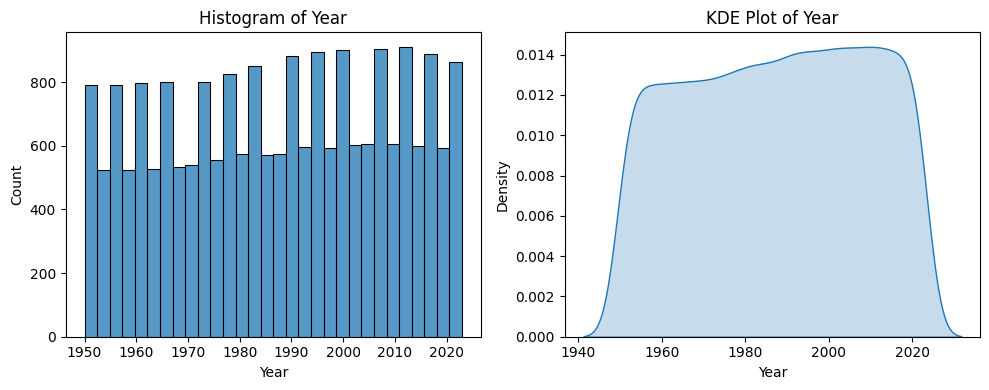

/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


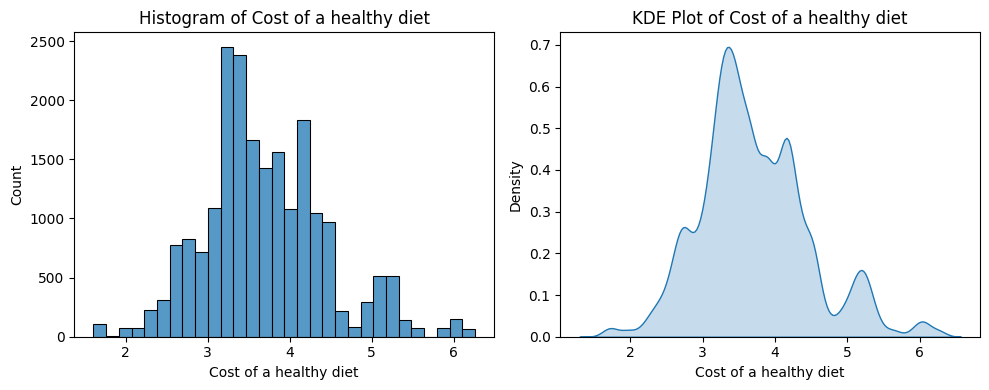

/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


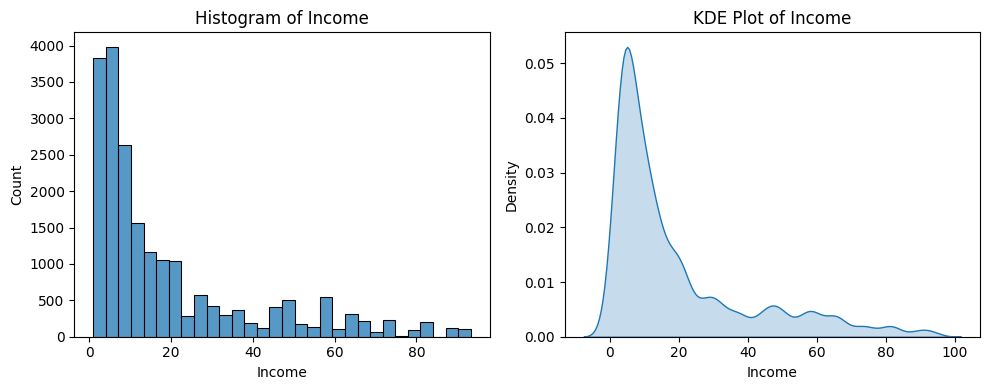

/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


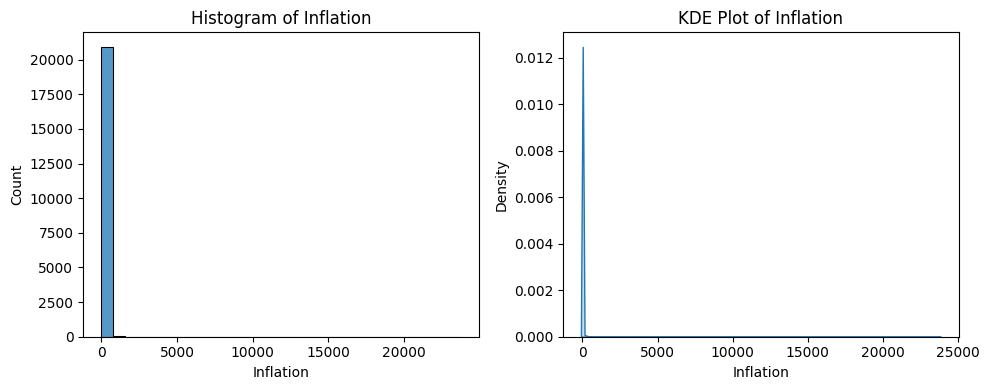

/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


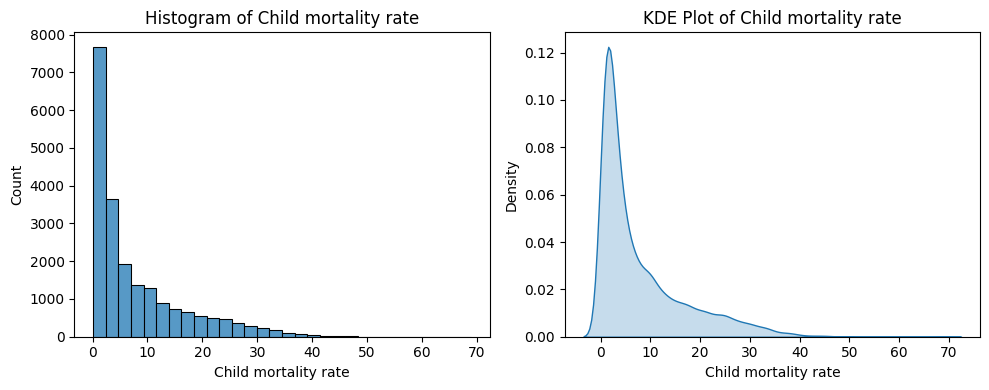

/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


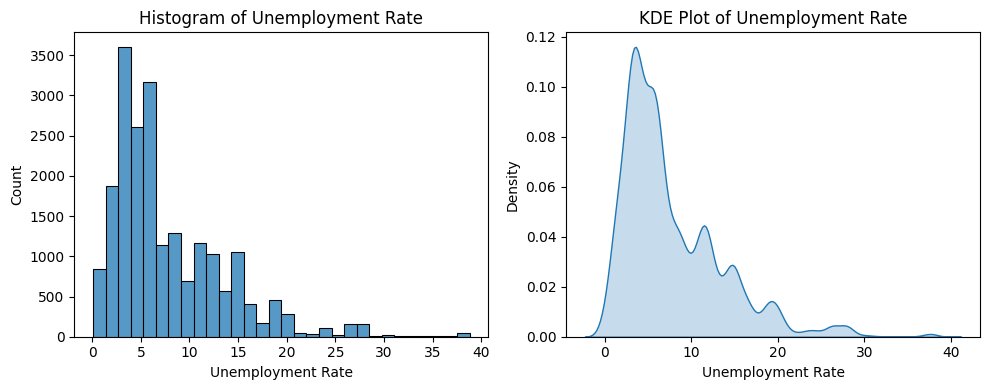

/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


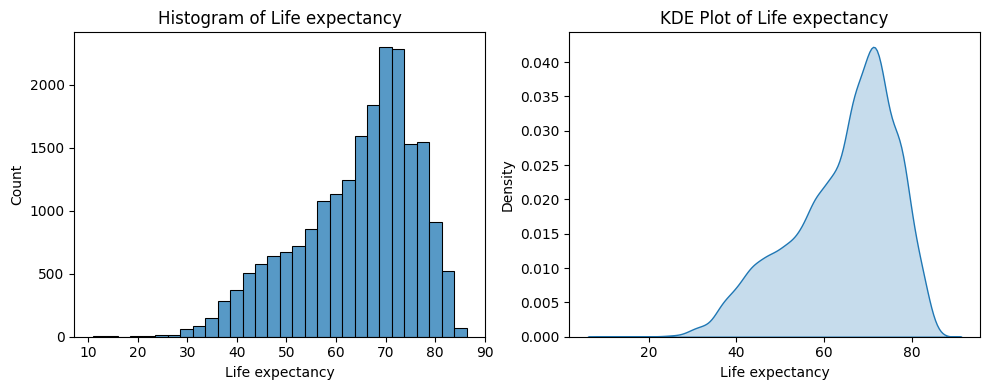

/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


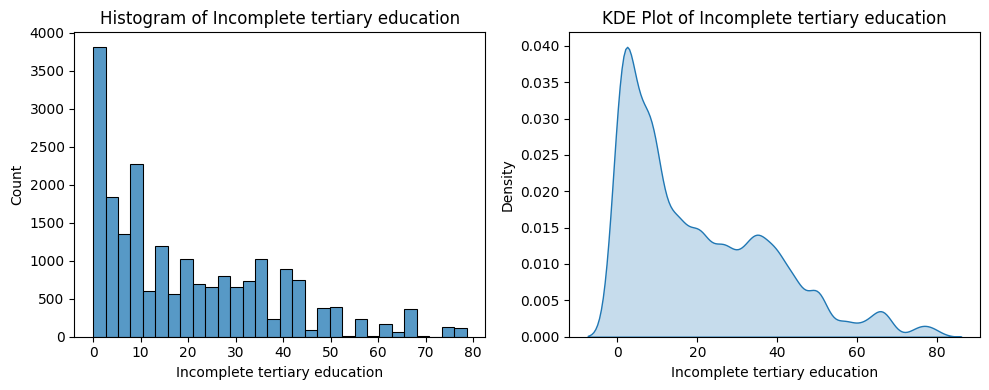

/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


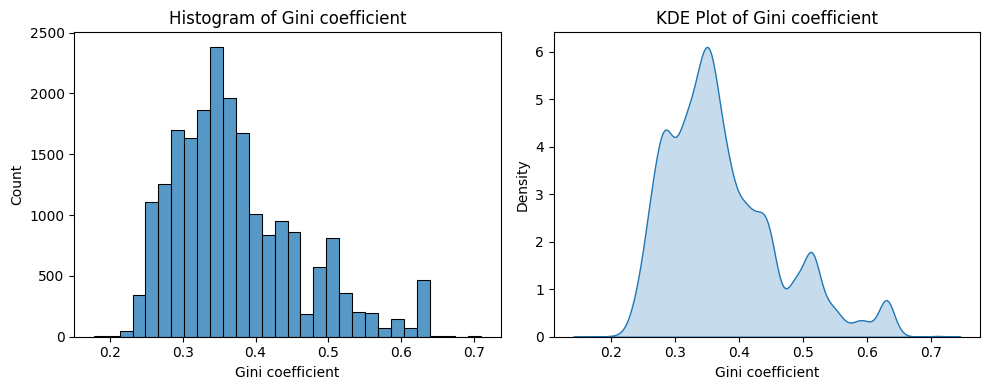

/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


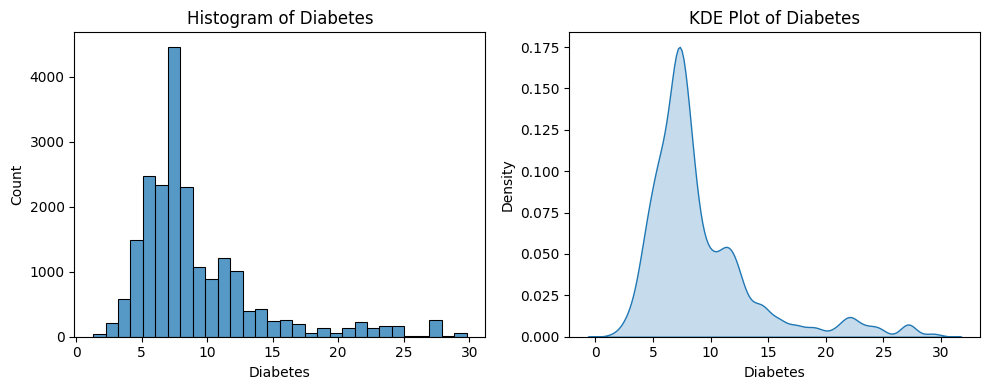

/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


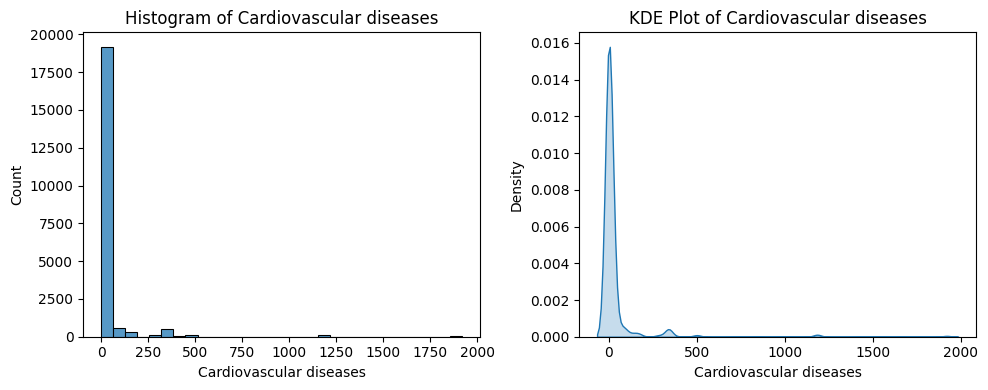

/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


/tmp/ipython-input-11-1776002204.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), shade=True)


In [11]:
# Histogram and Skewness Summary

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace this with your actual DataFrame
# df = pd.read_csv('your_dataset.csv')

# Identify numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Calculate skewness
skewness_summary = df[numeric_cols].skew().sort_values(ascending=False)
print("Skewness Summary:")
print(skewness_summary)

# Plot histogram and KDE for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), bins=30, kde=False)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.kdeplot(df[col].dropna(), shade=True)
    plt.title(f'KDE Plot of {col}')

    plt.tight_layout()
    plt.show()

## Outliers Detection
The Interquartile Range (IQR) method is used for detecting outliers in this dataset. The reasons as follows:

IQR method is specifically apply for continuous numerical data as most variables in this dataset are continuous numerical, such as Inflation, GDP, CPI etc..

Additionally, IQR method is robust to skewness data, and some of the variables are high skewness, including Inflation, GDP, and CPI. This makes it more suitable than methods like z-score which assume normality.

Since the dataset has very low missing values (< 1.5%), the IQR method can be applied effectively without the need for complex imputation prior to outlier detection. Missing data will not significantly bias the quartile estimates.

The IQR method does not make assumptions for the data normal distribution as most of the variables are skewed, therefore, IQR is appropriate to apply for this dataset.

In [12]:
# Check Outliers

# Iterate only through numeric columns
for col in df.select_dtypes(include='number').columns:
    # Ensure the column has numeric data before proceeding
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        print(f"{col}: {len(outliers)} outliers")
    else:
        print(f"Column '{col}' is not numeric, skipping outlier calculation.")

Year: 0 outliers
Cost of a healthy diet: 470 outliers
Income: 1921 outliers
Inflation: 2210 outliers
Child mortality rate: 1274 outliers
Unemployment Rate: 563 outliers
Life expectancy: 167 outliers
Incomplete tertiary education: 174 outliers
Gini coefficient: 683 outliers
Diabetes: 1546 outliers
BMI (female): 835 outliers
Cardiovascular diseases: 3171 outliers
BMI (male): 10 outliers
Sex ratio: 893 outliers
GDP: 3004 outliers
Median age: 42 outliers
CPI: 1960 outliers


## Boxplot

Boxplots is a good tool of offering a visual summary of the distribution, skewness, and variability for each numeric variable in the dataset.

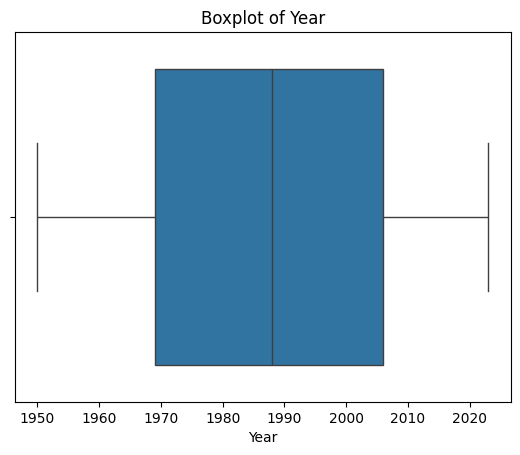

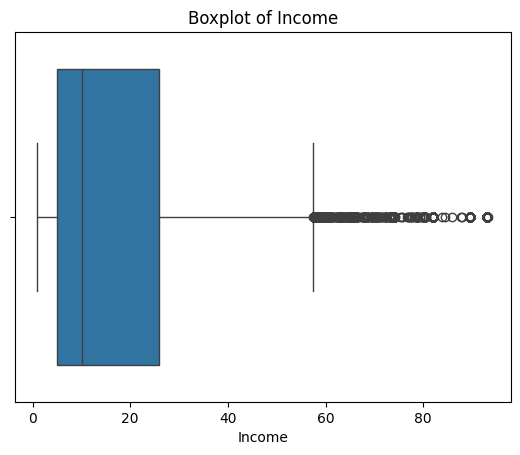

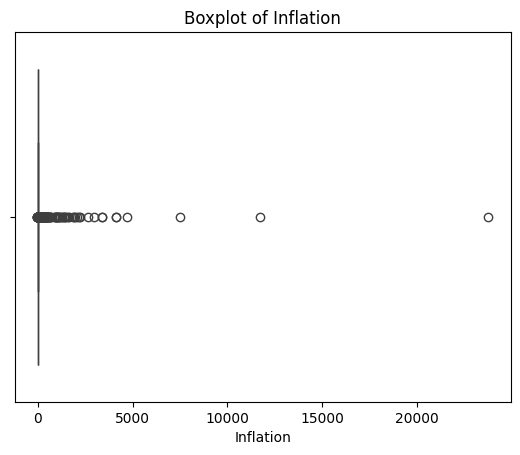

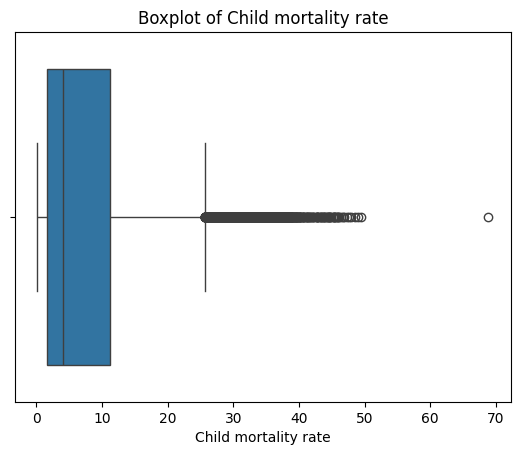

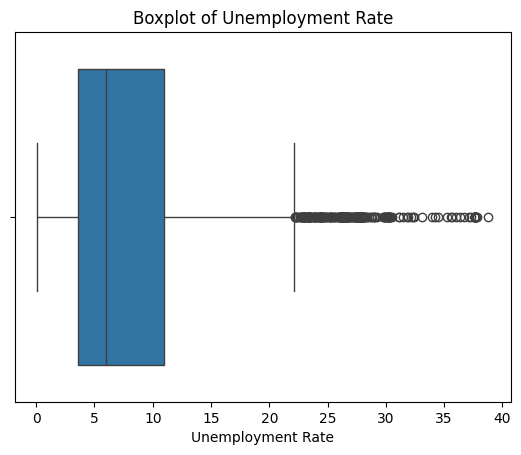

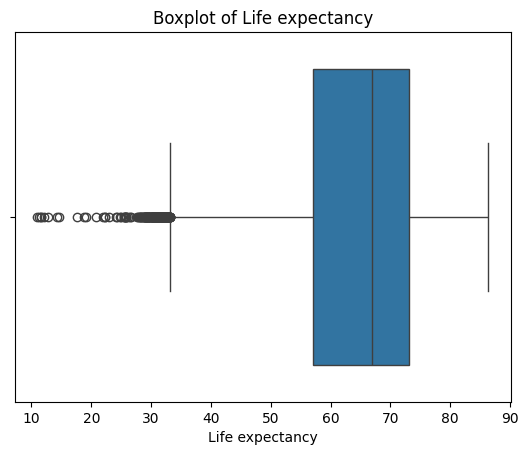

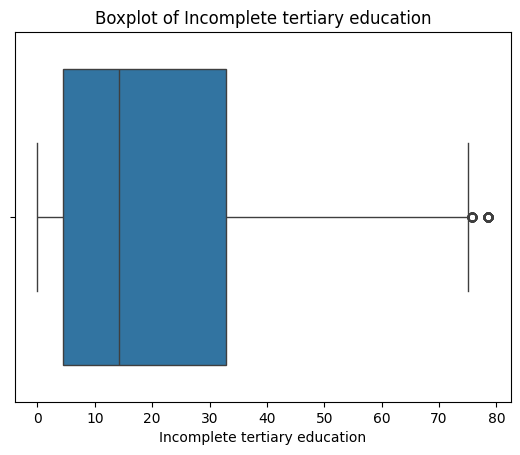

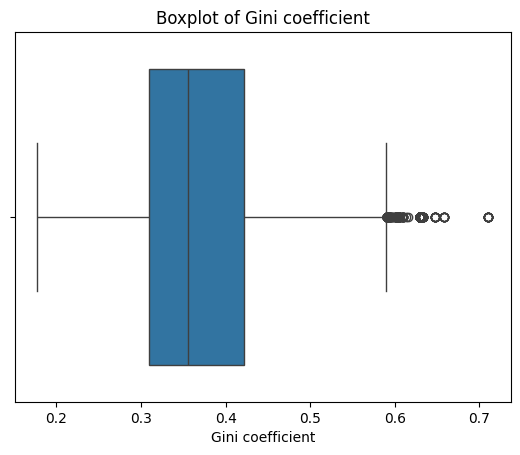

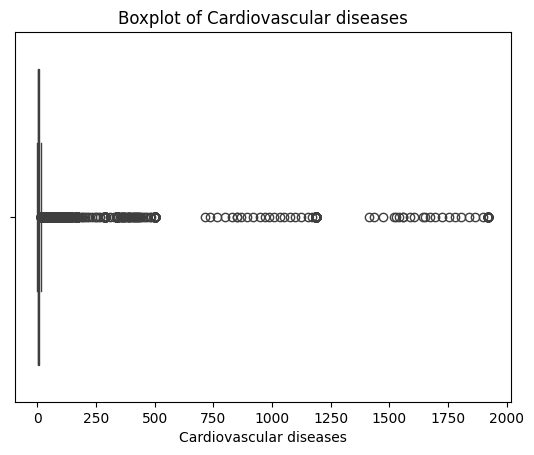

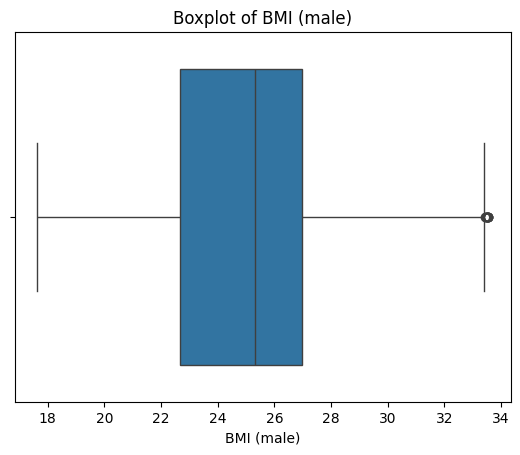

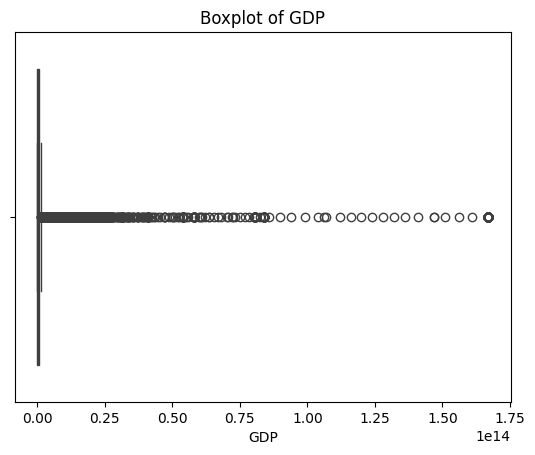

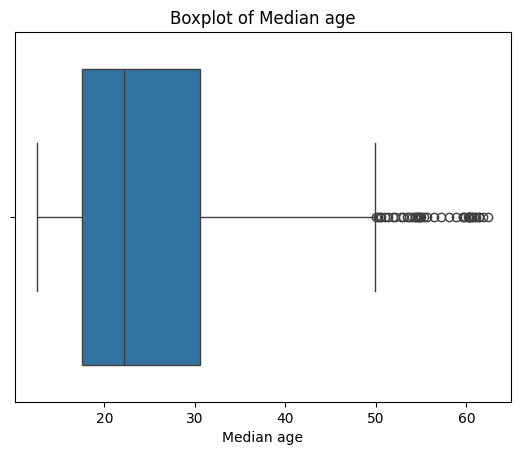

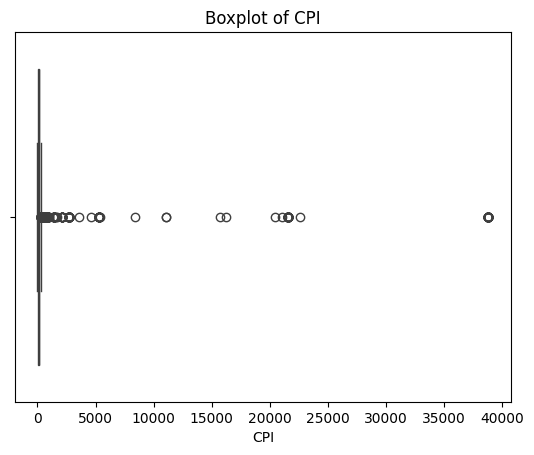

In [13]:
# Boxplot

import seaborn as sns
import matplotlib.pyplot as plt

# Loop through all numeric columns to create boxplots
for col in df.select_dtypes(include='number').columns:
    # Get the data for the current numeric column
    column_data = df[col].dropna() # Drop NaN values to avoid potential issues with plotting

    # Check if there is enough data for plotting (at least one non-null value)
    if len(column_data) > 0:
        sns.boxplot(x=column_data)
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        plt.show()
    else:
        print(f"Not enough data to generate boxplot for column: {col}")

## Impute missing values with Mean / Median / Mode Imputation for Training Set only

According to the Skewness Summary, approx zero used mean imputation; > 0.5 or < -0.5 used median imputation

Imputation apply to training set only, avoid data leakage

In [14]:
# Imputation and Train-Test Split

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Columns to impute
mean_impute_cols = ['BMI (female)', 'BMI (male)']
median_impute_cols = [
    'CPI', 'Gini coefficient', 'Income', 'Inflation', 'Unemployment Rate', 'Diabetes',
    'Cardiovascular diseases', 'GDP', 'Cost of a healthy diet',
    'Incomplete tertiary education', 'Child mortality rate',
    'Life expectancy', 'Sex ratio', 'Median age'
]

# Containers for all-country data
train_dfs = []
test_dfs = []

# --- Per-country processing ---
for country in df['Country'].unique():
    df_country = df[df['Country'] == country].sort_values('Year').reset_index(drop=True)

    # Skip countries with very few rows
    if len(df_country) < 5:
        continue

    # Time-based train/test split (80% train)
    split_index = int(len(df_country) * 0.8)
    train_country = df_country.iloc[:split_index].copy()
    test_country = df_country.iloc[split_index:].copy()

    # --- Mean imputation ---
    for col in mean_impute_cols:
        if col in train_country.columns:
            mean_val = train_country[col].mean()
            if np.isnan(mean_val):
                mean_val = 0  # Fallback if all values are missing
            train_country[col].fillna(mean_val, inplace=True)
            test_country[col].fillna(mean_val, inplace=True)

    # --- Median imputation with fallback to (median - 1) or -1 ---
    for col in median_impute_cols:
        if col in train_country.columns:
            median_val = train_country[col].median()
            if np.isnan(median_val):
                fill_val = -1
            else:
                fill_val = median_val - 1
            train_country[col].fillna(fill_val, inplace=True)
            test_country[col].fillna(fill_val, inplace=True)

    # Add Country column explicitly before appending
    train_country['Country'] = country
    test_country['Country'] = country

    # Store per-country processed data
    train_dfs.append(train_country)
    test_dfs.append(test_country)

# Combine all countries into unified train/test sets
train_all = pd.concat(train_dfs, ignore_index=True)
test_all = pd.concat(test_dfs, ignore_index=True)

train_all = train_all.set_index(['Country', 'Year'])
test_all = test_all.set_index(['Country', 'Year'])

print(train_all.head())  # should now show Country and Year as index
print(train_all.index.names)  # ['Country', 'Year']

# Final check
print(" Missing values after imputation (Train):")
print(train_all.isnull().sum())

print("\n Missing values after imputation (Test):")
print(test_all.isnull().sum())

/tmp/ipython-input-14-3768071567.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_country[col].fillna(mean_val, inplace=True)
/tmp/ipython-input-14-3768071567.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

                  Cost of a healthy diet  Income  Inflation  \
Country     Year                                              
Afghanistan 1950                    -1.0    -1.0    9.68342   
            1951                    -1.0    -1.0    9.68342   
            1952                    -1.0    -1.0    9.68342   
            1953                    -1.0    -1.0    9.68342   
            1954                    -1.0    -1.0    9.68342   

                  Child mortality rate  Unemployment Rate  Life expectancy  \
Country     Year                                                             
Afghanistan 1950             41.370100             6.9405          28.1563   
            1951             40.799400             6.9405          28.5836   
            1952             40.224000             6.9405          29.0138   
            1953             39.642300             6.9405          29.4521   
            1954             39.158897             6.9405          29.6975   

           

The above result verify that all missing value have been imputed.

## Spearman Correlation


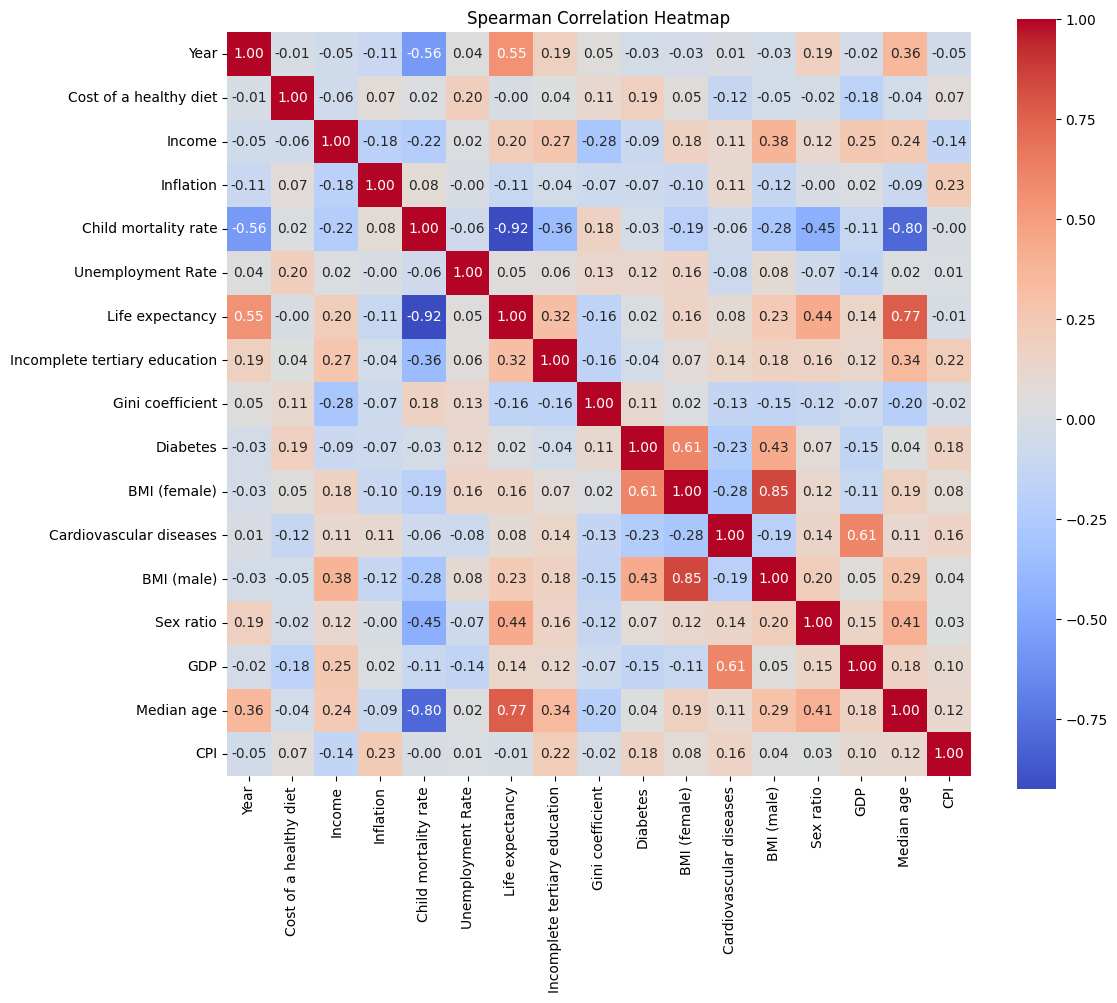

In [15]:
# Spearman Correlation matrix and heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for np.number

# Compute correlation matrix - Select only numeric columns
corr_method = 'spearman'
# Select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)
corr_matrix = df_numeric.corr(method=corr_method)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title(f'{corr_method.capitalize()} Correlation Heatmap')
plt.show()

## Multicollinearity Check using VIF

Variance Inflation Factor (VIF) measures how much the variance of a regression coefficient is inflated due to multicollinearity among predictor variables. Multicollinearity occurs when predictors are highly correlated with each other, which can lead to unstable coefficient estimates, inflated standard errors, and difficulty in interpreting the individual effects of variables.

VIF with values above 5 or 10 typically indicating problematic multicollinearity. Using VIF helps identify redundant features, guides feature selection, and improves model interpretability by ensuring stable and meaningful coefficient estimates.

For this dataset, which includes continuous numeric variables such as GDP and Income, and uses linear regression models to analyze health outcomes like life expectancy and cardiovascular diseases.

This approach is supported by foundational econometrics and statistical learning literature, including works by Gujarati (2003) and James et al. (2013), as well as applied health research where socioeconomic and health indicators often exhibit correlations.

Overall, incorporating VIF checks enhances the reliability of your regression models, especially when interpreting the impact of predictors.

In [18]:
# VIF Test for checking multicollinarity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Select the features for VIF calculation (excluding target variables)
vif_features = [
    'Income', 'GDP', 'CPI', 'Sex ratio', 'BMI (female)', 'Cost of a healthy diet',
    'Inflation', 'Incomplete tertiary education', 'Gini coefficient', 'Median age',
    'BMI (male)', 'Unemployment Rate', 'Child mortality rate'
]

# Drop rows with missing values
vif_data = train_all[vif_features].dropna()

# Add constant term for intercept
vif_data_const = add_constant(vif_data)

# Calculate VIF
vif_df = pd.DataFrame()
vif_df["Feature"] = vif_data_const.columns
vif_df["VIF"] = [variance_inflation_factor(vif_data_const.values, i) for i in range(vif_data_const.shape[1])]

# Display VIF values
print("\nVariance Inflation Factors:")
print(vif_df)


Variance Inflation Factors:
                          Feature       VIF
0                           const  0.000000
1                          Income  1.331612
2                             GDP  1.019552
3                             CPI  1.024520
4                       Sex ratio  1.135989
5                    BMI (female)  7.013274
6          Cost of a healthy diet  1.438665
7                       Inflation  1.002126
8   Incomplete tertiary education  1.123735
9                Gini coefficient  1.429919
10                     Median age  1.627696
11                     BMI (male)  7.474505
12              Unemployment Rate  1.077660
13           Child mortality rate  1.628367


The result of VIF shows that BMI(female) and BMI(male) have high correlation as BMI(female) and BMI(male) have VIF of 7.00 and 7.39 respectively. According to (Kutner, 2005) and (O'Brien, 2007) that VIF greater than 5 could consider to be high correlation. To solve this problem, both BMI(female) and BMI(male) will be combined.

In [19]:
# Combine variable BMI(female) and BMI(male) by using their average for dataset

# Create combined BMI feature
df['BMI_avg'] = (df['BMI (female)'] + df['BMI (male)']) / 2

# Drop the original columns
df.drop(['BMI (female)', 'BMI (male)'], axis=1, inplace=True)



In [20]:
# Combine variable BMI(female) and BMI(male) by using their average for train set and test set

# Create combined BMI feature for train and test set
train_all['BMI_avg'] = (train_all['BMI (female)'] + train_all['BMI (male)']) / 2
test_all['BMI_avg'] = (test_all['BMI (female)'] + test_all['BMI (male)']) / 2

# Drop the original columns
train_all.drop(['BMI (female)', 'BMI (male)'], axis=1, inplace=True)
test_all.drop(['BMI (female)', 'BMI (male)'], axis=1, inplace=True)

# Check first few column
print("Train Set")
print(train_all.head())
print("Test Set")
print(test_all.head())



Train Set
                  Cost of a healthy diet  Income  Inflation  \
Country     Year                                              
Afghanistan 1950                    -1.0    -1.0    9.68342   
            1951                    -1.0    -1.0    9.68342   
            1952                    -1.0    -1.0    9.68342   
            1953                    -1.0    -1.0    9.68342   
            1954                    -1.0    -1.0    9.68342   

                  Child mortality rate  Unemployment Rate  Life expectancy  \
Country     Year                                                             
Afghanistan 1950             41.370100             6.9405          28.1563   
            1951             40.799400             6.9405          28.5836   
            1952             40.224000             6.9405          29.0138   
            1953             39.642300             6.9405          29.4521   
            1954             39.158897             6.9405          29.6975   

 

In [21]:
# VIF Test again after combined a new variable BMI_avg

# VIF Test for checking multicollinarity

# Select the features for VIF calculation (excluding target variables)
vif_features = [
    'Income', 'GDP', 'CPI', 'Sex ratio', 'BMI_avg', 'Cost of a healthy diet',
    'Inflation', 'Incomplete tertiary education', 'Gini coefficient', 'Median age',
    'Unemployment Rate', 'Child mortality rate'
]

# Drop rows with missing values
vif_data = train_all[vif_features].dropna()

# Add constant term for intercept
vif_data_const = add_constant(vif_data)

# Calculate VIF
vif_df = pd.DataFrame()
vif_df["Feature"] = vif_data_const.columns
vif_df["VIF"] = [variance_inflation_factor(vif_data_const.values, i) for i in range(vif_data_const.shape[1])]

# Display VIF values
print("\nVariance Inflation Factors:")
print(vif_df)


Variance Inflation Factors:
                          Feature       VIF
0                           const  0.000000
1                          Income  1.135053
2                             GDP  1.018229
3                             CPI  1.024395
4                       Sex ratio  1.134875
5                         BMI_avg  1.084183
6          Cost of a healthy diet  1.438641
7                       Inflation  1.002094
8   Incomplete tertiary education  1.110715
9                Gini coefficient  1.424647
10                     Median age  1.593766
11              Unemployment Rate  1.054735
12           Child mortality rate  1.620868


According to the result of above VIF Test, all predictor variables exhibited VIF values below 2, with the combined BMI average (BMI_avg) showing a VIF of approximately 1.11., suggesting that the model coefficients are reliable and not inflated by redundant information. Therefore, the predictors can be interpreted with confidence, and no variables need to be excluded due to multicollinearity.

## Handling Outliers - Winsorization and Yeo-Johnson Transformation

1. Winsorization

Winsorization is a statistical technique that Capping extreme values at chosen percentiles to minimize the influence of outliers on data analysis, preserving the overall structure of the dataset, can be retains dataset integrity while reducing distortion.

It involves setting a threshold (e.g., the 5th and 95th percentiles) and replacing any values below the lower threshold with the value at that threshold, and any values above the upper threshold with the value at that threshold.

Several studies support Winsorization. Weichle (2023) investigated how different methods for handling outliers and influential observations impact the calculation of medical costs in a dataset and successfully apply Winsorization  to cap extreme cost values at the 5th and 95th percentiles to reduce the influence of extreme outliers Balia & Jones (2008): In colon cancer cost data, using Winsorization at 5% (5th–95th percentile) replaced 384 outliers, yielding a more consistent average cost without removing data
Carrascosa (2025): Provides a “complete guide” to handling outliers. Hoaglin & Iglewicz (1987) or Rousseeuw & Hubert (1991), both seminal works that recommend Winsorization in robust statistics.

Lu et al. (2024): Winsorization before RNA-seq analysis considerably reduced false positives, improving model performance, and was recommended at 95%

Pachter (2024) investigate the effective percentage of capping applying Winsorization, 93%, 95% and 987% are being tested. Concluded that use 95% for applying Winsorization is the best.

2. Yeo-Johnson Transformation

Yeo-Johnson transformation is used after handled outliers by Winsorization.
This dataset contains multiple continuous numeric variables (such as income, BMI, GDP, and health-related indicators) that show skewed distributions. Skewness causes coeficient bias, poor model fit, inefficient forecast and negatively impact many modeling techniques by violating assumptions such as ARIMA, linear regression and part of Prophet, that assume the features are normal distributed, therefore handle outliers is essential for generating reliable and stable predictions.

Yeo-Johnson transformation is used in this dataset. The Yeo-Johnson transformation is a statistical technique used to normalize data to make it more symmetrical and reduce skewness. The reason of using Yeo-Johnson because this method appropriate to work with continuous numeric varibles as this dataset primarily composed of continuous numerical features such as GDP, BMI, income, and other health indicators, exactly match the type of data Yeo-Johnson is designed to handle. Additionally, Yeo-Johnson transformation can handle positive, negative and zero values, which is suitable to handle this dataset that contains negative and zero values, such as inflation. Furthermore, Yeo-Johnson improve normality and reduce skewness, which appropriate to use as the assumption of  ARIMA, Prophet, linear regression require normal distributed residual, which enhances model validity and stablility.

Compatible with integer or float data
Yeo-Johnson can be applied to both integer and float types (e.g., "Median age"), eliminating the need for manual type conversion.

Not applicable to categorical variables
Your dataset includes one categorical feature (e.g., "Country"), which should be excluded from this transformation. Yeo-Johnson is only suitable for numeric features.

One of the categorical variable (e.g., Country) should be excluded
This transformation is not meant for categorical data — but that's fine. Just apply it only to your numeric columns.

Several studies have demonstrated the effectiveness of the Yeo-Johnson transformation in addressing these issues. For example, Zhang et al. (2018) applied the Yeo-Johnson transformation to normalize skewed biomarker and health outcome data prior to predictive modeling. Min et al. (2020) used the method to correct skewness in economic variables such as income and expenditure before conducting regression analysis. Similarly, Wang et al. (2019) employed Yeo-Johnson to transform environmental pollutant data, including values that were zero or negative, leading to improved model fit and interpretability. These studies provide strong evidence that Yeo-Johnson is a robust and versatile transformation suitable for datasets like yours.

Yeo-Johnson transformation benefits ARIMA and Prophet by improving normality and variance stability, helping assumptions and model fit.

In [22]:
# Winsorization and Yeo_Johnson

import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer

#  Additional Assign index: Country and Year
#df = df.set_index(['Country', 'Year'])

# List columns to transform (excluding only identifiers)
exclude_cols = ['Country', 'Year', 'Life expectancy', 'Diabetes', 'Cardiovascular diseases']
target_cols = ['Life expectancy', 'Diabetes', 'Cardiovascular diseases']
numeric_cols = [
    col for col in train_all.columns
    if col not in exclude_cols
]

# --- Step 1: Winsorization at 5‑95% ---
def winsorize_df(df, cols, lower_q=0.05, upper_q=0.95):
    df_w = train_all.copy()
    limits = {}
    for col in cols:
        lower = train_all[col].quantile(lower_q)
        upper = train_all[col].quantile(upper_q)
        limits[col] = (lower, upper)
        df_w[col] = np.clip(df[col], lower, upper)
    return df_w, limits

# Apply Winsorization to train set
train_df_w, limits = winsorize_df(train_all, numeric_cols, 0.05, 0.95)

# Apply same limits to test set
test_df_w = test_all.copy()
for col, (low, high) in limits.items():
    test_df_w[col] = np.clip(test_all[col], low, high)

# --- Step 2: Yeo‑Johnson Transformation ---
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit on winsorized train data
train_df_transformed = train_df_w.copy()
train_df_transformed[numeric_cols] = pt.fit_transform(train_df_w[numeric_cols])

# Apply to test data
test_df_transformed = test_df_w.copy()
test_df_transformed[numeric_cols] = pt.transform(test_df_w[numeric_cols])

# --- Preview results ---
print("=== Train Transformed Sample ===")
print(train_df_transformed[target_cols + [c for c in numeric_cols if c not in target_cols]].head())
print("\n=== Test Transformed Sample ===")
print(test_df_transformed[target_cols + [c for c in numeric_cols if c not in target_cols]].head())

# combine train and test
# --- Step 3: Combine Transformed Train and Test Data ---
df_transformed = pd.concat([train_df_transformed, test_df_transformed], axis=0)

print("\n✅ Combined Transformed DataFrame:")
print(df_transformed.head())





=== Train Transformed Sample ===
                  Life expectancy  Diabetes  Cardiovascular diseases  \
Country     Year                                                       
Afghanistan 1950          28.1563       6.2                  3.97278   
            1951          28.5836       6.2                  3.97278   
            1952          29.0138       6.2                  3.97278   
            1953          29.4521       6.2                  3.97278   
            1954          29.6975       6.2                  3.97278   

                  Cost of a healthy diet    Income  Inflation  \
Country     Year                                                
Afghanistan 1950                1.093342  1.044547    2.16928   
            1951                1.093342  1.044547    2.16928   
            1952                1.093342  1.044547    2.16928   
            1953                1.093342  1.044547    2.16928   
            1954                1.093342  1.044547    2.16928   

      

In [23]:
# Verify Index
print(train_df_transformed.index.names)


['Country', 'Year']


# Lag Feature

Lag features are values from previous time steps used as predictors to forecast current or future values.

It suitable to apply for RQ3 forecasting life expectancy, diabetes, or heart disease over time. Lag features will help Prophet and regression models capture dependencies across years more effectively. ARIMA and Random Forest will create lag internally.

Lag is important because it helps to identify patterns and relationships between past and present data points. Time series models, such as ARIMA, heavily rely on lag to capture autocorrelations (the correlation between observations at different time lags) in the data.

Key reasons why lag is essential:

Autocorrelation Detection: Lag enables analysts to understand how current data points are related to previous ones. If there is a significant autocorrelation at a particular lag, it suggests that past values can be used to predict future values.
Feature Creation: In machine learning models for time series forecasting, lagged variables are often used as features. These features represent the values of the time series at previous time steps, allowing the model to learn patterns over time.
Trend Identification: By observing how values change across different lags, trends and seasonality can be identified. For instance, a consistent increase in lagged values may indicate an upward trend.

In ARIMA, the model forecasts a time series based on the linear relationship between an observation and a number of lagged observations.

Several prior studies proof that Lag Feature is a crucial technique for time series modeling, such as ARIMA, Prophet and Random Forest.

Debón et al. (2017) used lagged mortality rates to forecast life expectancy in European countries. Wang et al. (2019) – used lagged environmental and health variables to predict life expectancy and disease incidence in China. And Chakraborty et al. (2020) – used lagged economic indicators to predict diabetes trends in India.

In [34]:
# Lag Feature -

# === STEP 1: Combine transformed train and test sets ===
df_transformed = pd.concat([train_df_transformed, test_df_transformed], axis=0)

# If index is already set, reset it to ensure 'Country' and 'Year' are columns
if 'Country' not in df_transformed.columns or 'Year' not in df_transformed.columns:
    df_transformed = df_transformed.reset_index()

# Set MultiIndex for lagging
df_transformed = df_transformed.set_index(['Country', 'Year']).sort_index()

# === STEP 2: Define target and predictor columns ===
target_cols = ['Life expectancy', 'Cardiovascular diseases', 'Diabetes']
predictors = [col for col in df_transformed.columns if col not in target_cols and col != 'lagged']

# === STEP 3: Create lagged features ===
def create_lag_features(df, cols, lags=[1, 2, 3]):
    df_lag = df.copy()
    for col in cols:
        for lag in lags:
            df_lag[f'{col}_lag{lag}'] = df.groupby(level='Country')[col].shift(lag)
    return df_lag

df_lagged = create_lag_features(df_transformed, predictors)

# === STEP 4: Tag lagged vs. unlagged rows ===
df_transformed['lagged'] = False
df_lagged['lagged'] = True

# === STEP 5: Combine both to retain full year coverage ===
df_combined = pd.concat([df_transformed, df_lagged])
df_combined = df_combined.reset_index()
df_combined = df_combined.drop_duplicates(subset=['Country', 'Year'], keep='last')
df_combined = df_combined.set_index(['Country', 'Year']).sort_index()

# === STEP 6: Impute missing values caused by lagging ===
df_combined = (
    df_combined
    .reset_index()
    .groupby('Country', group_keys=False)
    .apply(lambda x: x.sort_values('Year').ffill().bfill())
    .reset_index(drop=True)
    .set_index(['Country', 'Year']).sort_index()
)

# === STEP 7: Final dataset for modeling ===
df_combined_with_country = df_combined.reset_index()

# === STEP 8: Preview sample of lagged features ===
lag_cols = [f'{col}_lag{lag}' for col in predictors for lag in [1, 2, 3]]
print(" Combined Dataset (1950–2023) with Lag Features + Imputed NaNs")
print(df_combined_with_country[['Country', 'Year'] + lag_cols].head(10))




 Combined Dataset (1950–2023) with Lag Features + Imputed NaNs
       Country  Year  Cost of a healthy diet_lag1  \
0  Afghanistan  1950                     1.093342   
1  Afghanistan  1951                     1.093342   
2  Afghanistan  1952                     1.093342   
3  Afghanistan  1953                     1.093342   
4  Afghanistan  1954                     1.093342   
5  Afghanistan  1955                     1.093342   
6  Afghanistan  1956                     1.093342   
7  Afghanistan  1957                     1.093342   
8  Afghanistan  1958                     1.093342   
9  Afghanistan  1959                     1.093342   

   Cost of a healthy diet_lag2  Cost of a healthy diet_lag3  Income_lag1  \
0                     1.093342                     1.093342     1.044547   
1                     1.093342                     1.093342     1.044547   
2                     1.093342                     1.093342     1.044547   
3                     1.093342                   

## Restore Index - Country and Year


In [ ]:
## restore Country and year for df_transformed
# Restore index — only if not already set
if 'Country' not in df_transformed.index.names or 'Year' not in df_transformed.index.names:
    df_transformed = df_transformed.set_index(['Country', 'Year'])

# Optional: sort for time-aware operations
df_transformed = df_transformed.sort_index()

# Preview index structure
print("✅ Index restored — here’s a sample:")
print(df_transformed.head())

✅ Index restored — here’s a sample:
                  Cost of a healthy diet    Income  Inflation  \
Country     Year                                                
Afghanistan 1950                1.093342  1.044547    2.16928   
            1951                1.093342  1.044547    2.16928   
            1952                1.093342  1.044547    2.16928   
            1953                1.093342  1.044547    2.16928   
            1954                1.093342  1.044547    2.16928   

                  Child mortality rate  Unemployment Rate  Life expectancy  \
Country     Year                                                             
Afghanistan 1950              3.074717           2.002608          28.1563   
            1951              3.074717           2.002608          28.5836   
            1952              3.074717           2.002608          29.0138   
            1953              3.074717           2.002608          29.4521   
            1954              3.074717  

# Identify the Best Feature Selection Method and The Best Number of Features for Modeling

Comparison for three types of Feature selection method by using RMSE with the best number of feature used in the modeling:

1. LASSO (Least Absolute Shrinkage and Selection Operator)
2. RFE (Recursive Feature Elimination)
3. Forward Selection
4. Random Forest
Each method selects features based on different principles, and for each method, the code evaluates models using a different number of features—starting from 1 up to a maximum (e.g., 15). For each configuration (method + number of features), the model’s performance is assessed using TimeSeriesSplit cross-validation and Root Mean Squared Error (RMSE) as the evaluation metric. The process is repeated for each of your target variables separately. The method and feature count with the lowest RMSE is considered optimal for that target.

  

# Feature selection comparison



🔍 Feature selection for target: Cardiovascular diseases


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0850734284358623, tolerance: 1.065338423995386
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.305569563730387, tolerance: 1.065338423995386
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.32235788048456, tolerance: 1.065338423995386
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWa


Method: LASSO
Best number of features: 1
Best RMSE: 85.6760
Selected features: ['BMI_avg_lag3']

Method: RFE
Best number of features: 5
Best RMSE: 83.6979
Selected features: ['Median age', 'Median age_lag1', 'Median age_lag2', 'Median age_lag3', 'BMI_avg_lag3']

Method: Forward
Best number of features: 1
Best RMSE: 85.6760
Selected features: ['BMI_avg_lag3']

Method: RandomForest
Best number of features: 30
Best RMSE: 108.7010
Selected features: ['Income_lag3', 'BMI_avg_lag1', 'Gini coefficient', 'Child mortality rate', 'Median age_lag1', 'Inflation_lag3', 'Unemployment Rate_lag1', 'Unemployment Rate_lag3', 'Unemployment Rate', 'Inflation', 'Unemployment Rate_lag2', 'BMI_avg_lag2', 'Median age_lag3', 'Incomplete tertiary education_lag2', 'Incomplete tertiary education_lag1', 'Incomplete tertiary education_lag3', 'CPI', 'Incomplete tertiary education', 'GDP_lag1', 'GDP', 'CPI_lag1', 'BMI_avg_lag3', 'CPI_lag3', 'Cost of a healthy diet_lag1', 'GDP_lag2', 'CPI_lag2', 'Cost of a healthy di

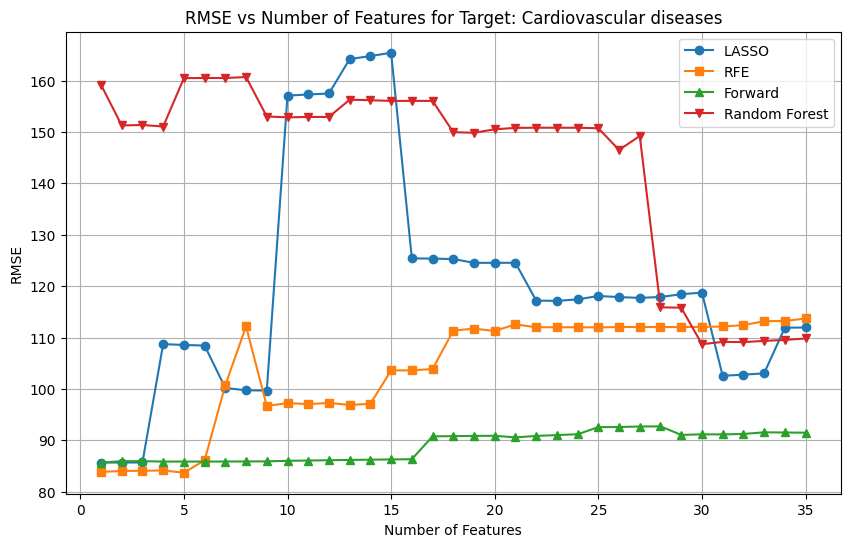


🔍 Feature selection for target: Diabetes

Method: LASSO
Best number of features: 3
Best RMSE: 3.8882
Selected features: ['Median age_lag3', 'Income', 'BMI_avg_lag3']

Method: RFE
Best number of features: 6
Best RMSE: 3.8755
Selected features: ['Income', 'CPI', 'Median age_lag1', 'Median age_lag2', 'Median age_lag3', 'BMI_avg_lag3']

Method: Forward
Best number of features: 20
Best RMSE: 3.8593
Selected features: ['Income', 'Child mortality rate', 'Sex ratio', 'CPI', 'BMI_avg', 'Income_lag1', 'Income_lag2', 'Income_lag3', 'Child mortality rate_lag1', 'Child mortality rate_lag2', 'Child mortality rate_lag3', 'Sex ratio_lag1', 'Sex ratio_lag2', 'Sex ratio_lag3', 'CPI_lag1', 'CPI_lag2', 'CPI_lag3', 'BMI_avg_lag1', 'BMI_avg_lag2', 'BMI_avg_lag3']

Method: RandomForest
Best number of features: 2
Best RMSE: 3.8922
Selected features: ['Income', 'BMI_avg_lag3']


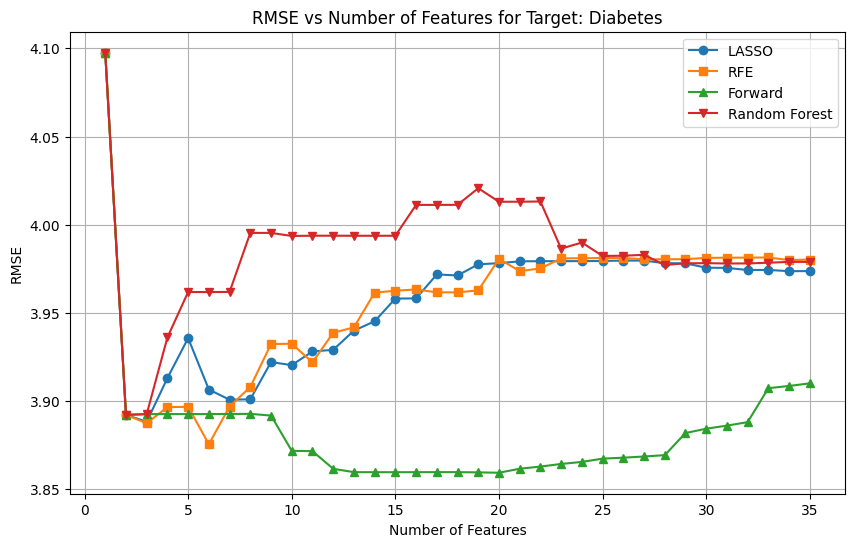


🔍 Feature selection for target: Life expectancy

Method: LASSO
Best number of features: 9
Best RMSE: 4.2596
Selected features: ['Median age_lag1', 'CPI_lag3', 'BMI_avg_lag1', 'BMI_avg_lag2', 'CPI_lag2', 'BMI_avg_lag3', 'Income', 'Median age', 'Child mortality rate']

Method: RFE
Best number of features: 11
Best RMSE: 4.2227
Selected features: ['Income', 'Child mortality rate', 'Incomplete tertiary education', 'Median age', 'Income_lag3', 'Child mortality rate_lag1', 'Child mortality rate_lag3', 'Incomplete tertiary education_lag3', 'Median age_lag1', 'Median age_lag2', 'Median age_lag3']

Method: Forward
Best number of features: 13
Best RMSE: 4.2179
Selected features: ['Income', 'Inflation', 'Child mortality rate', 'Median age', 'Income_lag3', 'Inflation_lag1', 'Inflation_lag2', 'Inflation_lag3', 'Child mortality rate_lag3', 'Incomplete tertiary education_lag3', 'Median age_lag1', 'Median age_lag2', 'Median age_lag3']

Method: RandomForest
Best number of features: 4
Best RMSE: 4.2880


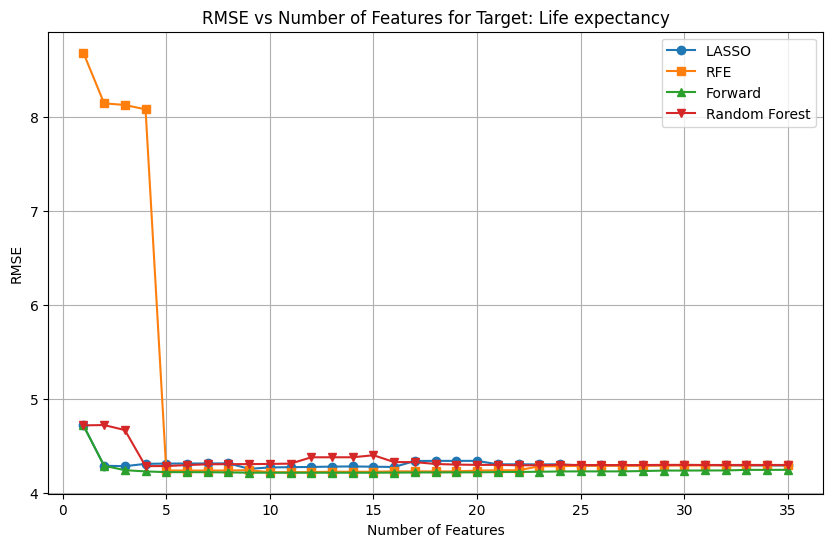

In [ ]:
# feature selection comparison
from sklearn.linear_model import Ridge

def find_best_feature_count(X_df, y, max_features=None):
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LassoCV, LinearRegression
    from sklearn.feature_selection import RFE, SequentialFeatureSelector
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_squared_error
    from sklearn.preprocessing import StandardScaler

    # --- Scale X and y ---
    X_scaler = StandardScaler()
    X_scaled = X_scaler.fit_transform(X_df)
    feature_names = X_df.columns.tolist()

    y = y.values.reshape(-1, 1)
    y_scaler = StandardScaler()
    y_scaled = y_scaler.fit_transform(y).ravel()
    y_original = y.ravel()

    tscv = TimeSeriesSplit(n_splits=3)

    def rmse_on_original_scale(model, X_subset):
        y_preds, y_tests = [], []
        for train_idx, test_idx in tscv.split(X_subset):
            model.fit(X_subset[train_idx], y_scaled[train_idx])
            y_pred_scaled = model.predict(X_subset[test_idx])
            y_pred_original = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
            y_preds.extend(y_pred_original)
            y_tests.extend(y_original[test_idx])
        return np.sqrt(mean_squared_error(y_tests, y_preds))

    # --- Feature Selection ---
    max_features = min(max_features or 20, X_scaled.shape[1] - 1)
    lasso = LassoCV(cv=tscv, random_state=42).fit(X_scaled, y_scaled)
    lasso_coef = lasso.coef_
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_scaled, y_scaled)
    importances = rf_model.feature_importances_

    lasso_rmse_list, rfe_rmse_list, sfs_rmse_list, rf_rmse_list = [], [], [], []

    step = 2
    for n in range(1, max_features + 1, step):
        idx_lasso = np.argsort(np.abs(lasso_coef))[-n:]
        X_lasso = X_scaled[:, idx_lasso]
        lasso_rmse_list.append((n, rmse_on_original_scale(LinearRegression(), X_lasso)))

        try:
            rfe = RFE(LinearRegression(), n_features_to_select=n)
            X_rfe = rfe.fit_transform(X_scaled, y_scaled)
            rfe_rmse_list.append((n, rmse_on_original_scale(LinearRegression(), X_rfe)))
        except:
            rfe_rmse_list.append((n, np.nan))

        try:
            sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=n, direction='forward', cv=tscv, , n_jobs=-1)
            X_sfs = sfs.fit_transform(X_scaled, y_scaled)
            sfs_rmse_list.append((n, rmse_on_original_scale(LinearRegression(), X_sfs)))
        except:
            sfs_rmse_list.append((n, np.nan))

        idx_rf = np.argsort(importances)[-n:]
        X_rf = X_scaled[:, idx_rf]
        rf_rmse_list.append((n, rmse_on_original_scale(LinearRegression(), X_rf)))

    df_combined = (
        pd.DataFrame(lasso_rmse_list, columns=['n_features', 'LASSO_RMSE'])
        .merge(pd.DataFrame(rfe_rmse_list, columns=['n_features', 'RFE_RMSE']), on='n_features')
        .merge(pd.DataFrame(sfs_rmse_list, columns=['n_features', 'Forward_RMSE']), on='n_features')
        .merge(pd.DataFrame(rf_rmse_list, columns=['n_features', 'RF_RMSE']), on='n_features')
    )

    # --- Feature Names ---
    best_lasso_n = df_combined.loc[df_combined['LASSO_RMSE'].idxmin(), 'n_features']
    best_rfe_n = df_combined.loc[df_combined['RFE_RMSE'].idxmin(), 'n_features']
    best_sfs_n = df_combined.loc[df_combined['Forward_RMSE'].idxmin(), 'n_features']
    best_rf_n = df_combined.loc[df_combined['RF_RMSE'].idxmin(), 'n_features']

    lasso_features = [feature_names[i] for i in np.argsort(np.abs(lasso_coef))[-best_lasso_n:]]
    rfe = RFE(LinearRegression(), n_features_to_select=best_rfe_n).fit(X_scaled, y_scaled)
    rfe_features = [feature_names[i] for i, flag in enumerate(rfe.support_) if flag]
    sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=best_sfs_n, direction='forward', cv=tscv).fit(X_scaled, y_scaled)
    sfs_features = [feature_names[i] for i, flag in enumerate(sfs.get_support()) if flag]
    rf_features = [feature_names[i] for i in np.argsort(importances)[-best_rf_n:]]

    best_methods = {
        'LASSO': {'n_features': best_lasso_n, 'rmse': df_combined.loc[df_combined['n_features'] == best_lasso_n, 'LASSO_RMSE'].values[0], 'features': lasso_features},
        'RFE': {'n_features': best_rfe_n, 'rmse': df_combined.loc[df_combined['n_features'] == best_rfe_n, 'RFE_RMSE'].values[0], 'features': rfe_features},
        'Forward': {'n_features': best_sfs_n, 'rmse': df_combined.loc[df_combined['n_features'] == best_sfs_n, 'Forward_RMSE'].values[0], 'features': sfs_features},
        'RandomForest': {'n_features': best_rf_n, 'rmse': df_combined.loc[df_combined['n_features'] == best_rf_n, 'RF_RMSE'].values[0], 'features': rf_features}
    }

    return df_combined, best_methods

import matplotlib.pyplot as plt

target_cols = ['Cardiovascular diseases', 'Diabetes', 'Life expectancy']
results = {}

for target in target_cols:
    lag_cols = [f'{target}_lag1', f'{target}_lag2']
    cols_to_drop = target_cols + [col for col in lag_cols if col in df_lagged.columns]
    X = df_lagged.drop(columns=cols_to_drop)
    y = df_lagged[target]

    print(f"\n🔍 Feature selection for target: {target}")
    df_combined, best_methods = find_best_feature_count(X, y)
    results[target] = {'df_combined': df_combined, 'best_methods': best_methods}

    for method, info in best_methods.items():
        print(f"\nMethod: {method}")
        print(f"Best number of features: {info['n_features']}")
        print(f"Best RMSE: {info['rmse']:.4f}")
        print(f"Selected features: {info['features']}")

    plt.figure(figsize=(10,6))
    plt.plot(df_combined['n_features'], df_combined['LASSO_RMSE'], label='LASSO', marker='o')
    plt.plot(df_combined['n_features'], df_combined['RFE_RMSE'], label='RFE', marker='s')
    plt.plot(df_combined['n_features'], df_combined['Forward_RMSE'], label='Forward', marker='^')
    plt.plot(df_combined['n_features'], df_combined['RF_RMSE'], label='Random Forest', marker='v')
    plt.xlabel('Number of Features')
    plt.ylabel('RMSE')
    plt.title(f'RMSE vs Number of Features for Target: {target}')
    plt.grid(True)
    plt.legend()
    plt.show()

## Feature selection Comparison with R sq, MAPE, MSE


🔍 Evaluating for target: Life expectancy


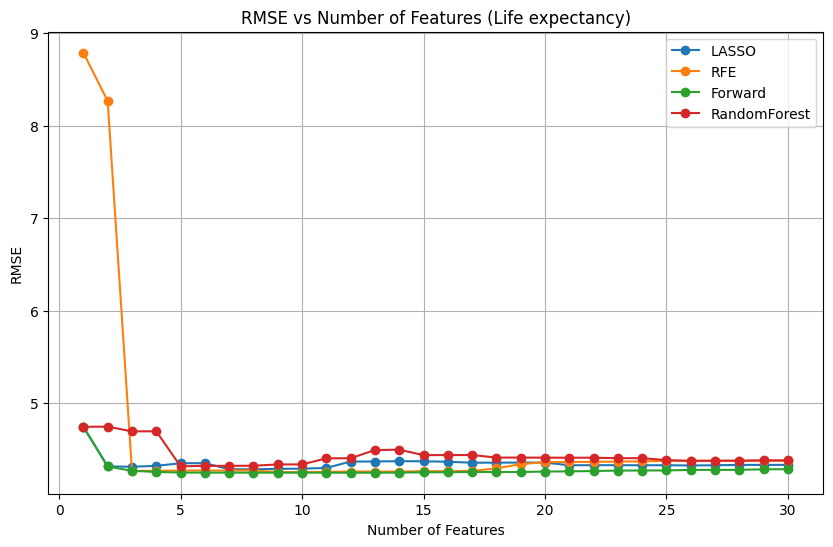

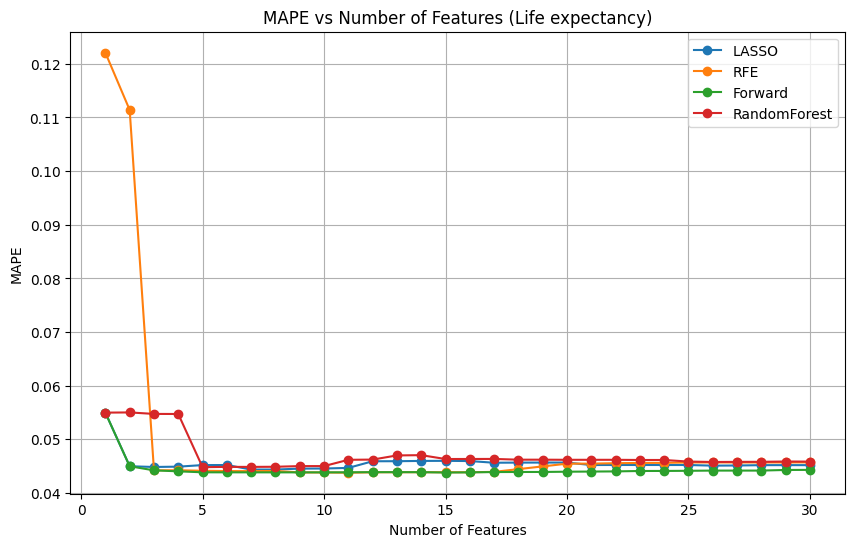


🔍 Evaluating for target: Cardiovascular diseases


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3344987559357833, tolerance: 1.2543280301043949
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3041213861906726, tolerance: 1.2543280301043949
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2939728821220342, tolerance: 1.2543280301043949
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: Converge

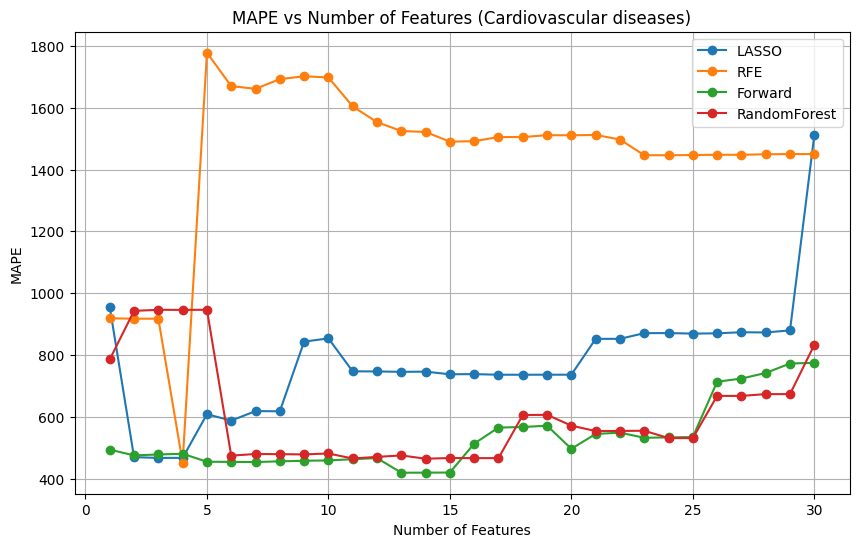

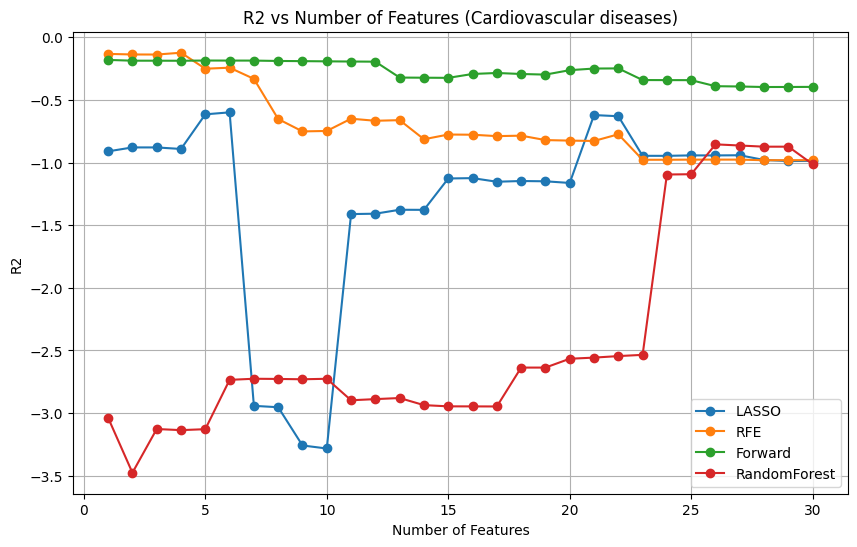


🔍 Evaluating for target: Diabetes


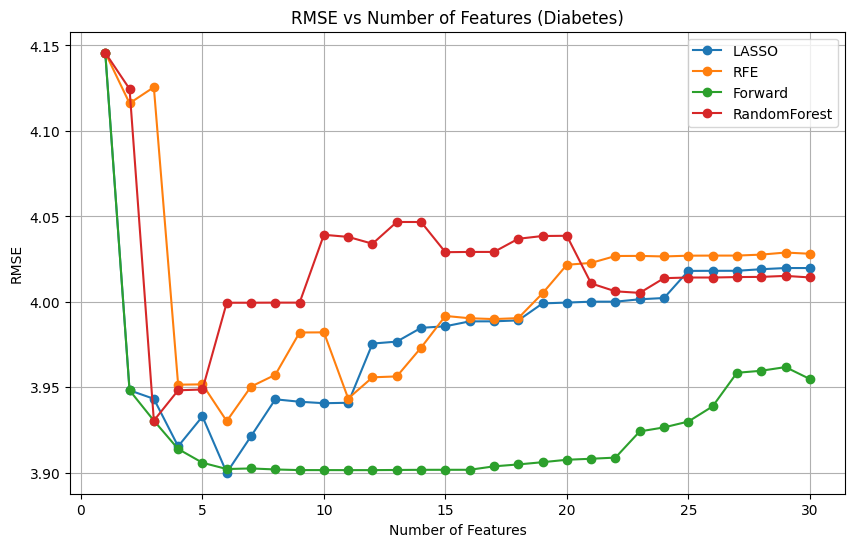

In [ ]:
# Feature selection with R sq, MAPE, MSE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler

# Move plot_metrics function definition to the beginning
def plot_metrics(df_combined, target_name):
     metrics = ['RMSE', 'MAPE', 'R2']
     methods = ['LASSO', 'RFE', 'Forward', 'RandomForest']

     for metric in metrics:
         plt.figure(figsize=(10,6))
         for method in methods:
             # Check if the metric column exists for the method before plotting
             metric_col = f'{method}_{metric}'
             if metric_col in df_combined.columns:
                 plt.plot(df_combined['n_features'], df_combined[metric_col], label=method, marker='o')
             else:
                 print(f"Warning: Metric column '{metric_col}' not found in DataFrame for plotting.")

         plt.title(f'{metric} vs Number of Features ({target_name})')
         plt.xlabel('Number of Features')
         plt.ylabel(metric)
         plt.legend()
         plt.grid(True)
         plt.show()


def evaluate_model(model, X_subset, y_scaled, y_original, y_scaler, tscv):
    y_preds, y_tests = [], []
    # Ensure X_subset and y_scaled have the same index for splitting
    # Convert X_subset to DataFrame if it's numpy array to use index for splitting
    if not isinstance(X_subset, pd.DataFrame):
        # Assuming X_subset corresponds to the same rows as y_scaled
        X_subset_df = pd.DataFrame(X_subset, index=pd.Series(y_scaled).index)
    else:
        X_subset_df = X_subset

    for train_idx, test_idx in tscv.split(X_subset_df): # Use X_subset_df for splitting
        # Select data using indices from the split
        X_train, X_test = X_subset_df.iloc[train_idx], X_subset_df.iloc[test_idx]
        y_train_scaled, y_test_scaled = y_scaled[train_idx], y_scaled[test_idx]
        y_test_original = y_original[test_idx] # Select original y for test set


        # Ensure there's data in train and test sets for the current fold
        if len(X_train) > 0 and len(X_test) > 0:
            try:
                model.fit(X_train, y_train_scaled)
                y_pred_scaled = model.predict(X_test)
                y_pred_original = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
                y_preds.extend(y_pred_original)
                y_tests.extend(y_test_original)
            except Exception as e:
                 print(f"Error during model fitting or prediction in a fold: {e}")
                 # Extend with NaNs or skip if error occurs in a fold
                 y_preds.extend([np.nan] * len(y_test_original))
                 y_tests.extend(y_test_original) # Still add the test actuals to keep lists aligned

    # Calculate metrics only if y_tests and y_preds are not empty and don't contain NaNs/Infs
    y_tests_cleaned = np.array(y_tests)
    y_preds_cleaned = np.array(y_preds)

    # Remove pairs where either actual or prediction is NaN/Inf
    valid_indices = np.isfinite(y_tests_cleaned) & np.isfinite(y_preds_cleaned)
    y_tests_cleaned = y_tests_cleaned[valid_indices]
    y_preds_cleaned = y_preds_cleaned[valid_indices]

    if len(y_tests_cleaned) > 0:
        rmse = np.sqrt(mean_squared_error(y_tests_cleaned, y_preds_cleaned))
        mape = mean_absolute_percentage_error(y_tests_cleaned, y_preds_cleaned)
        r2 = r2_score(y_tests_cleaned, y_preds_cleaned)
    else:
        # Return NaN if no valid data points for metric calculation
        rmse, mape, r2 = np.nan, np.nan, np.nan

    return rmse, mape, r2

def find_best_features_with_metrics(X_df, y, max_features=None):
    # Ensure X_df has a proper index for splitting in evaluate_model
    if not isinstance(X_df.index, pd.MultiIndex):
        # Assuming X_df came from df_lagged which has MultiIndex, try to restore it
        # This might require passing the original index or ensuring X_df retains it
        # For robustness, let's assume X_df needs an index for splitting
        # A simpler approach might be to reset index in evaluate_model if it's numpy array
        pass # Let's handle index in evaluate_model as it receives X_subset

    X_scaler = StandardScaler()
    # Fit scaler on X_df values, but keep X_df as DataFrame to retain index
    X_scaled_values = X_scaler.fit_transform(X_df.values)
    X_scaled_df = pd.DataFrame(X_scaled_values, columns=X_df.columns, index=X_df.index) # Recreate DataFrame with index

    feature_names = X_scaled_df.columns.tolist()

    y = y.values.reshape(-1, 1) # y is already a Series from df_lagged, convert to numpy array
    y_original = y.ravel() # Keep original y values as numpy array

    y_scaler = StandardScaler()
    y_scaled = y_scaler.fit_transform(y).ravel() # Scale y


    tscv = TimeSeriesSplit(n_splits=5)
    max_features = min(max_features or 30, X_scaled_df.shape[1]) # Max features up to total features

    # Handle case where there are no features
    if X_scaled_df.shape[1] == 0:
        print("No features available in X_df. Skipping feature selection.")
        return pd.DataFrame(), {'LASSO': {'n_features': 0, 'rmse': np.nan, 'features': []},
                                'RFE': {'n_features': 0, 'rmse': np.nan, 'features': []},
                                'Forward': {'n_features': 0, 'rmse': np.nan, 'features': []},
                                'RandomForest': {'n_features': 0, 'rmse': np.nan, 'features': []}}


    lasso = LassoCV(cv=tscv, random_state=42).fit(X_scaled_df, y_scaled)
    lasso_coef = lasso.coef_
    # Ensure Random Forest is fitted on X_scaled_df (DataFrame)
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_scaled_df, y_scaled)
    importances = rf_model.feature_importances_

    results = {'LASSO': [], 'RFE': [], 'Forward': [], 'RandomForest': []}

    # Max features for loop should be <= total features
    max_loop_features = min(max_features, X_scaled_df.shape[1])


    for n in range(1, max_loop_features + 1):
        # LASSO
        idx = np.argsort(np.abs(lasso_coef))[-n:]
        # Select columns using index from X_scaled_df
        X_subset_lasso = X_scaled_df.iloc[:, idx]
        # Pass DataFrame to evaluate_model
        results['LASSO'].append((n, *evaluate_model(LinearRegression(), X_subset_lasso, y_scaled, y_original, y_scaler, tscv)))

        # RFE
        try:
            # RFE requires n_features_to_select <= n_features
            if n <= X_scaled_df.shape[1]:
                rfe = RFE(LinearRegression(), n_features_to_select=n)
                # Fit on X_scaled_df (DataFrame) and get transformed numpy array
                X_subset_rfe_np = rfe.fit_transform(X_scaled_df, y_scaled)
                # Pass numpy array to evaluate_model - evaluate_model handles conversion to DataFrame for splitting
                results['RFE'].append((n, *evaluate_model(LinearRegression(), X_subset_rfe_np, y_scaled, y_original, y_scaler, tscv)))
            else:
                 results['RFE'].append((n, np.nan, np.nan, np.nan))

        except Exception as e:
             print(f"RFE failed for n={n}: {e}")
             results['RFE'].append((n, np.nan, np.nan, np.nan))


        # Forward
        try:
            # SFS requires k_features <= n_features
            if n <= X_scaled_df.shape[1]:
                # Use X_scaled_df (DataFrame) for SFS fit
                sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=n, direction='forward', cv=tscv, n_jobs=-1)
                 # Fit on X_scaled_df (DataFrame) and get transformed numpy array
                X_subset_sfs_np = sfs.fit_transform(X_scaled_df, y_scaled)
                # Pass numpy array to evaluate_model
                results['Forward'].append((n, *evaluate_model(LinearRegression(), X_subset_sfs_np, y_scaled, y_original, y_scaler, tscv)))
            else:
                results['Forward'].append((n, np.nan, np.nan, np.nan))
        except Exception as e:
            print(f"Forward Selection failed for n={n}: {e}")
            results['Forward'].append((n, np.nan, np.nan, np.nan))


        # RF Importance
        idx = np.argsort(importances)[-n:]
        # Select columns using index from X_scaled_df
        X_subset_rf = X_scaled_df.iloc[:, idx]
        # Pass DataFrame to evaluate_model
        results['RandomForest'].append((n, *evaluate_model(LinearRegression(), X_subset_rf, y_scaled, y_original, y_scaler, tscv)))

    # Build metrics DataFrame
    dfs = []
    for method, vals in results.items():
        df = pd.DataFrame(vals, columns=['n_features', f'{method}_RMSE', f'{method}_MAPE', f'{method}_R2'])
        dfs.append(df)

    df_combined = dfs[0]
    for df in dfs[1:]:
        df_combined = df_combined.merge(df, on='n_features', how='outer')

    return df_combined

# Assuming df_lagged is available and contains the data with lags
# Assuming target_cols is defined

target_cols = ['Life expectancy', 'Cardiovascular diseases', 'Diabetes']
results = {}

for target in target_cols:
    # Ensure df_lagged is available and contains the target column
    if 'df_lagged' in locals() and target in df_lagged.columns:
        lag_cols = [f'{target}_lag1', f'{target}_lag2']
        # Ensure we only try to drop columns that exist in df_lagged
        cols_to_drop = [target] + [col for col in lag_cols if col in df_lagged.columns]

        # Select features for X - drop target(s) and their lags
        X = df_lagged.drop(columns=cols_to_drop)
        # Select the current target variable and drop NaNs
        y = df_lagged[target].dropna()

        # Align X with the cleaned y by index
        X = X.loc[y.index]


        # Ensure X is not empty after aligning with y
        if X.empty:
            print(f"No valid data points after dropping NaNs for target: {target}. Skipping evaluation.")
            results[target] = pd.DataFrame() # Store an empty DataFrame
            continue


        print(f"\n🔍 Evaluating for target: {target}")
        # Pass X as a DataFrame and y as a Series (without NaNs)
        df_metrics = find_best_features_with_metrics(X, y)
        results[target] = df_metrics

        # Plot metrics for the current target only if df_metrics is not empty
        if not df_metrics.empty:
             plot_metrics(df_metrics, target)
        else:
             print(f"No metrics to plot for target: {target}.")


    else:
        print(f"df_lagged or target column '{target}' not found. Skipping evaluation for this target.")

## Comparative Summary Table - Feature Selection with metrics (RMSE, MAPE, and R²)


In [35]:
## The best Feature Selection with different metrics TABLE - OK - REVISED

# Install tabulate if needed
!pip install tabulate

from sklearn.linear_model import Ridge, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import pandas as pd
import numpy as np

# Main function with MAE instead of MAPE
def quick_metrics_summary(X_df, y, feature_step=3, max_features=15):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_df)
    y = y.values.reshape(-1, 1)
    y_scaler = StandardScaler().fit(y)
    y_scaled = y_scaler.transform(y).ravel()
    y_original = y.ravel()
    tscv = TimeSeriesSplit(n_splits=3)

    def evaluate(X_subset):
        y_preds, y_tests = [], []
        for train_idx, test_idx in tscv.split(X_subset):
            model = Ridge()
            model.fit(X_subset[train_idx], y_scaled[train_idx])
            pred = model.predict(X_subset[test_idx])
            y_pred = y_scaler.inverse_transform(pred.reshape(-1, 1)).ravel()
            y_preds.extend(y_pred)
            y_tests.extend(y_original[test_idx])
        return (
            np.sqrt(mean_squared_error(y_tests, y_preds)),
            mean_absolute_error(y_tests, y_preds),
            r2_score(y_tests, y_preds)
        )

    lasso = LassoCV(cv=tscv, random_state=42).fit(X_scaled, y_scaled)
    rf = RandomForestRegressor(n_estimators=50, random_state=42).fit(X_scaled, y_scaled)

    results = []
    for n in range(1, max_features + 1, feature_step):
        # LASSO
        idx_lasso = np.argsort(np.abs(lasso.coef_))[-n:]
        rmse, mae, r2 = evaluate(X_scaled[:, idx_lasso])
        results.append({'Method': 'LASSO', 'n_features': n, 'RMSE': rmse, 'MAE': mae, 'R²': r2})

        # Random Forest
        idx_rf = np.argsort(rf.feature_importances_)[-n:]
        rmse, mae, r2 = evaluate(X_scaled[:, idx_rf])
        results.append({'Method': 'RandomForest', 'n_features': n, 'RMSE': rmse, 'MAE': mae, 'R²': r2})

        # Forward Selection
        try:
            sfs = SequentialFeatureSelector(Ridge(), n_features_to_select=n, direction='forward', cv=tscv, n_jobs=-1)
            X_sfs = sfs.fit_transform(X_scaled, y_scaled)
            rmse, mae, r2 = evaluate(X_sfs)
            results.append({'Method': 'Forward', 'n_features': n, 'RMSE': rmse, 'MAE': mae, 'R²': r2})
        except:
            results.append({'Method': 'Forward', 'n_features': n, 'RMSE': np.nan, 'MAE': np.nan, 'R²': np.nan})

        # RFE
        try:
            rfe = RFE(estimator=Ridge(), n_features_to_select=n)
            X_rfe = rfe.fit_transform(X_scaled, y_scaled)
            rmse, mae, r2 = evaluate(X_rfe)
            results.append({'Method': 'RFE', 'n_features': n, 'RMSE': rmse, 'MAE': mae, 'R²': r2})
        except:
            results.append({'Method': 'RFE', 'n_features': n, 'RMSE': np.nan, 'MAE': np.nan, 'R²': np.nan})

    return pd.DataFrame(results)

# Loop over targets
results_dict = {}
for target in ['Life expectancy', 'Cardiovascular diseases', 'Diabetes']:
    features = [col for col in df_lagged.columns if col != target]
    X = df_combined[features]
    y = df_combined[target]

    print(f"\nRunning for: {target}")
    df_summary = quick_metrics_summary(X, y, feature_step=3, max_features=15)
    results_dict[target] = df_summary

# Extract Best Results per Method
def extract_best_per_method(results_dict):
    summary = []
    for target, df in results_dict.items():
        for method in ['LASSO', 'RandomForest', 'Forward', 'RFE']:
            method_df = df[df['Method'] == method].dropna()
            if not method_df.empty:
                best_row = method_df.sort_values('RMSE').iloc[0]
                summary.append({
                    'Target': target,
                    'Method': method,
                    'n_features': int(best_row['n_features']),
                    'RMSE': round(best_row['RMSE'], 2),
                    'MAE': round(best_row['MAE'], 2),
                    'R²': round(best_row['R²'], 4)
                })
    return pd.DataFrame(summary)

# Print Final Table
best_performance_df = extract_best_per_method(results_dict)
print("\nBest Performance per Method\n")
print(tabulate(best_performance_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Running for: Life expectancy

Running for: Cardiovascular diseases

Running for: Diabetes

Best Performance per Method

╒═════════════════════════╤══════════════╤══════════════╤════════╤═══════╤═════════╕
│ Target                  │ Method       │   n_features │   RMSE │   MAE │      R² │
╞═════════════════════════╪══════════════╪══════════════╪════════╪═══════╪═════════╡
│ Life expectancy         │ LASSO        │           13 │   4.75 │  3.14 │  0.8331 │
├─────────────────────────┼──────────────┼──────────────┼────────┼───────┼─────────┤
│ Life expectancy         │ RandomForest │            4 │   4.78 │  3.16 │  0.8308 │
├─────────────────────────┼──────────────┼──────────────┼────────┼───────┼─────────┤
│ Life expectancy         │ Forward      │           13 │   4.74 │  3.15 │  0.8336 │
├─────────────────────────┼──────────────┼──────────────┼────────┼───────┼─────────┤
│ Life expectancy         │ RFE          │           13 │   4.76 │  3.15 │  0.8323 │
├─────────────────────────┼──

Base on the result of the table, the following Feature Selection method and number of features will be used in this study as follows:

* Life Expectancy	 -  Forward	Selection  - # of features = 13	     

* Cardiovascular Diseases -	Forward	Selection  - # of features = 1	   

* Diabetes	- Forward Selection	 - # of features = 13	   

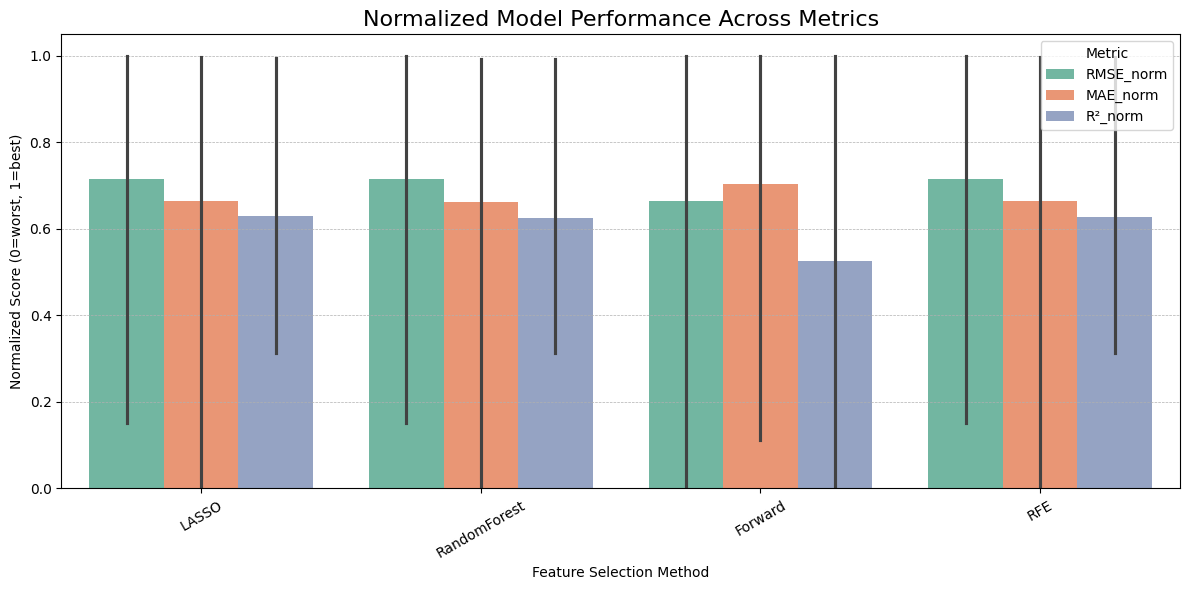

In [ ]:
# # Plot The best Feature Selection with different metrics
import seaborn as sns
import matplotlib.pyplot as plt

#  Step 1: Normalize each metric for fair comparison
normalized_df = best_performance_df.copy()
for metric in ['RMSE', 'MAE', 'R²']:
    if metric == 'R²':
        # Higher is better → normalize normally
        mmin, mmax = normalized_df[metric].min(), normalized_df[metric].max()
        normalized_df[metric + '_norm'] = (normalized_df[metric] - mmin) / (mmax - mmin)
    else:
        # Lower is better → invert and normalize
        mmin, mmax = normalized_df[metric].min(), normalized_df[metric].max()
        normalized_df[metric + '_norm'] = 1 - (normalized_df[metric] - mmin) / (mmax - mmin)

#  Step 2: Melt for plotting
plot_df = normalized_df.melt(
    id_vars=['Target', 'Method', 'n_features'],
    value_vars=['RMSE_norm', 'MAE_norm', 'R²_norm'],
    var_name='Metric',
    value_name='Normalized Score'
)

#  Step 3: Plot all metrics in a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_df,
    x='Method',
    y='Normalized Score',
    hue='Metric',
    palette='Set2',
    dodge=True,
    edgecolor=None,      # removes black edge lines
    linewidth=0          # makes sure border width is zero
)

# Add after sns.barplot(...)
for patch in plt.gca().patches:
    patch.set_edgecolor('none')
    patch.set_linewidth(0)
    patch.set_capstyle('round')  # Smooth edges

plt.title('Normalized Model Performance Across Metrics', fontsize=16)
plt.xlabel('Feature Selection Method')
plt.ylabel('Normalized Score (0=worst, 1=best)')
plt.xticks(rotation=30)
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Feature Selection




# Feature Selection




Target Variables: *Life Expectancy, Diabetes and Cardiovascular disease*

In [45]:
# Forward Selection - Life Expectancy, Diabetes and Cardiovascular disease

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# === Target Feature Limits
targets = {
    'Life expectancy': 13,
    'Diabetes': 13,
    'Cardiovascular diseases': 1
}
# remove unwanted column
if 'lagged' in df_lagged.columns:
    df_lagged = df_lagged.drop(columns='lagged')

# === Prepare excluded columns
all_target_keywords = list(targets.keys()) + ['Cardiovascular diseases']
excluded_cols = [
    col for col in df_lagged.columns
    if col in all_target_keywords
    or any(col.startswith(f"{t}_lag") for t in all_target_keywords)
]

# === Forward Feature Selection Loop
for target, max_features in targets.items():
    print(f"\n🎯 Target: {target}")

    # Drop rows with any NaNs in features or target
    X_raw = df_lagged.drop(columns=[col for col in excluded_cols if col in df_lagged.columns])
    X_raw = X_raw.copy()
    if target not in df_lagged.columns:
      print(f"⚠️ Target '{target}' not found in dataset columns.")
      continue

    # Combine features and target temporarily to drop rows with any NaNs
    df_temp = X_raw.copy()
    df_temp[target] = df_lagged[target]
    df_temp = df_temp.dropna()

    # Separate features and target
    X_raw = df_temp.drop(columns=[target])
    y = df_temp[target]

    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_raw), columns=X_raw.columns)

    remaining_features = list(X_scaled.columns)
    selected_features = []
    best_rmse = np.inf

    for i in range(max_features):
        rmse_per_feature = {}

        for feature in remaining_features:
            trial_features = selected_features + [feature]
            model = LinearRegression()
            neg_mse = cross_val_score(model, X_scaled[trial_features], y,
                                      scoring='neg_mean_squared_error', cv=5)
            rmse = np.mean(np.sqrt(-neg_mse))
            rmse_per_feature[feature] = rmse

        # Select the feature with the lowest RMSE
        best_feature = min(rmse_per_feature, key=rmse_per_feature.get)
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_rmse = rmse_per_feature[best_feature]

        #print(f"✔️ Step {i+1}: Added '{best_feature}' (CV RMSE: {best_rmse:.4f})")

    # Final evaluation
    final_model = LinearRegression()
    final_rmse = np.mean(np.sqrt(-cross_val_score(final_model, X_scaled[selected_features], y,
                                                  scoring='neg_mean_squared_error', cv=5)))
    print(f"\n Top {max_features} features for {target}:")
    print(selected_features)
    print(f"Final Cross-Validated RMSE: {final_rmse:.4f}")


🎯 Target: Life expectancy

 Top 13 features for Life expectancy:
['Child mortality rate', 'Child mortality rate_lag3', 'Sex ratio_lag1', 'BMI_avg_lag3', 'GDP', 'Incomplete tertiary education_lag3', 'Child mortality rate_lag2', 'Sex ratio_lag3', 'Sex ratio', 'Incomplete tertiary education', 'Median age_lag3', 'Sex ratio_lag2', 'Incomplete tertiary education_lag2']
Final Cross-Validated RMSE: 4.2686

🎯 Target: Diabetes

 Top 13 features for Diabetes:
['BMI_avg_lag3', 'Income', 'GDP', 'Sex ratio_lag3', 'CPI_lag3', 'BMI_avg', 'Sex ratio', 'Income_lag1', 'Sex ratio_lag1', 'BMI_avg_lag1', 'BMI_avg_lag2', 'Sex ratio_lag2', 'GDP_lag1']
Final Cross-Validated RMSE: 3.5154

🎯 Target: Cardiovascular diseases

 Top 1 features for Cardiovascular diseases:
['BMI_avg']
Final Cross-Validated RMSE: 132.1827


The features have been selected for target variables as follows:
* Life expectancy: ['Child mortality rate', 'Child mortality rate_lag3', 'Sex ratio_lag1', 'BMI_avg_lag3', 'GDP', 'Incomplete tertiary education_lag3', 'Child mortality rate_lag2', 'Sex ratio_lag3', 'Sex ratio', 'Incomplete tertiary education', 'Median age_lag3', 'Sex ratio_lag2', 'Incomplete tertiary education_lag2']
* Diabete: ['BMI_avg_lag3', 'Income', 'GDP', 'Sex ratio_lag3', 'CPI_lag3', 'BMI_avg', 'Sex ratio', 'Income_lag1', 'Sex ratio_lag1', 'BMI_avg_lag1', 'BMI_avg_lag2', 'Sex ratio_lag2', 'GDP_lag1']
* Cardiovascular disesase: ['BMI_avg']

## Feature Importance

Feature importance quantifies how useful or valuable each feature (independent variable) is in predicting the target variable in a model.

Feature importance refers to a technique used to quantify how much each independent variable contributes to predicting the target variable in a machine learning model.

Depending on the type of model, feature importance can be measured in different ways. For example, in linear regression, it is typically based on the absolute value of the model coefficients, while in models like Random Forests, it reflects how much each feature reduces impurity across all decision trees.

In this project analyzing global health and economic indicators to forecast outcomes like life expectancy, cardiovascular disease rates, and diabetes—using feature importance provides several advantages. First, it enhances interpretability by identifying which variables are most influential in driving your predictions, which can be valuable for policy recommendations or academic insights. Second, it supports feature selection by helping you decide which features to keep, remove, or further engineer, thereby simplifying your models and reducing the risk of overfitting. Third, it offers practical domain insights by revealing which socio-economic or health-related factors are most critical over time. Lastly, focusing on the most important features can improve your forecasting accuracy and model generalization. Overall, incorporating feature importance strengthens your pipeline by making your models not only predictive but also explainable and actionable.

In [51]:
# Feature importance table
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# === Targets and Features
targets = ['Cardiovascular diseases', 'Diabetes', 'Life expectancy']
all_features = [
    'Child mortality rate', 'BMI_avg_lag3', 'GDP', 'Gini coefficient_lag3',
    'Median age', 'Gini coefficient', 'Incomplete tertiary education', 'Income',
    'Median age_lag3', 'Sex ratio', 'Income_lag1', 'Income_lag2', 'Income_lag3',
    'Inflation', 'Sex ratio_lag3', 'Gini coefficient_lag2',
    'Incomplete tertiary education_lag3', 'Sex ratio_lag1', 'Sex ratio_lag2'
]

# === Initialize importance table
importance_table = pd.DataFrame(index=all_features, columns=targets).fillna(0.0)

# === Run LassoCV for each target
for target in targets:
    #print(f"🎯 Processing: {target}")
    if target not in df_lagged.columns:
        print(f"⚠️ Skipping - Target '{target}' not found in df_lagged.")
        continue

    # Drop NA rows for selected features + target
    valid_features = [f for f in all_features if f in df_lagged.columns]
    df_temp = df_lagged[valid_features + [target]].dropna()

    X = df_temp[valid_features]
    y = df_temp[target]

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Fit LassoCV
    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X_scaled, y)

    # Store absolute coefficients
    for i, feature in enumerate(valid_features):
        importance_table.loc[feature, target] = round(abs(lasso.coef_[i]), 4)

# === Sort table by Life Expectancy (optional)
importance_table = importance_table.sort_values(by='Life expectancy', ascending=False)

# === Style the table with only borders
styled_table = importance_table.style \
    .set_table_styles([
        {'selector': 'table',
         'props': [('border-collapse', 'collapse'),
                   ('border', '1px solid black')]},
        {'selector': 'th, td',
         'props': [('border', '1px solid black'),
                   ('padding', '5px')]}
    ]) \
    .set_caption("📋 Feature Importance Summary Table (Lasso)") \
    .format(precision=4)

# === Display
display(styled_table)

# export
importance_table.to_csv("feature_importance_summary.csv")


## Feature Importance Plot

In [52]:
#import matplotlib.pyplot as plt
import pandas as pd

# === Feature importance summary data
data = {
    'Feature': [
        'Child mortality rate', 'BMI_avg_lag3', 'GDP', 'Gini coefficient_lag3',
        'Median age', 'Gini coefficient', 'Incomplete tertiary education', 'Income',
        'Median age_lag3', 'Sex ratio', 'Income_lag1', 'Income_lag2', 'Income_lag3',
        'Inflation', 'Sex ratio_lag3', 'Gini coefficient_lag2',
        'Incomplete tertiary education_lag3', 'Sex ratio_lag1', 'Sex ratio_lag2'
    ],
    'Cardiovascular diseases': [
        0.0000, 0.0778, 0.6041, 0.2821,
        0.0000, 0.0000, 0.0000, 0.0000,
        0.0360, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000
    ],
    'Diabetes': [
        0.0236, 0.6894, 0.0000, 0.0000,
        0.0503, 0.0524, 0.0466, 0.0490,
        0.0000, 0.0229, 0.0270, 0.0214, 0.0175,
        0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000
    ],
    'Life expectancy': [
        0.9287, 0.0000, 0.0081, 0.0040,
        0.0129, 0.0051, 0.0049, 0.0000,
        0.0000, 0.0058, 0.0000, 0.0000, 0.0000,
        0.0080, 0.0057, 0.0044,
        0.0043, 0.0042, 0.0038
    ]
}

# === Create DataFrame
df_importance = pd.DataFrame(data)
df_importance.set_index('Feature', inplace=True)

# === Optional: Remove features with zero importance across all targets
df_importance = df_importance[(df_importance != 0).any(axis=1)]

# === Plotting
fig, axes = plt.subplots(nrows=3, figsize=(10, 12), sharex=True)
targets = ['Life expectancy', 'Cardiovascular diseases', 'Diabetes']
colors = ['#2ca02c', '#1f77b4', '#ff7f0e']

for i, target in enumerate(targets):
    ax = axes[i]
    df_importance[target].sort_values(ascending=True).plot(
        kind='barh', ax=ax, color=colors[i]
    )
    ax.set_title(f'Feature Importance for {target}', fontsize=12)
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature')
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_xlim(left=0)

plt.tight_layout()
plt.show()

Result of feature importance:

🔹 Life Expectancy
The most influential feature remains Child mortality rate with a commanding importance score of 0.9287, reinforcing its role as the primary determinant of overall lifespan across populations. Secondary contributors include Median age (0.0129), Inflation (0.0080), and a collection of demographic and inequality-related indicators — such as Gini coefficient (0.0051), Incomplete tertiary education (0.0049), and Sex ratio_lag3 (0.0057). While individually modest, these features collectively suggest nuanced social and economic influences on life expectancy. Several other lagged features — including education and sex ratio metrics — offer additional but subtle predictive value (ranging from 0.0043 to 0.0038).

🔹 Diabetes
Here, BMI_avg_lag3 dominates the landscape with an importance score of 0.6894, indicating that historical body mass trends are the strongest driver of diabetes outcomes. A suite of socioeconomic and demographic variables follows: Gini coefficient (0.0524), Median age (0.0503), Income (0.0490), and Incomplete tertiary education (0.0466), each providing meaningful predictive contribution. Additional lagged indicators like Income_lag1 (0.0270), Income_lag2 (0.0214), and Income_lag3 (0.0175) reinforce the relevance of financial conditions over time, while smaller signals such as Child mortality rate (0.0236) and Sex ratio (0.0229) reveal latent health and gender dynamics.

🔹 Cardiovascular Diseases
The most prominent predictor is again GDP (0.6041), signaling a strong economic dimension in cardiovascular disease outcomes, likely tied to healthcare access and lifestyle resources. Gini coefficient_lag3 (0.2821) highlights the added impact of income inequality across time, while BMI_avg_lag3 (0.0778) brings in the physiological lens. Median age_lag3 (0.0360) also contributes modestly, suggesting that demographic aging trends can influence disease prevalence. Other features — including Child mortality rate, sex ratios, income levels, and educational indicators — showed negligible impact in this model, reinforcing a more concentrated predictor structure.

## Residual diagnostics (heteroscedasticity, autocorrelation)

Residual diagnostics and the ADF (Augmented Dickey-Fuller) test are important tools in time series modeling that help ensure the models are valid, interpretable, and produce reliable forecasts.

Residual diagnostics involve analyzing the residuals means the differences between the actual values and the predicted values from your model. These diagnostics test whether your model assumptions hold, particularly in regression or forecasting models. For example, the Breusch-Pagan test checks for heteroscedasticity, which is when the variance of residuals is not constant over time. Constant variance is a key assumption in linear regression; if violated, it can lead to inefficient or biased estimates. Similarly, the Ljung-Box test assesses whether residuals are autocorrelated, which means they are correlated across time. If residuals show autocorrelation, your model has likely failed to capture some time-based structure in the data, indicating the model is underfitting or misspecified. Performing these diagnostics ensures that your model is statistically sound and that the insights or forecasts it provides are trustworthy.

In [ ]:
# Residual Diagnostics

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox

# Function to run diagnostics
def residual_diagnostics(X, y):
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    residuals = model.resid

    # Breusch-Pagan Test for Heteroscedasticity
    bp_test = het_breuschpagan(residuals, X_const)
    bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    bp_results = dict(zip(bp_labels, bp_test))

    # Ljung-Box Test for Autocorrelation (lag = 10)
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    lb_pvalue = lb_test['lb_pvalue'].iloc[0]

    return {
        "Breusch-Pagan (Heteroscedasticity)": bp_results,
        "Ljung-Box p-value (Autocorrelation, lag=10)": lb_pvalue
    }

# Define target columns
target_cols = ['Life expectancy', 'Cardiovascular diseases', 'Diabetes']

# Loop through each target and run diagnostics
for target_col in target_cols:
    print(f"\n=== Residual Diagnostics for: {target_col} ===")

    # Define X and y
    y = df_lagged[target_col]
    X = df_lagged.drop(columns=target_cols)  # Exclude all target vars

    # Run diagnostics
    results = residual_diagnostics(X, y)

    # Print results
    for test_name, test_result in results.items():
        print(f"{test_name}: {test_result}")

    # Residual summary for current target
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    residuals = model.resid
    print(f"Mean of residuals: {residuals.mean():.4f}")
    print(f"Variance of residuals: {residuals.var():.4f}")




=== Residual Diagnostics for: Life expectancy ===
Breusch-Pagan (Heteroscedasticity): {'Lagrange multiplier statistic': np.float64(764.4477255858551), 'p-value': np.float64(1.0232367203146819e-129), 'f-value': np.float64(22.26162116493993), 'f p-value': np.float64(4.0766328819801317e-141)}
Ljung-Box p-value (Autocorrelation, lag=10): 0.0
Mean of residuals: 0.0450
Variance of residuals: 17.6104

=== Residual Diagnostics for: Cardiovascular diseases ===
Breusch-Pagan (Heteroscedasticity): {'Lagrange multiplier statistic': np.float64(4099.901314129021), 'p-value': np.float64(0.0), 'f-value': np.float64(153.41325149630802), 'f p-value': np.float64(0.0)}
Ljung-Box p-value (Autocorrelation, lag=10): 0.0
Mean of residuals: -0.1215
Variance of residuals: 19725.8045

=== Residual Diagnostics for: Diabetes ===
Breusch-Pagan (Heteroscedasticity): {'Lagrange multiplier statistic': np.float64(1618.971210445285), 'p-value': np.float64(8.583932328752581e-308), 'f-value': np.float64(49.98610858671592


The residual diagnostics for the regression models on Life Expectancy, Cardiovascular Diseases, and Diabetes reveal key statistical concerns in error behavior. For all three models, the Breusch–Pagan test results indicate strong evidence of heteroscedasticity, with extremely low p-values (e.g., 1.02e−129 for Life Expectancy and effectively zero for the others), confirming that the variance of residuals is not constant and likely depends on the fitted values or predictors. Additionally, the Ljung–Box p-value of 0.0 across all targets points to significant autocorrelation in the residuals at lag 10, meaning the errors are temporally correlated rather than randomly distributed — a violation of classical regression assumptions. The mean residuals for Life Expectancy (0.0450) and Diabetes (−0.0182) are relatively close to zero, suggesting no major bias, while the mean for Cardiovascular Diseases (−0.1215) is slightly more skewed. However, the variance of residuals varies widely: Life Expectancy shows relatively low dispersion (17.6104), Diabetes appears moderately stable (11.5035), but Cardiovascular Diseases displays extremely high residual variance (19725.8045), indicating serious inconsistency in model predictions. Together, these diagnostics highlight potential shortcomings in model specification or data treatment — suggesting the need for techniques that address autocorrelation and non-constant variance, such as robust standard errors, residual modeling, or time-series-specific approaches.

According the result of Residual Diagnostics indicate that the model's residuals exhibit both heteroscedasticity and autocorrelation, which violate the assumption of constant variance and independence of residuals ordinary least squares (OLS) regression.  

To solve this problem by using robust standard errors (Heteroskedasticity-Autocorrelation Consistent or HAC standard errors) that account for both heteroscedasticity and autocorrelation in the variance-covariance matrix.


=== Newey-West Adjusted OLS Results for: Life expectancy ===


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 48, but rank is 38
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 2.541e+04
Date:                Sat, 12 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:55:44   Log-Likelihood:                -45098.
No. Observations:               15806   AIC:                         9.027e+04
Df Residuals:                   15769   BIC:                         9.055e+04
Df Model:                          36                                         
Covariance Type:                  HAC                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

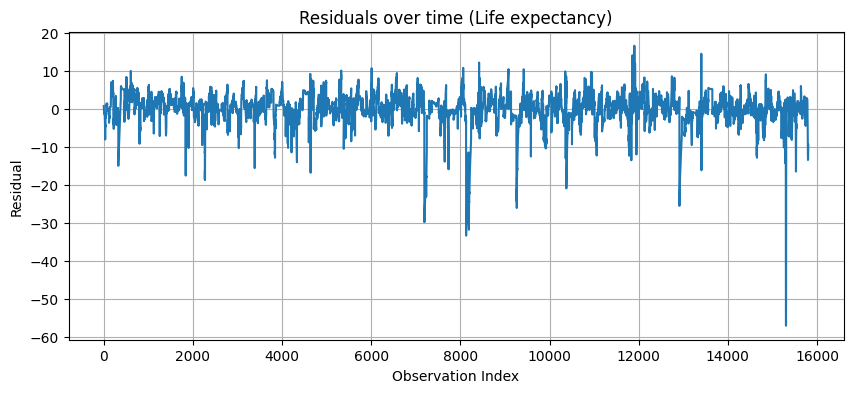


=== Newey-West Adjusted OLS Results for: Cardiovascular diseases ===
                               OLS Regression Results                              
Dep. Variable:     Cardiovascular diseases   R-squared:                       0.237
Model:                                 OLS   Adj. R-squared:                  0.236
Method:                      Least Squares   F-statistic:                     5.258
Date:                     Sat, 12 Jul 2025   Prob (F-statistic):           1.18e-23
Time:                             12:55:45   Log-Likelihood:            -1.0059e+05
No. Observations:                    15806   AIC:                         2.012e+05
Df Residuals:                        15769   BIC:                         2.015e+05
Df Model:                               36                                         
Covariance Type:                       HAC                                         
                                         coef    std err          t      P>|t|      [0.025

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 48, but rank is 38
  warnings.warn('covariance of constraints does not have full '


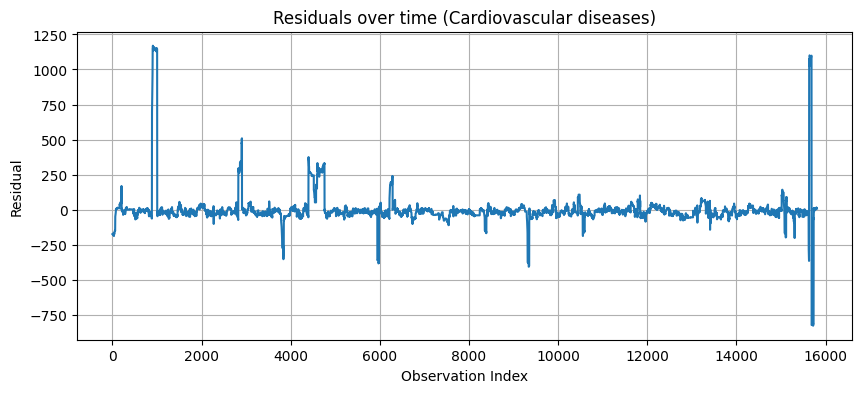


=== Newey-West Adjusted OLS Results for: Diabetes ===
                            OLS Regression Results                            
Dep. Variable:               Diabetes   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     627.9
Date:                Sat, 12 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:55:45   Log-Likelihood:                -41732.
No. Observations:               15806   AIC:                         8.354e+04
Df Residuals:                   15769   BIC:                         8.382e+04
Df Model:                          36                                         
Covariance Type:                  HAC                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 48, but rank is 38
  warnings.warn('covariance of constraints does not have full '


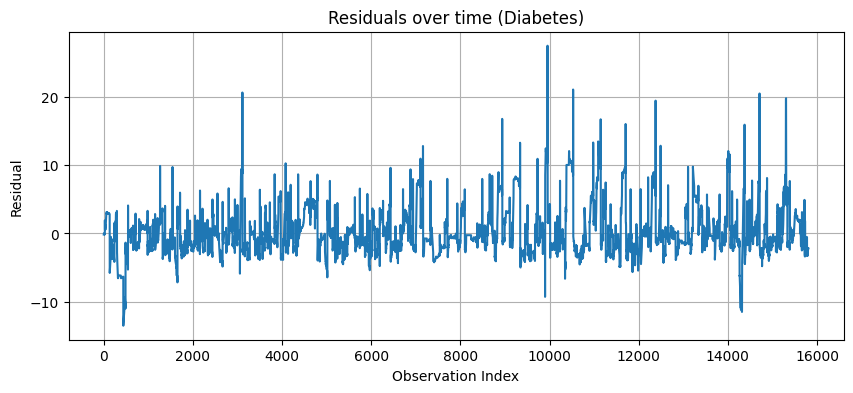

In [ ]:
# HAC

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# Define target columns - Corrected names
target_cols = ['Life expectancy', 'Cardiovascular diseases', 'Diabetes']

# Use df_lagged which was created earlier and contains the necessary data and lags
# Ensure df_lagged is accessible in this cell's scope if it was created in a different cell.
# If df_lagged is not available, you might need to recreate it or load it.
# Assuming df_lagged is available from previous steps.

# Select features for X - Exclude all target vars from features
# Make sure to drop the current target column from X inside the loop
# The `df_lagged` DataFrame has a MultiIndex ('Country', 'Year').
# When using OLS with a MultiIndex DataFrame, statsmodels handles it correctly.

# Print summary
for target in target_cols: # Loop through the corrected target names
    print(f"\n=== Newey-West Adjusted OLS Results for: {target} ===")

    # Define X and y for the current target
    y = df_lagged[target]
    # Exclude the current target variable from the predictors
    X = df_lagged.drop(columns=target_cols)

    # Add constant term to the model (intercept)
    X_const = sm.add_constant(X)

    # Fit OLS model
    model = sm.OLS(y, X_const).fit()

    # Apply Newey-West standard errors
    # maxlags should be <= nobs / 4, where nobs is the number of observations.
    # Let's use a reasonable default, e.g., min(10, nobs - 1) or related to data frequency.
    # Given the data is yearly, maxlags=5 might be more appropriate or calculated based on T.
    # For simplicity and to avoid potential errors with small subsets, let's start with a small maxlags.
    # A more robust approach would dynamically set maxlags based on the actual data length for the model fit.
    try:
        nw = model.get_robustcov_results(cov_type='HAC', maxlags=5) # Reduced maxlags for robustness
        # Display results
        print(nw.summary())

        # Residual plot for the current target
        residuals = nw.resid # Use residuals from the HAC model
        plt.figure(figsize=(10, 4))
        plt.plot(residuals)
        plt.title(f'Residuals over time ({target})')
        plt.xlabel('Observation Index') # Using index as x-axis for time series
        plt.ylabel('Residual')
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Could not fit HAC model or plot residuals for {target}: {e}")

Result of HAC:

The OLS regression summary reveals varying levels of model performance across the three health outcomes. The model for Life Expectancy demonstrates very strong explanatory power, with an R-squared of 0.867, indicating that about 87% of the variability in life expectancy is captured by the predictors. The high F-statistic (25,410) and a near-zero p-value confirm that the overall model is statistically significant, supported further by a low AIC (90270) and BIC (90550) that signal good model fit.

In contrast, the model for Cardiovascular Diseases shows notably weaker performance. Its R-squared value is just 0.237, meaning only 24% of the variance is explained by the model. Although the F-statistic (5.258) is statistically significant, the very high AIC (201200) and BIC (201500) suggest limited predictive capacity and potential room for structural improvement or additional variables.

The Diabetes model stands in the middle, with a moderate R-squared of 0.485. This implies that nearly 49% of the variation in diabetes prevalence is explained, which is respectable for population-level health data. A strong F-statistic (627.9) and comparatively lower AIC (83540) and BIC (83820) values suggest better goodness-of-fit than the cardiovascular model, though it doesn't match the strength of the life expectancy regression.

Overall, these results indicate that the predictors are highly effective at modeling life expectancy, reasonably effective for diabetes, and much less so for cardiovascular diseases — prompting consideration for alternative modeling techniques or feature enhancement in that domain. Let me know if you'd like help refining the cardiovascular model or visualizing these diagnostic metrics.



# Stationary Check (ADF)

On the other hand, the ADF test is used to check whether a time series is stationary, meaning that its statistical properties such as mean and variance do not change over time. Many time series models, especially ARIMA, require stationary input data. The ADF test does this by testing for the presence of a unit root. If the test returns a p-value less than 0.05, it suggests that the data is stationary and does not have a unit root, which is a favorable condition for modeling. If the p-value is higher, it indicates non-stationarity, and you may need to transform the series (e.g., using differencing) before modeling.

In this project, residual diagnostics ensure that the regression assumptions are met, increasing the reliability and interpretability of the models. The ADF test guides your decision on whether time series transformations like differencing are needed before applying models such as ARIMA. Together, these steps strengthen your modeling pipeline by validating model assumptions and ensuring the forecasts are based on appropriate statistical foundations.

In [ ]:
# ADF

from statsmodels.tsa.stattools import adfuller

def adf_stationarity_check(series):
    adf_result = adfuller(series.dropna())
    return {
        "ADF Statistic": adf_result[0],
        "p-value": adf_result[1],
        "Critical Values": adf_result[4]
    }

target_cols = ['Life expectancy', 'Cardiovascular diseases', 'Diabetes']

for target in target_cols:
    # Define y for the current target
    y_train = df_lagged[target]

    # Exclude only the current target from predictors
    X_train = df_lagged.drop(columns=target_cols)

    print(f"\n=== Diagnostics for: {target} ===")
    print(residual_diagnostics(X_train, y_train))  # Ensure this function is defined elsewhere
    print(adf_stationarity_check(y_train))


=== Diagnostics for: Life expectancy ===
{'Breusch-Pagan (Heteroscedasticity)': {'Lagrange multiplier statistic': np.float64(764.4477255858551), 'p-value': np.float64(1.0232367203146819e-129), 'f-value': np.float64(22.26162116493993), 'f p-value': np.float64(4.0766328819801317e-141)}, 'Ljung-Box p-value (Autocorrelation, lag=10)': np.float64(0.0)}
{'ADF Statistic': np.float64(-17.614197057131815), 'p-value': np.float64(3.866478352494326e-30), 'Critical Values': {'1%': np.float64(-3.4307638422205895), '5%': np.float64(-2.8617229010419623), '10%': np.float64(-2.5668673536914586)}}

=== Diagnostics for: Cardiovascular diseases ===
{'Breusch-Pagan (Heteroscedasticity)': {'Lagrange multiplier statistic': np.float64(4099.901314129021), 'p-value': np.float64(0.0), 'f-value': np.float64(153.41325149630802), 'f p-value': np.float64(0.0)}, 'Ljung-Box p-value (Autocorrelation, lag=10)': np.float64(0.0)}
{'ADF Statistic': np.float64(-10.55352996297969), 'p-value': np.float64(8.061050911316133e-19

The residual diagnostics for the models predicting Life Expectancy, Cardiovascular Diseases, and Diabetes reveal consistent patterns of statistical irregularities paired with encouraging signs of stationarity. All three targets show strong signs of heteroscedasticity, confirmed by highly significant Breusch–Pagan test results (p-values essentially zero), indicating that residual variances are not constant — a violation of classical regression assumptions that could affect inference accuracy. Moreover, the Ljung–Box test yields p-values of 0.0 across the board at lag 10, pointing to significant autocorrelation in residuals, which suggests that errors are not independently distributed over time and may be influenced by underlying temporal dependencies.

On a more favorable note, the Augmented Dickey-Fuller (ADF) test for each target strongly rejects the null hypothesis of a unit root, with test statistics well below the critical thresholds and extremely small p-values. This indicates that residuals are stationary, meaning they fluctuate around a stable mean and exhibit no drift — an essential property for time-series models and reliable forecasting.

Together, these diagnostics suggest that while the models capture stable error structures in terms of stationarity, they struggle with error consistency and independence. Addressing these issues may require enhancements such as robust error handling, autoregressive residual modeling, or more dynamic forecasting approaches. Let me know if you'd like help selecting and implementing those improvements — you're truly digging into the core of model reliability



## ACF and PACF plot

ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are visual tools used to analyze the correlation structure of time series data. They help identify patterns and dependencies between data points at different lags (time intervals) and are crucial for determining appropriate models for time series forecasting, particularly AR (Autoregressive) and MA (Moving Average) models.


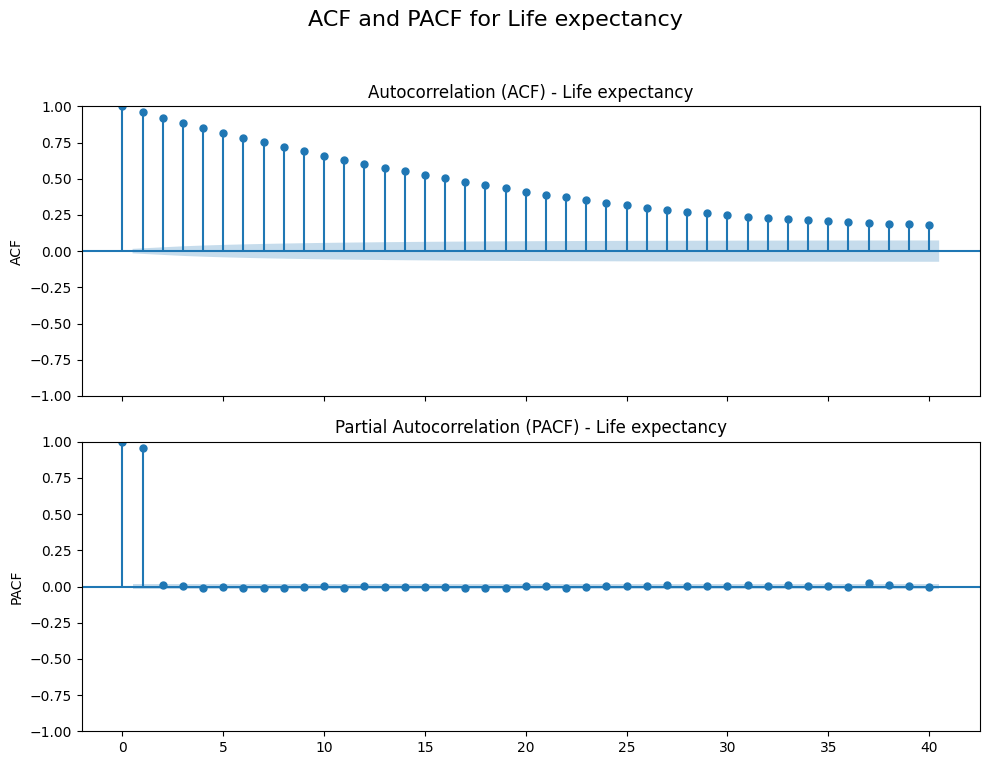

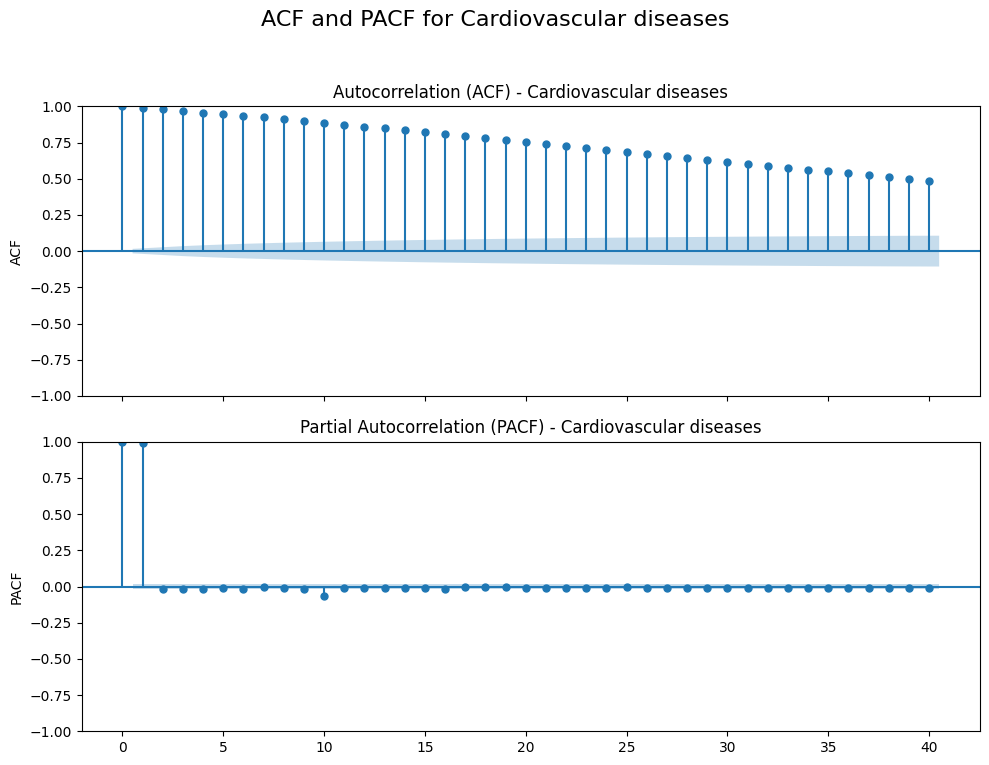

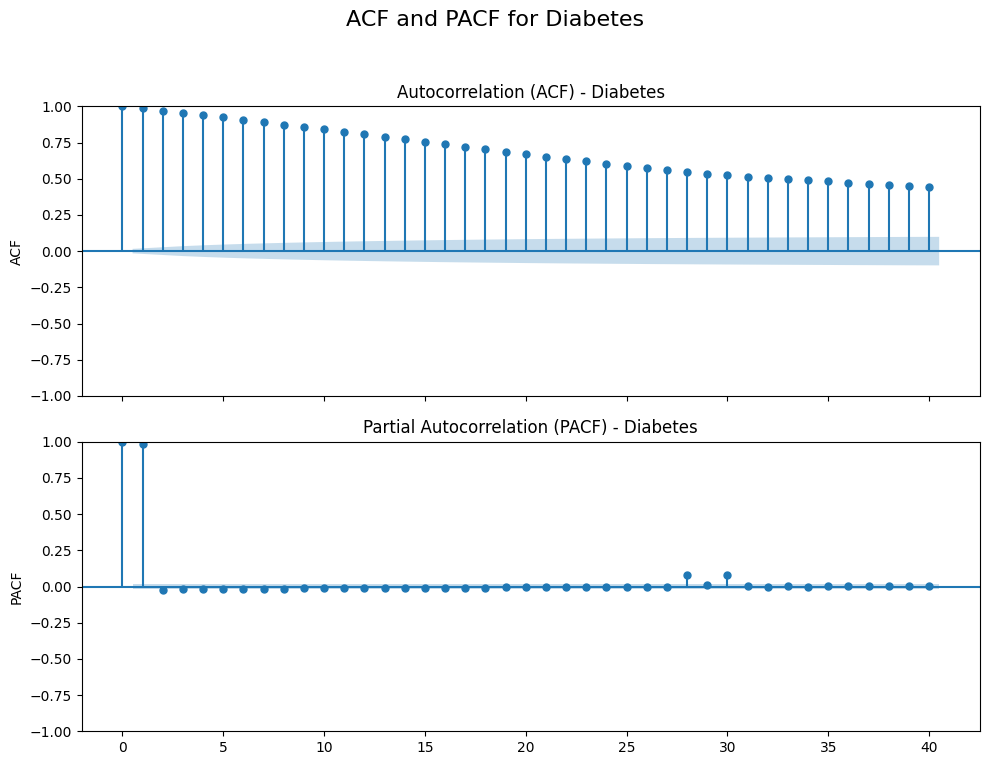

In [ ]:
# ACF and PACF plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming df_lagged is your dataset and contains time-series data
target_cols = ['Life expectancy', 'Cardiovascular diseases', 'Diabetes']

for target in target_cols:
    series = df_lagged[target].dropna()

    fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    fig.suptitle(f'ACF and PACF for {target}', fontsize=16)

    plot_acf(series, lags=40, ax=ax[0])
    ax[0].set_title(f'Autocorrelation (ACF) - {target}')
    ax[0].set_ylabel('ACF')

    plot_pacf(series, lags=40, ax=ax[1], method='ywm')
    ax[1].set_title(f'Partial Autocorrelation (PACF) - {target}')
    ax[1].set_ylabel('PACF')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Restore Country and Year to lagged_df

In [ ]:
## Restore Country and Year

# Restore Country and Year
df_lagged_with_country = df_lagged.reset_index()

## Rolling Forecast Validation (Walk-Forward)

10 diversity Countries have been selected by their income level for rolling forecast validation (Walk-Forward) as follows:
* United States -  High-income
* Germany - High-income
* Japan - High-income
* Brazil - Upper-middle-income
* India - Lower-middle-income
* Indonesia - Lower-middle-income
* Nigeria - Low-income
* Kenya - Low-income
* Mexico - Upper-middle-income
* Bangladesh - Low-middle-income

In [53]:
# Rolling Forecast - Walk Forward Validation  - REVISED

from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# === Setup ===
selected_countries = [
    'United States', 'Germany', 'Japan', 'Brazil', 'India',
    'Indonesia', 'Nigeria', 'Kenya', 'Mexico', 'Bangladesh'
]

target_columns = ['Life expectancy', 'Cardiovascular diseases', 'Diabetes']

selected_features_dict = {
    'Life expectancy': [
        'Child mortality rate', 'Median age', 'Incomplete tertiary education_lag3',
        'GDP', 'Sex ratio', 'Gini coefficient_lag2', 'Gini coefficient_lag3',
        'Sex ratio_lag2', 'Sex ratio_lag3', 'Sex ratio_lag1',
        'Gini coefficient', 'Incomplete tertiary education', 'Inflation'
    ],
    'Cardiovascular diseases': [
        'GDP', 'Gini coefficient_lag3', 'BMI_avg_lag3', 'Median age_lag3'
    ],
    'Diabetes': [
        'BMI_avg_lag3', 'Income', 'Income_lag1', 'Median age',
        'Income_lag3', 'Incomplete tertiary education', 'Income_lag2',
        'Child mortality rate', 'Sex ratio', 'Gini coefficient'
    ]
}

start_train = 1950
end_train = 2020
real_eval_period = [2021, 2022, 2023]

# Forecast horizon starts from 2024 and goes till 2073
forecast_horizon = list(range(2024, 2074))

# === Create future rows for years 2024 to 2073
future_rows = []
for country in df_combined_with_country['Country'].unique():
    for year in forecast_horizon:
        future_rows.append({'Country': country, 'Year': year})

df_future = pd.DataFrame(future_rows)
df_forecast_ready = pd.concat([df_combined_with_country, df_future], ignore_index=True)
df_forecast_ready['Year'] = df_forecast_ready['Year'].astype(int)

# === Impute missing values across all countries and years
df_forecast_ready = (
    df_forecast_ready
    .sort_values(['Country', 'Year'])
    .groupby('Country', group_keys=False)
    .apply(lambda x: x.ffill().bfill().infer_objects(copy=False))
    .reset_index(drop=True)
)

# === Initialize summary table
predictions_summary = []

# === Forecast Loop ===
for country in selected_countries:
    df_country = df_forecast_ready[df_forecast_ready['Country'] == country].sort_values('Year')

    for target in target_columns:
        print(f"\n {country} —  {target}")
        if target not in df_country.columns:
            print(" Target missing")
            continue

        features = selected_features_dict.get(target, [])
        available_features = [f for f in features if f in df_country.columns]
        if not available_features:
            print(" No usable features found")
            continue

        df_train = df_country[df_country['Year'].between(start_train, end_train)]
        df_eval_real = df_country[df_country['Year'].isin(real_eval_period)]

        # === ARIMA ===
        arima_rmse = None
        try:
            df_train_arima = df_train[[target]].copy()
            df_train_arima.index = pd.date_range(start=f'{start_train}', periods=len(df_train_arima), freq='YE')
            model_arima = ARIMA(df_train_arima, order=(1, 1, 1)).fit()

            # Real evaluation
            pred_real = model_arima.predict(start=len(df_train_arima), end=len(df_train_arima)+len(df_eval_real)-1)
            actual_real = df_eval_real[target].values
            arima_rmse = np.sqrt(mean_squared_error(actual_real, pred_real))

            # Forecast for 2024-2073
            arima_forecast = model_arima.predict(start=len(df_train_arima), end=len(df_train_arima) + len(forecast_horizon) - 1)
            print(f"📉 ARIMA RMSE: {arima_rmse:.2f}")
        except Exception as e:
            print(f" ARIMA error: {e}")

        # === Prophet ===
        prophet_rmse = None
        try:
            prophet_df = df_train[['Year', target]].rename(columns={'Year': 'ds', target: 'y'})
            prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')
            model_prophet = Prophet()
            model_prophet.fit(prophet_df)

            future_years = real_eval_period + forecast_horizon
            future_dates = pd.DataFrame({'ds': pd.to_datetime(future_years, format='%Y')})
            forecast_prophet = model_prophet.predict(future_dates)

            # Real evaluation
            pred_real = forecast_prophet[forecast_prophet['ds'].dt.year.isin(real_eval_period)]['yhat'].values
            actual_real = df_eval_real[target].values
            prophet_rmse = np.sqrt(mean_squared_error(actual_real, pred_real))

            # Forecast for 2024-2073
            prophet_forecast = forecast_prophet[forecast_prophet['ds'].dt.year.isin(forecast_horizon)]
            print(f" Prophet RMSE: {prophet_rmse:.2f}")
        except Exception as e:
            print(f" Prophet error: {e}")

      #### Random Forest ####
        #from google.colab import data_table
        #data_table.DataTable(df_forecast)

        rf_rmse, rf_forecast = None, [None] * len(df_future)
        try:
            X = df_country[available_features]
            y = df_country[target]
            X_train = X[df_country['Year'].between(start_train, end_train)]
            y_train = y[df_country['Year'].between(start_train, end_train)]
            X_eval = X[df_country['Year'].isin(real_eval_period)]
            y_eval = y[df_country['Year'].isin(real_eval_period)]
            model = RandomForestRegressor(n_estimators=100, random_state=42)
            model.fit(X_train, y_train)
            pred_eval = model.predict(X_eval)
            rf_rmse = np.sqrt(mean_squared_error(y_eval, pred_eval))
            X_forecast = X[df_country['Year'].isin(forecast_horizon)]
            if not X_forecast.isnull().any(axis=1).any():
                rf_forecast = model.predict(X_forecast).tolist()
        except:
            pass


        # === Append to summary ===
        predictions_summary.append({
            "Country": country,
            "Target": target,
            "ARIMA_RMSE": round(arima_rmse, 4) if arima_rmse is not None else None,
            "Prophet_RMSE": round(prophet_rmse, 4) if prophet_rmse is not None else None,
            "RF_RMSE": round(rf_rmse, 4) if rf_rmse is not None else None
        })

# === Final Summary Table ===
df_forecast_validation_summary = pd.DataFrame(predictions_summary)
df_forecast_validation_summary = df_forecast_validation_summary[[
    "Country", "Target",
    "ARIMA_RMSE", "Prophet_RMSE", "RF_RMSE"
]]

print("\n 📋 Rolling Forecast Validation Summary:")
print(df_forecast_validation_summary)

# Export summary
df_forecast_validation_summary.to_csv("forecast_summary.csv", index=False)


# export
df_forecast_validation_summary.to_csv("forecast_summary.csv", index=False)


 United States —  Life expectancy
📉 ARIMA RMSE: 2.00


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/k6b9e8jj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/kvfbixr1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55728', 'data', 'file=/tmp/tmpfus6j9tk/k6b9e8jj.json', 'init=/tmp/tmpfus6j9tk/kvfbixr1.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelhgva2299/prophet_model-20250714225355.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:53:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:53:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 1.56

 United States —  Cardiovascular diseases


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/i17t4f38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/fqaoi3qn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48554', 'data', 'file=/tmp/tmpfus6j9tk/i17t4f38.json', 'init=/tmp/tmpfus6j9tk/fqaoi3qn.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelry9gguxd/prophet_model-20250714225356.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:53:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 1.19


22:53:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 11.97


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



 United States —  Diabetes
📉 ARIMA RMSE: 0.01


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/r2f8exp3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/fd0_y7sd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46691', 'data', 'file=/tmp/tmpfus6j9tk/r2f8exp3.json', 'init=/tmp/tmpfus6j9tk/fd0_y7sd.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelqaflbqpw/prophet_model-20250714225358.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:53:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:53:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 0.49

 Germany —  Life expectancy


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/gzjdst4y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/m2uk4kbf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34654', 'data', 'file=/tmp/tmpfus6j9tk/gzjdst4y.json', 'init=/tmp/tmpfus6j9tk/m2uk4kbf.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model8_yx77yj/prophet_model-20250714225359.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:53:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 0.47


22:53:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


 Prophet RMSE: 0.61

 Germany —  Cardiovascular diseases
📉 ARIMA RMSE: 0.43


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/27907kb5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/re87vcrw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60505', 'data', 'file=/tmp/tmpfus6j9tk/27907kb5.json', 'init=/tmp/tmpfus6j9tk/re87vcrw.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelj6igl2bw/prophet_model-20250714225359.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:53:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:54:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 2.13

 Germany —  Diabetes


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/vqiwtfk9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/930xzkv2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34706', 'data', 'file=/tmp/tmpfus6j9tk/vqiwtfk9.json', 'init=/tmp/tmpfus6j9tk/930xzkv2.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelo5u3z6qj/prophet_model-20250714225400.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 0.00


22:54:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 2.76

 Japan —  Life expectancy


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/ulyt_y2i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/4s97bast.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19551', 'data', 'file=/tmp/tmpfus6j9tk/ulyt_y2i.json', 'init=/tmp/tmpfus6j9tk/4s97bast.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelv2a6ecw8/prophet_model-20250714225403.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 0.64


22:54:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 0.58

 Japan —  Cardiovascular diseases


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/y45dgblp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/itogmayo.json
DEBUG:cmdstanpy:idx 0


📉 ARIMA RMSE: 1.55


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1113', 'data', 'file=/tmp/tmpfus6j9tk/y45dgblp.json', 'init=/tmp/tmpfus6j9tk/itogmayo.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model12mu1jf3/prophet_model-20250714225407.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:54:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 7.69

 Japan —  Diabetes
📉 ARIMA RMSE: 0.00


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/0d368l0n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/y75k3qqm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6545', 'data', 'file=/tmp/tmpfus6j9tk/0d368l0n.json', 'init=/tmp/tmpfus6j9tk/y75k3qqm.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelyl_gyffm/prophet_model-20250714225409.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:54:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 1.84


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



 Brazil —  Life expectancy
📉 ARIMA RMSE: 3.01


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/k8b6yy08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/pzab_u6a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34648', 'data', 'file=/tmp/tmpfus6j9tk/k8b6yy08.json', 'init=/tmp/tmpfus6j9tk/pzab_u6a.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model53e36sre/prophet_model-20250714225410.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:54:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 2.19

 Brazil —  Cardiovascular diseases
📉 ARIMA RMSE: 1.82


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/fn0_vj3j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/shdg9zrz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26710', 'data', 'file=/tmp/tmpfus6j9tk/fn0_vj3j.json', 'init=/tmp/tmpfus6j9tk/shdg9zrz.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modeltcwukffq/prophet_model-20250714225412.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:54:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 6.55

 Brazil —  Diabetes
📉 ARIMA RMSE: 0.00


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/o7zp6vgc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/z2ay57oc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62887', 'data', 'file=/tmp/tmpfus6j9tk/o7zp6vgc.json', 'init=/tmp/tmpfus6j9tk/z2ay57oc.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model043owfby/prophet_model-20250714225414.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:54:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 0.19

 India —  Life expectancy


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/e999rhz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/idwlrkkb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32049', 'data', 'file=/tmp/tmpfus6j9tk/e999rhz9.json', 'init=/tmp/tmpfus6j9tk/idwlrkkb.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelj8vex4bv/prophet_model-20250714225417.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 1.97


22:54:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 2.48

 India —  Cardiovascular diseases


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/byhiuax_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/k9zwvld8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50154', 'data', 'file=/tmp/tmpfus6j9tk/byhiuax_.json', 'init=/tmp/tmpfus6j9tk/k9zwvld8.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelzm27i82p/prophet_model-20250714225420.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 19.66


22:54:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 37.42

 India —  Diabetes


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/6jg2tyad.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/cwi14jpe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60566', 'data', 'file=/tmp/tmpfus6j9tk/6jg2tyad.json', 'init=/tmp/tmpfus6j9tk/cwi14jpe.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelbi6bopvu/prophet_model-20250714225423.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 0.02


22:54:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 0.83

 Indonesia —  Life expectancy


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/79v76ucn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/v0uhgrz9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30038', 'data', 'file=/tmp/tmpfus6j9tk/79v76ucn.json', 'init=/tmp/tmpfus6j9tk/v0uhgrz9.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelevcd7dtt/prophet_model-20250714225424.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 1.89


22:54:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 1.69

 Indonesia —  Cardiovascular diseases


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/5k14f9y3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/z81txmo0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25943', 'data', 'file=/tmp/tmpfus6j9tk/5k14f9y3.json', 'init=/tmp/tmpfus6j9tk/z81txmo0.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model50ahb9y2/prophet_model-20250714225426.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 8.49


22:54:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 8.00

 Indonesia —  Diabetes


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/ppo_f3v2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/df5l74r_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44234', 'data', 'file=/tmp/tmpfus6j9tk/ppo_f3v2.json', 'init=/tmp/tmpfus6j9tk/df5l74r_.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelog4iax39/prophet_model-20250714225428.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 0.00


22:54:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 0.71


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/o1cdvkf4.json



 Nigeria —  Life expectancy
📉 ARIMA RMSE: 0.70


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/1j67ita3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37848', 'data', 'file=/tmp/tmpfus6j9tk/o1cdvkf4.json', 'init=/tmp/tmpfus6j9tk/1j67ita3.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model0e_2aamb/prophet_model-20250714225429.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:54:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 0.37

 Nigeria —  Cardiovascular diseases


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/dgkyn6cr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/ca8_euyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72798', 'data', 'file=/tmp/tmpfus6j9tk/dgkyn6cr.json', 'init=/tmp/tmpfus6j9tk/ca8_euyf.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model8sk75ftp/prophet_model-20250714225432.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 0.72


22:54:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 4.50

 Nigeria —  Diabetes
📉 ARIMA RMSE: 0.00


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/hiuzsx1j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/_l_84v__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28510', 'data', 'file=/tmp/tmpfus6j9tk/hiuzsx1j.json', 'init=/tmp/tmpfus6j9tk/_l_84v__.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelx1t0vaq6/prophet_model-20250714225435.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:54:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 0.14

 Kenya —  Life expectancy
📉 ARIMA RMSE: 3.24


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/d15fg_fu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/6tql93an.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95483', 'data', 'file=/tmp/tmpfus6j9tk/d15fg_fu.json', 'init=/tmp/tmpfus6j9tk/6tql93an.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelpb3n2ksg/prophet_model-20250714225436.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:54:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 1.67

 Kenya —  Cardiovascular diseases


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/q_tmx6t1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/dofu1xxq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16231', 'data', 'file=/tmp/tmpfus6j9tk/q_tmx6t1.json', 'init=/tmp/tmpfus6j9tk/dofu1xxq.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modeltorom1bl/prophet_model-20250714225438.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 0.12


22:54:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 0.93


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/407tce1y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/f8xq1x3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29379', 'data', 'file=/tmp/tmpfus6j9tk/407tce1y.json', 'init=/tmp/tmpfus6j9tk/f8xq1x3f.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model_vikl_00/prophet_model-20250714225440.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



 Kenya —  Diabetes
📉 ARIMA RMSE: 0.00


22:54:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 3.48

 Mexico —  Life expectancy


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/hxfjmmt7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/44rapkqa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94006', 'data', 'file=/tmp/tmpfus6j9tk/hxfjmmt7.json', 'init=/tmp/tmpfus6j9tk/44rapkqa.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modely1pppj68/prophet_model-20250714225441.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 6.22


22:54:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 2.43


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/n6fts8wi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/z4_8o7vj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50073', 'data', 'file=/tmp/tmpfus6j9tk/n6fts8wi.json', 'init=/tmp/tmpfus6j9tk/z4_8o7vj.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modela2mbrnn4/prophet_model-20250714225443.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



 Mexico —  Cardiovascular diseases
📉 ARIMA RMSE: 0.58


22:54:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 0.84

 Mexico —  Diabetes


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/sprmipcw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/x3s3qw6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93454', 'data', 'file=/tmp/tmpfus6j9tk/sprmipcw.json', 'init=/tmp/tmpfus6j9tk/x3s3qw6w.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelytxrm04e/prophet_model-20250714225445.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 0.00


22:54:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 0.80

 Bangladesh —  Life expectancy


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/b2wyqpv2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/4jeuzhlm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68825', 'data', 'file=/tmp/tmpfus6j9tk/b2wyqpv2.json', 'init=/tmp/tmpfus6j9tk/4jeuzhlm.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelplo4ln2s/prophet_model-20250714225446.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 2.31


22:54:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 1.68

 Bangladesh —  Cardiovascular diseases


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/yfflpmv6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/fflmvfwg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41266', 'data', 'file=/tmp/tmpfus6j9tk/yfflpmv6.json', 'init=/tmp/tmpfus6j9tk/fflmvfwg.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model_81ybuu7/prophet_model-20250714225448.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


📉 ARIMA RMSE: 1.18


22:54:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 Prophet RMSE: 6.99

 Bangladesh —  Diabetes
📉 ARIMA RMSE: 0.00


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/965zsf0t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/al5iwv1y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22801', 'data', 'file=/tmp/tmpfus6j9tk/965zsf0t.json', 'init=/tmp/tmpfus6j9tk/al5iwv1y.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelmxzwl0qy/prophet_model-20250714225448.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:54:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:54:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 Prophet RMSE: 2.99

 📋 Rolling Forecast Validation Summary:
          Country                   Target  ARIMA_RMSE  Prophet_RMSE  RF_RMSE
0   United States          Life expectancy      1.9969        1.5614   1.1020
1   United States  Cardiovascular diseases      1.1904       11.9749   4.3086
2   United States                 Diabetes      0.0080        0.4896   0.0081
3         Germany          Life expectancy      0.4746        0.6124   0.3493
4         Germany  Cardiovascular diseases      0.4339        2.1255   0.8296
5         Germany                 Diabetes      0.0000        2.7582   0.0000
6           Japan          Life expectancy      0.6387        0.5765   0.2755
7           Japan  Cardiovascular diseases      1.5477        7.6884   2.5709
8           Japan                 Diabetes      0.0000        1.8411   0.0000
9          Brazil          Life expectancy      3.0096        2.1896   1.1742
10         Brazil  Cardiovascular diseases      1.8195        6.5472   2.3205
11 

## Final Model Training & Forecasting     |     Evaluation metrics (RMSE, MAPE, R²)

In [54]:
# Step 19 Final Model Training & Forecasting - ok
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import warnings
import logging

warnings.filterwarnings("ignore")
logging.getLogger('statsmodels').setLevel(logging.ERROR)

# === Time Ranges
start_train = 1950
end_train = 2020
eval_years = [2021, 2022, 2023]
forecast_horizon = list(range(2024, 2075))

# === Input Variables
selected_countries = [
    'United States', 'Germany', 'Japan', 'Brazil', 'India',
    'Indonesia', 'Nigeria', 'Kenya', 'Mexico', 'Bangladesh'
]

target_columns = ['Life expectancy', 'Cardiovascular diseases', 'Diabetes']

selected_features_dict = {
    'Life expectancy': [
        'Child mortality rate', 'Median age', 'Incomplete tertiary education_lag3',
        'GDP', 'Sex ratio', 'Gini coefficient_lag2', 'Gini coefficient_lag3',
        'Sex ratio_lag2', 'Sex ratio_lag3', 'Sex ratio_lag1',
        'Gini coefficient', 'Incomplete tertiary education', 'Inflation'
    ],
    'Cardiovascular diseases': [
        'GDP', 'Gini coefficient_lag3', 'BMI_avg_lag3', 'Median age_lag3'
    ],
    'Diabetes': [
        'BMI_avg_lag3', 'Income', 'Income_lag1', 'Median age',
        'Income_lag3', 'Incomplete tertiary education', 'Income_lag2',
        'Child mortality rate', 'Sex ratio', 'Gini coefficient'
    ]
}

# === Ready Dataset (already loaded)
# df_forecast_ready = your real dataset

# === Forecasting and Evaluation
forecast_summary = []

for country in selected_countries:
    df_country = df_forecast_ready[df_forecast_ready['Country'] == country].sort_values('Year')

    for target in target_columns:
        if target not in df_country.columns:
            continue

        features = selected_features_dict.get(target, [])
        available_features = [f for f in features if f in df_country.columns]
        if not available_features:
            continue

        df_train = df_country[df_country['Year'].between(start_train, end_train)]
        df_eval = df_country[df_country['Year'].isin(eval_years)]
        df_forecast = df_country[df_country['Year'].isin(forecast_horizon)]
        actual_eval = df_eval[target].values

        #### ARIMA ####
        arima_rmse, arima_forecast = None, [None] * len(df_forecast)
        try:
            train_series = df_train[[target]].copy()
            train_series.index = pd.date_range(start='1950', periods=len(train_series), freq='YE')
            model = ARIMA(train_series, order=(1, 1, 1)).fit()
            pred_eval = model.predict(start=len(train_series), end=len(train_series) + len(df_eval) - 1)
            arima_rmse = np.sqrt(mean_squared_error(actual_eval, pred_eval))
            arima_forecast = model.predict(start=len(train_series) + len(df_eval),
                                           end=len(train_series) + len(df_eval) + len(df_forecast) - 1).tolist()
        except:
            pass

        #### Prophet ####
        prophet_rmse, prophet_forecast = None, [None] * len(df_forecast)
        try:
            prophet_df = df_train[['Year', target]].rename(columns={'Year': 'ds', target: 'y'})
            prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')
            model = Prophet()
            model.fit(prophet_df)
            eval_dates = pd.DataFrame({'ds': pd.to_datetime(eval_years, format='%Y')})
            forecast_eval = model.predict(eval_dates)
            prophet_rmse = np.sqrt(mean_squared_error(actual_eval, forecast_eval['yhat'].values))
            forecast_years = pd.DataFrame({'ds': pd.to_datetime(df_forecast['Year'], format='%Y')})
            prophet_forecast = model.predict(forecast_years)['yhat'].tolist()
        except:
            pass

        #### Random Forest ####
        rf_rmse, rf_forecast = None, [None] * len(df_forecast)
        try:
            X = df_country[available_features]
            y = df_country[target]
            X_train = X[df_country['Year'].between(start_train, end_train)]
            y_train = y[df_country['Year'].between(start_train, end_train)]
            X_eval = X[df_country['Year'].isin(eval_years)]
            y_eval = y[df_country['Year'].isin(eval_years)]
            model = RandomForestRegressor(n_estimators=100, random_state=42)
            model.fit(X_train, y_train)
            pred_eval = model.predict(X_eval)
            rf_rmse = np.sqrt(mean_squared_error(y_eval, pred_eval))
            X_forecast = X[df_country['Year'].isin(forecast_horizon)]
            if not X_forecast.isnull().any(axis=1).any():
                rf_forecast = model.predict(X_forecast).tolist()
        except:
            pass

        for i, year in enumerate(df_forecast['Year']):
            forecast_summary.append({
                "Country": country,
                "Target": target,
                "Year": year,
                "ARIMA_RMSE": arima_rmse,
                "ARIMA_Forecast": arima_forecast[i],
                "Prophet_RMSE": prophet_rmse,
                "Prophet_Forecast": prophet_forecast[i],
                "RF_RMSE": rf_rmse,
                "RF_Forecast": rf_forecast[i]
            })

# === Combine All Results
df_model_comparison = pd.DataFrame(forecast_summary)

# === Summary Table: Best Model by RMSE
summary_table = df_model_comparison.groupby(['Country', 'Target'])[['ARIMA_RMSE', 'Prophet_RMSE', 'RF_RMSE']].first().reset_index()

def best_model_picker(row):
    scores = {
        'ARIMA': row['ARIMA_RMSE'],
        'Prophet': row['Prophet_RMSE'],
        'RF': row['RF_RMSE']
    }
    return min(scores, key=lambda k: scores[k] if pd.notnull(scores[k]) else np.inf)

summary_table['🎯 Best_Model'] = summary_table.apply(best_model_picker, axis=1)

# === Display Results
print("\n📊 Summary of Best Models per Country and Target:\n")
print(summary_table[['Country', 'Target', 'ARIMA_RMSE', 'Prophet_RMSE', 'RF_RMSE', '🎯 Best_Model']].to_string(index=False))

# === Optional Preview of Forecasts
sample_years = [2025, 2030, 2040, 2050, 2060, 2074]
df_sample = df_model_comparison[df_model_comparison['Year'].isin(sample_years)]
df_sample = df_sample.sort_values(['Country', 'Target', 'Year'])
print("\n📋 Forecasts for Selected Years:\n")
print(df_sample.head(30).to_string(index=False))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/r4c9jzuz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/s1f34b_s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65770', 'data', 'file=/tmp/tmpfus6j9tk/r4c9jzuz.json', 'init=/tmp/tmpfus6j9tk/s1f34b_s.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelh5gywcku/prophet_model-20250714225504.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:55:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:55:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali


📊 Summary of Best Models per Country and Target:

      Country                  Target  ARIMA_RMSE  Prophet_RMSE      RF_RMSE 🎯 Best_Model
   Bangladesh Cardiovascular diseases    1.175582      6.991238 4.101364e-01           RF
   Bangladesh                Diabetes    0.000036      2.987844 1.033409e-01        ARIMA
   Bangladesh         Life expectancy    2.312728      1.676697 3.592230e+00      Prophet
       Brazil Cardiovascular diseases    1.819507      6.547227 2.320450e+00        ARIMA
       Brazil                Diabetes    0.000000      0.186005 3.273123e-02        ARIMA
       Brazil         Life expectancy    3.009573      2.189554 1.174190e+00           RF
      Germany Cardiovascular diseases    0.433925      2.125500 8.295614e-01        ARIMA
      Germany                Diabetes    0.000000      2.758175 0.000000e+00        ARIMA
      Germany         Life expectancy    0.474573      0.612408 3.493298e-01           RF
        India Cardiovascular diseases   19.662985

In [55]:
# Summary of Best Models per Country and Target
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import warnings
import logging

warnings.filterwarnings("ignore")
logging.getLogger('statsmodels').setLevel(logging.ERROR)

# === Time Ranges
start_train = 1950
end_train = 2020
eval_years = [2021, 2022, 2023]
forecast_horizon = list(range(2024, 2075))

# === Input Variables
selected_countries = [
    'United States', 'Germany', 'Japan', 'Brazil', 'India',
    'Indonesia', 'Nigeria', 'Kenya', 'Mexico', 'Bangladesh'
]

target_columns = ['Life expectancy', 'Cardiovascular diseases', 'Diabetes']

selected_features_dict = {
    'Life expectancy': [
        'Child mortality rate', 'Median age', 'Incomplete tertiary education_lag3',
        'GDP', 'Sex ratio', 'Gini coefficient_lag2', 'Gini coefficient_lag3',
        'Sex ratio_lag2', 'Sex ratio_lag3', 'Sex ratio_lag1',
        'Gini coefficient', 'Incomplete tertiary education', 'Inflation'
    ],
    'Cardiovascular diseases': [
        'GDP', 'Gini coefficient_lag3', 'BMI_avg_lag3', 'Median age_lag3'
    ],
    'Diabetes': [
        'BMI_avg_lag3', 'Income', 'Income_lag1', 'Median age',
        'Income_lag3', 'Incomplete tertiary education', 'Income_lag2',
        'Child mortality rate', 'Sex ratio', 'Gini coefficient'
    ]
}

# === Ready Dataset (already loaded)
# df_forecast_ready = your real dataset

# === Forecasting and Evaluation
forecast_summary = []

for country in selected_countries:
    df_country = df_forecast_ready[df_forecast_ready['Country'] == country].sort_values('Year')

    for target in target_columns:
        if target not in df_country.columns:
            continue

        features = selected_features_dict.get(target, [])
        available_features = [f for f in features if f in df_country.columns]
        if not available_features:
            continue

        df_train = df_country[df_country['Year'].between(start_train, end_train)]
        df_eval = df_country[df_country['Year'].isin(eval_years)]
        df_forecast = df_country[df_country['Year'].isin(forecast_horizon)]
        actual_eval = df_eval[target].values

        #### ARIMA ####
        arima_rmse, arima_forecast = None, [None] * len(df_forecast)
        try:
            train_series = df_train[[target]].copy()
            train_series.index = pd.date_range(start='1950', periods=len(train_series), freq='YE')
            model = ARIMA(train_series, order=(1, 1, 1)).fit()
            pred_eval = model.predict(start=len(train_series), end=len(train_series) + len(df_eval) - 1)
            arima_rmse = np.sqrt(mean_squared_error(actual_eval, pred_eval))
            arima_forecast = model.predict(start=len(train_series) + len(df_eval),
                                           end=len(train_series) + len(df_eval) + len(df_forecast) - 1).tolist()
        except:
            pass

        #### Prophet ####
        prophet_rmse, prophet_forecast = None, [None] * len(df_forecast)
        try:
            prophet_df = df_train[['Year', target]].rename(columns={'Year': 'ds', target: 'y'})
            prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')
            model = Prophet()
            model.fit(prophet_df)
            eval_dates = pd.DataFrame({'ds': pd.to_datetime(eval_years, format='%Y')})
            forecast_eval = model.predict(eval_dates)
            prophet_rmse = np.sqrt(mean_squared_error(actual_eval, forecast_eval['yhat'].values))
            forecast_years = pd.DataFrame({'ds': pd.to_datetime(df_forecast['Year'], format='%Y')})
            prophet_forecast = model.predict(forecast_years)['yhat'].tolist()
        except:
            pass

        #### Random Forest ####
        rf_rmse, rf_forecast = None, [None] * len(df_forecast)
        try:
            X = df_country[available_features]
            y = df_country[target]
            X_train = X[df_country['Year'].between(start_train, end_train)]
            y_train = y[df_country['Year'].between(start_train, end_train)]
            X_eval = X[df_country['Year'].isin(eval_years)]
            y_eval = y[df_country['Year'].isin(eval_years)]
            model = RandomForestRegressor(n_estimators=100, random_state=42)
            model.fit(X_train, y_train)
            pred_eval = model.predict(X_eval)
            rf_rmse = np.sqrt(mean_squared_error(y_eval, pred_eval))
            X_forecast = X[df_country['Year'].isin(forecast_horizon)]
            if not X_forecast.isnull().any(axis=1).any():
                rf_forecast = model.predict(X_forecast).tolist()
        except:
            pass

        for i, year in enumerate(df_forecast['Year']):
            forecast_summary.append({
                "Country": country,
                "Target": target,
                "Year": year,
                "ARIMA_RMSE": arima_rmse,
                "ARIMA_Forecast": arima_forecast[i],
                "Prophet_RMSE": prophet_rmse,
                "Prophet_Forecast": prophet_forecast[i],
                "RF_RMSE": rf_rmse,
                "RF_Forecast": rf_forecast[i]
            })

# === Combine All Results
df_model_comparison = pd.DataFrame(forecast_summary)

# === Summary Table: Best Model by RMSE
summary_table = df_model_comparison.groupby(['Country', 'Target'])[['ARIMA_RMSE', 'Prophet_RMSE', 'RF_RMSE']].first().reset_index()

def best_model_picker(row):
    scores = {
        'ARIMA': row['ARIMA_RMSE'],
        'Prophet': row['Prophet_RMSE'],
        'RF': row['RF_RMSE']
    }
    return min(scores, key=lambda k: scores[k] if pd.notnull(scores[k]) else np.inf)

summary_table['🎯 Best_Model'] = summary_table.apply(best_model_picker, axis=1)

# === Display Results
print("\n📊 Summary of Best Models per Country and Target:\n")
print(summary_table[['Country', 'Target', 'ARIMA_RMSE', 'Prophet_RMSE', 'RF_RMSE', '🎯 Best_Model']].to_string(index=False))

# === Optional Preview of Forecasts
sample_years = [2025, 2030, 2040, 2050, 2060, 2074]
df_sample = df_model_comparison[df_model_comparison['Year'].isin(sample_years)]
df_sample = df_sample.sort_values(['Country', 'Target', 'Year'])
print("\n📋 Forecasts for Selected Years:\n")
print(df_sample.head(30).to_string(index=False))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/0qc7e0bs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/m35fzw2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84455', 'data', 'file=/tmp/tmpfus6j9tk/0qc7e0bs.json', 'init=/tmp/tmpfus6j9tk/m35fzw2w.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model6fv33pfk/prophet_model-20250714225718.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:57:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:57:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali


📊 Summary of Best Models per Country and Target:

      Country                  Target  ARIMA_RMSE  Prophet_RMSE      RF_RMSE 🎯 Best_Model
   Bangladesh Cardiovascular diseases    1.175582      6.991238 4.101364e-01           RF
   Bangladesh                Diabetes    0.000036      2.987844 1.033409e-01        ARIMA
   Bangladesh         Life expectancy    2.312728      1.676697 3.592230e+00      Prophet
       Brazil Cardiovascular diseases    1.819507      6.547227 2.320450e+00        ARIMA
       Brazil                Diabetes    0.000000      0.186005 3.273123e-02        ARIMA
       Brazil         Life expectancy    3.009573      2.189554 1.174190e+00           RF
      Germany Cardiovascular diseases    0.433925      2.125500 8.295614e-01        ARIMA
      Germany                Diabetes    0.000000      2.758175 0.000000e+00        ARIMA
      Germany         Life expectancy    0.474573      0.612408 3.493298e-01           RF
        India Cardiovascular diseases   19.662985

In [56]:
# Evaluation metrics (RMSE, MAPE, R²)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_metrics(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return round(rmse, 4), round(mape, 2), round(r2, 4)

metrics_summary = []
eval_results = []  # Add this above your for-country loop to initialize the collector

# Evaluation years
eval_years = [2021, 2022, 2023]

for country in selected_countries:
    df_country = df_forecast_ready[df_forecast_ready['Country'] == country]

    for target in target_columns:
        if target not in df_country.columns:
            continue

        actual = df_country[df_country['Year'].isin(eval_years)][target].values

        # --- ARIMA ---
        try:
            train_series = df_country[df_country['Year'].between(1950, 2020)][[target]]
            train_series.index = pd.date_range(start='1950', periods=len(train_series), freq='YE')
            model_arima = ARIMA(train_series, order=(1, 1, 1)).fit()
            arima_pred = model_arima.predict(start=len(train_series), end=len(train_series)+len(eval_years)-1)
            arima_rmse, arima_mape, arima_r2 = calculate_metrics(actual, arima_pred)
            metrics_summary.append({
                "Country": country, "Target": target, "Model": "ARIMA",
                "RMSE": arima_rmse, "MAPE": arima_mape, "R²": arima_r2
            })
        except:
            pass

        # --- Prophet ---
        try:
            prophet_df = df_country[df_country['Year'].between(1950, 2020)][['Year', target]].rename(columns={'Year': 'ds', target: 'y'})
            prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')
            model_prophet = Prophet()
            model_prophet.fit(prophet_df)
            future_eval = pd.DataFrame({'ds': pd.to_datetime(eval_years, format='%Y')})
            prophet_pred = model_prophet.predict(future_eval)['yhat'].values
            prophet_rmse, prophet_mape, prophet_r2 = calculate_metrics(actual, prophet_pred)
            metrics_summary.append({
                "Country": country, "Target": target, "Model": "Prophet",
                "RMSE": prophet_rmse, "MAPE": prophet_mape, "R²": prophet_r2
            })
        except:
            pass

        # --- Random Forest ---
        try:
            features = selected_features_dict.get(target, [])
            available = [f for f in features if f in df_country.columns]
            X = df_country[available]
            y = df_country[target]
            X_train = X[df_country['Year'].between(1950, 2020)]
            y_train = y[df_country['Year'].between(1950, 2020)]
            X_eval = X[df_country['Year'].isin(eval_years)]
            model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
            model_rf.fit(X_train, y_train)
            rf_pred = model_rf.predict(X_eval)
            rf_rmse, rf_mape, rf_r2 = calculate_metrics(actual, rf_pred)

        # ✅ Add this block
            eval_rows = pd.DataFrame({
               "Country": [country] * len(eval_years),
               "Target": [target] * len(eval_years),
               "Year": eval_years,
               "Prediction": rf_pred,
               "Actual": actual
            })
            eval_results.append(eval_rows)

            metrics_summary.append({
                "Country": country, "Target": target, "Model": "Random Forest",
                "RMSE": rf_rmse, "MAPE": rf_mape, "R²": rf_r2
            })
        except:
            pass
df_eval_pred = pd.concat(eval_results, ignore_index=True)

def pick_best_model(group):
    return group.loc[group['RMSE'].idxmin(), 'Model']

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics_summary)

# Sort it and assign it to df_metrics_sorted
df_metrics_sorted = df_metrics.sort_values(['Country', 'Target', 'Model']).reset_index(drop=True)

# Best model picker function
def pick_best_model(group):
    return group.loc[group['RMSE'].idxmin(), 'Model']

# Assign Best_Model using groupby and transform
df_metrics_sorted['Best_Model'] = df_metrics_sorted.groupby(['Country', 'Target'])['RMSE'].transform(
    lambda x: df_metrics_sorted.loc[x.idxmin(), 'Model']
)

# Display full table
print("\n🎯 Step 20: Evaluation Summary with Best Model\n")
print(df_metrics_sorted[['Country', 'Target', 'Model', 'RMSE', 'MAPE', 'R²', 'Best_Model']].to_string(index=False))

#df_eval_pred = pd.concat(eval_results, ignore_index=True)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/buxlhuvh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/uvo9z782.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31249', 'data', 'file=/tmp/tmpfus6j9tk/buxlhuvh.json', 'init=/tmp/tmpfus6j9tk/uvo9z782.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelxwnaswnk/prophet_model-20250714225937.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:59:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:59:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali


🎯 Step 20: Evaluation Summary with Best Model

      Country                  Target         Model    RMSE  MAPE            R²    Best_Model
   Bangladesh Cardiovascular diseases         ARIMA  1.1756  4.02 -1.094927e+29 Random Forest
   Bangladesh Cardiovascular diseases       Prophet  6.9912 24.69 -3.872468e+30 Random Forest
   Bangladesh Cardiovascular diseases Random Forest  0.4101  1.45 -1.332712e+28 Random Forest
   Bangladesh                Diabetes         ARIMA  0.0000  0.00  0.000000e+00         ARIMA
   Bangladesh                Diabetes       Prophet  2.9878 30.49  0.000000e+00         ARIMA
   Bangladesh                Diabetes Random Forest  0.1033  1.05  0.000000e+00         ARIMA
   Bangladesh         Life expectancy         ARIMA  2.3127  2.76 -1.102500e+00       Prophet
   Bangladesh         Life expectancy       Prophet  1.6767  1.89 -1.051000e-01       Prophet
   Bangladesh         Life expectancy Random Forest  3.5922  4.01 -4.072400e+00       Prophet
       Brazi

In [57]:
# Evaluation metrics (RMSE, MAPE, R²)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_metrics(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return round(rmse, 4), round(mape, 2), round(r2, 4)

metrics_summary = []

# Evaluation years
eval_years = [2021, 2022, 2023]

for country in selected_countries:
    df_country = df_forecast_ready[df_forecast_ready['Country'] == country]

    for target in target_columns:
        if target not in df_country.columns:
            continue

        actual = df_country[df_country['Year'].isin(eval_years)][target].values

        # --- ARIMA ---
        try:
            train_series = df_country[df_country['Year'].between(1950, 2020)][[target]]
            train_series.index = pd.date_range(start='1950', periods=len(train_series), freq='YE')
            model_arima = ARIMA(train_series, order=(1, 1, 1)).fit()
            arima_pred = model_arima.predict(start=len(train_series), end=len(train_series)+len(eval_years)-1)
            arima_rmse, arima_mape, arima_r2 = calculate_metrics(actual, arima_pred)
            metrics_summary.append({
                "Country": country, "Target": target, "Model": "ARIMA",
                "RMSE": arima_rmse, "MAPE": arima_mape, "R²": arima_r2
            })
        except:
            pass

        # --- Prophet ---
        try:
            prophet_df = df_country[df_country['Year'].between(1950, 2020)][['Year', target]].rename(columns={'Year': 'ds', target: 'y'})
            prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')
            model_prophet = Prophet()
            model_prophet.fit(prophet_df)
            future_eval = pd.DataFrame({'ds': pd.to_datetime(eval_years, format='%Y')})
            prophet_pred = model_prophet.predict(future_eval)['yhat'].values
            prophet_rmse, prophet_mape, prophet_r2 = calculate_metrics(actual, prophet_pred)
            metrics_summary.append({
                "Country": country, "Target": target, "Model": "Prophet",
                "RMSE": prophet_rmse, "MAPE": prophet_mape, "R²": prophet_r2
            })
        except:
            pass

        # --- Random Forest ---
        try:
            features = selected_features_dict.get(target, [])
            available = [f for f in features if f in df_country.columns]
            X = df_country[available]
            y = df_country[target]
            X_train = X[df_country['Year'].between(1950, 2020)]
            y_train = y[df_country['Year'].between(1950, 2020)]
            X_eval = X[df_country['Year'].isin(eval_years)]
            model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
            model_rf.fit(X_train, y_train)
            rf_pred = model_rf.predict(X_eval)
            rf_rmse, rf_mape, rf_r2 = calculate_metrics(actual, rf_pred)
            metrics_summary.append({
                "Country": country, "Target": target, "Model": "Random Forest",
                "RMSE": rf_rmse, "MAPE": rf_mape, "R²": rf_r2
            })
        except:
            pass

def pick_best_model(group):
    return group.loc[group['RMSE'].idxmin(), 'Model']

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics_summary)

# Sort it and assign it to df_metrics_sorted
df_metrics_sorted = df_metrics.sort_values(['Country', 'Target', 'Model']).reset_index(drop=True)

# Best model picker function
def pick_best_model(group):
    return group.loc[group['RMSE'].idxmin(), 'Model']

# Assign Best_Model using groupby and transform
df_metrics_sorted['Best_Model'] = df_metrics_sorted.groupby(['Country', 'Target'])['RMSE'].transform(
    lambda x: df_metrics_sorted.loc[x.idxmin(), 'Model']
)

# Display full table
print("\n🎯 Step 20: Evaluation Summary with Best Model\n")
print(df_metrics_sorted[['Country', 'Target', 'Model', 'RMSE', 'MAPE', 'R²', 'Best_Model']].to_string(index=False))


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/kig0c_vt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/_xe1a8zq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45485', 'data', 'file=/tmp/tmpfus6j9tk/kig0c_vt.json', 'init=/tmp/tmpfus6j9tk/_xe1a8zq.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelibybrgdm/prophet_model-20250714230244.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:02:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:02:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali


🎯 Step 20: Evaluation Summary with Best Model

      Country                  Target         Model    RMSE  MAPE            R²    Best_Model
   Bangladesh Cardiovascular diseases         ARIMA  1.1756  4.02 -1.094927e+29 Random Forest
   Bangladesh Cardiovascular diseases       Prophet  6.9912 24.69 -3.872468e+30 Random Forest
   Bangladesh Cardiovascular diseases Random Forest  0.4101  1.45 -1.332712e+28 Random Forest
   Bangladesh                Diabetes         ARIMA  0.0000  0.00  0.000000e+00         ARIMA
   Bangladesh                Diabetes       Prophet  2.9878 30.49  0.000000e+00         ARIMA
   Bangladesh                Diabetes Random Forest  0.1033  1.05  0.000000e+00         ARIMA
   Bangladesh         Life expectancy         ARIMA  2.3127  2.76 -1.102500e+00       Prophet
   Bangladesh         Life expectancy       Prophet  1.6767  1.89 -1.051000e-01       Prophet
   Bangladesh         Life expectancy Random Forest  3.5922  4.01 -4.072400e+00       Prophet
       Brazi

### Based on the result from Metric Comparison Table. **Random Forest** is the best method overall. Therefore, it will be used for forecasting in this project.

In [86]:
# Forecast between 2024 - 2074 using Random Forest

# Create final forecast table using only Random Forest forecasts
df_final_forecast_rf = df_model_comparison[['Country', 'Target', 'Year', 'RF_Forecast']].copy()
df_final_forecast_rf = df_final_forecast_rf.rename(columns={'RF_Forecast': 'Forecast'})

# Add model name for clarity
df_final_forecast_rf['Model'] = 'Random Forest'

# Preview forecast for selected years
selected_years = [2025, 2030, 2040, 2050, 2060, 2074]
df_preview_rf = df_final_forecast_rf[df_final_forecast_rf['Year'].isin(selected_years)]
df_preview_rf = df_preview_rf.sort_values(['Country', 'Target', 'Year']).reset_index(drop=True)

print("\nFinal Random Forest Forecast (Selected Years):")
print(df_preview_rf.to_string(index=False))


Final Random Forest Forecast (Selected Years):
      Country                  Target  Year   Forecast         Model
   Bangladesh Cardiovascular diseases  2025  27.854558 Random Forest
   Bangladesh Cardiovascular diseases  2030  27.854558 Random Forest
   Bangladesh Cardiovascular diseases  2040  27.854558 Random Forest
   Bangladesh Cardiovascular diseases  2050  27.854558 Random Forest
   Bangladesh Cardiovascular diseases  2060  27.854558 Random Forest
   Bangladesh                Diabetes  2025   9.689000 Random Forest
   Bangladesh                Diabetes  2030   9.689000 Random Forest
   Bangladesh                Diabetes  2040   9.689000 Random Forest
   Bangladesh                Diabetes  2050   9.689000 Random Forest
   Bangladesh                Diabetes  2060   9.689000 Random Forest
   Bangladesh         Life expectancy  2025  69.439186 Random Forest
   Bangladesh         Life expectancy  2030  69.439186 Random Forest
   Bangladesh         Life expectancy  2040  69.439186 

In [61]:
# Final modeling 2024-2074 - ARIMA, Prophet, Random Forest comparison

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor

forecast_years = list(range(2024, 2075))
final_forecasts = []

for country in selected_countries:
    df_country = df_forecast_ready[df_forecast_ready['Country'] == country]

    for target in target_columns:
        if target not in df_country.columns:
            continue

        # Prepare training data (up to 2023)
        train_df = df_country[df_country['Year'] <= 2023].copy()

        ### --- ARIMA ---
        try:
            ts = train_df.set_index(pd.to_datetime(train_df['Year'], format='%Y'))[target].astype(float)
            model_arima = ARIMA(ts, order=(1,1,1)).fit()
            arima_forecast = model_arima.predict(start=str(2024), end=str(2074))
            arima_forecast = arima_forecast.reset_index()
            arima_forecast.columns = ['Year', 'Forecast']
            arima_forecast['Year'] = arima_forecast['Year'].dt.year
            arima_forecast['Country'] = country
            arima_forecast['Target'] = target
            arima_forecast['Model'] = 'ARIMA'
        except Exception as e:
            print(f"ARIMA failed for {country} {target}: {e}")
            arima_forecast = pd.DataFrame()

        ### --- Prophet ---
        try:
            prophet_df = train_df[['Year', target]].rename(columns={'Year': 'ds', target: 'y'})
            prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')
            model_prophet = Prophet()
            model_prophet.fit(prophet_df)
            future_df = pd.DataFrame({'ds': pd.to_datetime(forecast_years, format='%Y')})
            prophet_forecast = model_prophet.predict(future_df)
            prophet_forecast = prophet_forecast[['ds', 'yhat']].rename(columns={'ds': 'Year', 'yhat': 'Forecast'})
            prophet_forecast['Year'] = prophet_forecast['Year'].dt.year
            prophet_forecast['Country'] = country
            prophet_forecast['Target'] = target
            prophet_forecast['Model'] = 'Prophet'
        except Exception as e:
            print(f"Prophet failed for {country} {target}: {e}")
            prophet_forecast = pd.DataFrame()

        ### --- Random Forest ---
        try:
            features = selected_features_dict.get(target, [])
            features_available = [f for f in features if f in df_country.columns]

        # Ensure we have valid features to train on
            if not features_available:
                raise ValueError("No matching features found for Random Forest training.")

        # Train on full data up to 2023
            X_train = train_df[features_available]
            y_train = train_df[target]

        # Drop rows with missing values
            X_train = X_train.dropna()
            y_train = y_train.loc[X_train.index]

            if X_train.empty:
                raise ValueError("Training features for Random Forest are empty after dropping NaNs.")

        # Prepare features for forecast years
            forecast_df = df_country[df_country['Year'].isin(forecast_years)]
            X_forecast = forecast_df[features_available]

        # Handle missing forecast data
            if X_forecast.isnull().any().any():
                print(f"Random Forest forecast features contain NaNs for {country} {target}. Filling with forward-fill.")
                X_forecast = X_forecast.fillna(method='ffill')

            if X_forecast.empty:
                raise ValueError("Forecast data is empty or incomplete for Random Forest.")

        # Fit and predict
            model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
            model_rf.fit(X_train, y_train)
            rf_forecast_values = model_rf.predict(X_forecast)

            rf_forecast = pd.DataFrame({
                'Year': forecast_df['Year'].values,
                'Forecast': rf_forecast_values,
                'Country': country,
                'Target': target,
                'Model': 'Random Forest'
            })
        except Exception as e:
            print(f"Random Forest failed for {country} {target}: {e}")
            rf_forecast = pd.DataFrame()

        # Combine forecasts (skip if empty)
        for df_model in [arima_forecast, prophet_forecast, rf_forecast]:
            if not df_model.empty:
                final_forecasts.append(df_model)

# Combine all forecasts into one dataframe
df_final_forecast_all = pd.concat(final_forecasts, ignore_index=True)

# Preview example forecast for some years & countries
selected_years = [2025, 2030, 2040, 2050, 2060, 2074]
df_preview = df_final_forecast_all[df_final_forecast_all['Year'].isin(selected_years)]
df_preview = df_preview.sort_values(['Country', 'Target', 'Model', 'Year']).reset_index(drop=True)

print("\nFinal Forecast Comparison (Selected Years):")
print(df_preview.to_string(index=False))


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/5n8q16fp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/qmfjbwhj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39209', 'data', 'file=/tmp/tmpfus6j9tk/5n8q16fp.json', 'init=/tmp/tmpfus6j9tk/qmfjbwhj.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model_f46j_tc/prophet_model-20250714233830.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:38:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:38:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali


Final Forecast Comparison (Selected Years):
 Year    Forecast       Country                  Target         Model
 2025   28.763815    Bangladesh Cardiovascular diseases         ARIMA
 2030   29.828125    Bangladesh Cardiovascular diseases         ARIMA
 2040   31.345929    Bangladesh Cardiovascular diseases         ARIMA
 2050   32.304351    Bangladesh Cardiovascular diseases         ARIMA
 2060   32.909549    Bangladesh Cardiovascular diseases         ARIMA
 2074   33.401687    Bangladesh Cardiovascular diseases         ARIMA
 2025   23.627725    Bangladesh Cardiovascular diseases       Prophet
 2030   25.751730    Bangladesh Cardiovascular diseases       Prophet
 2040   30.023898    Bangladesh Cardiovascular diseases       Prophet
 2050   34.146654    Bangladesh Cardiovascular diseases       Prophet
 2060   38.418822    Bangladesh Cardiovascular diseases       Prophet
 2074   44.220563    Bangladesh Cardiovascular diseases       Prophet
 2025   28.217349    Bangladesh Cardiovascula

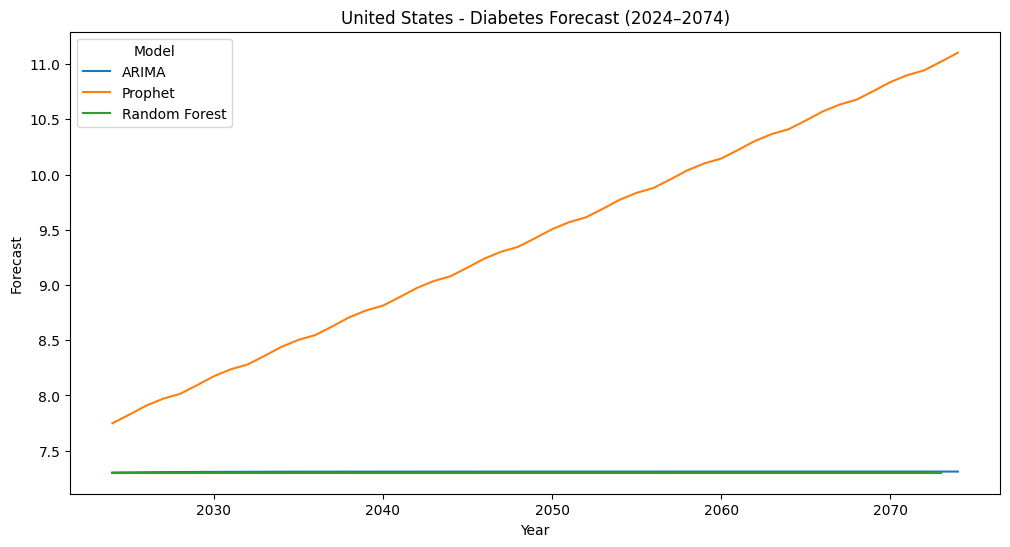

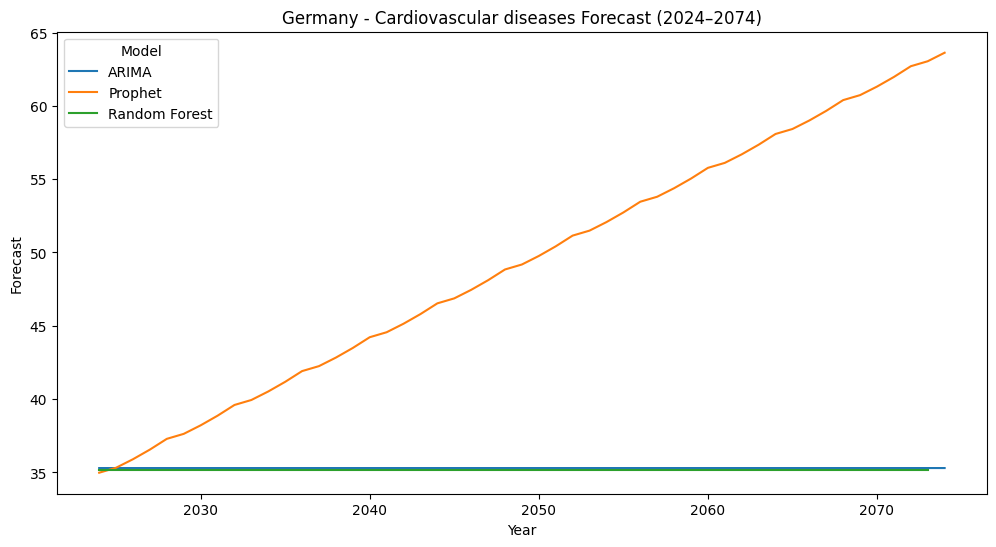

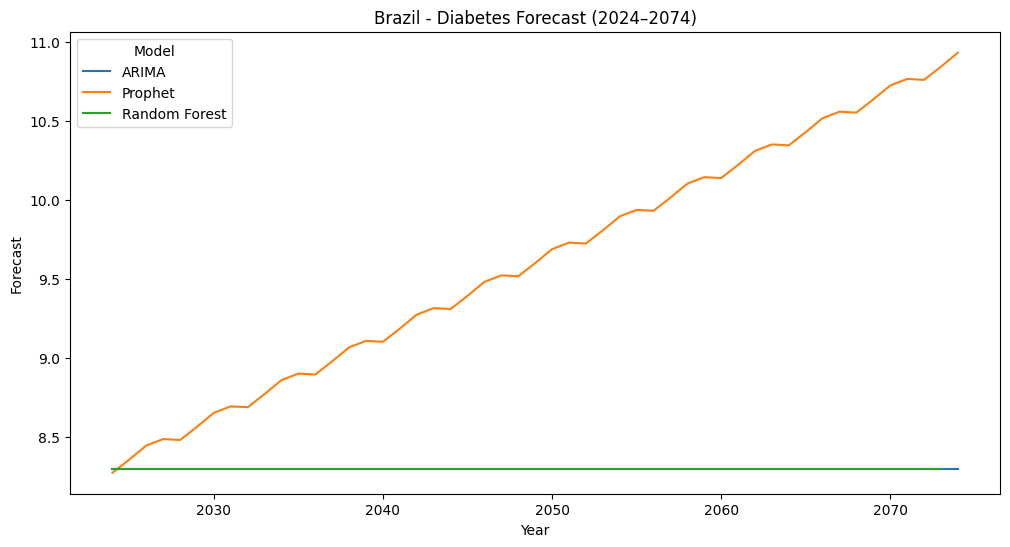

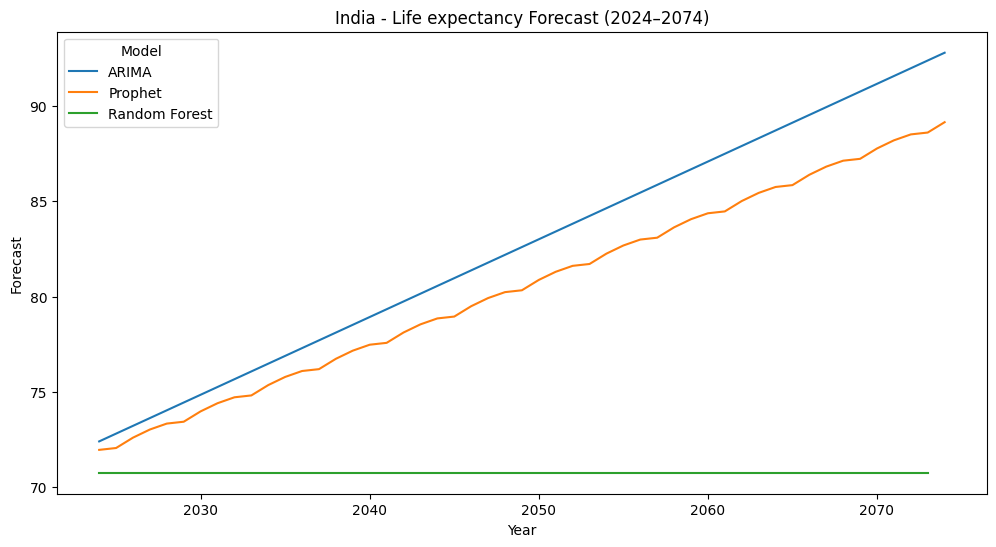

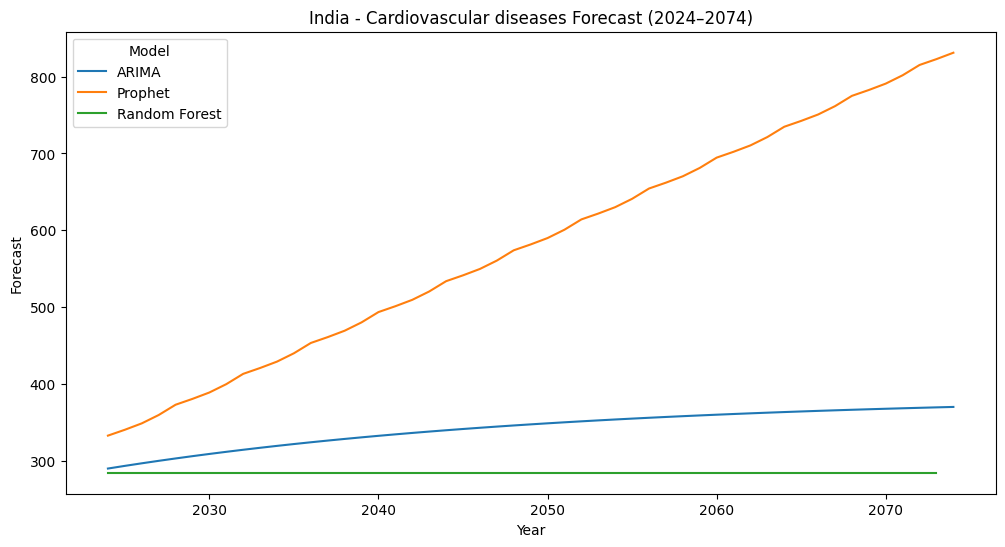

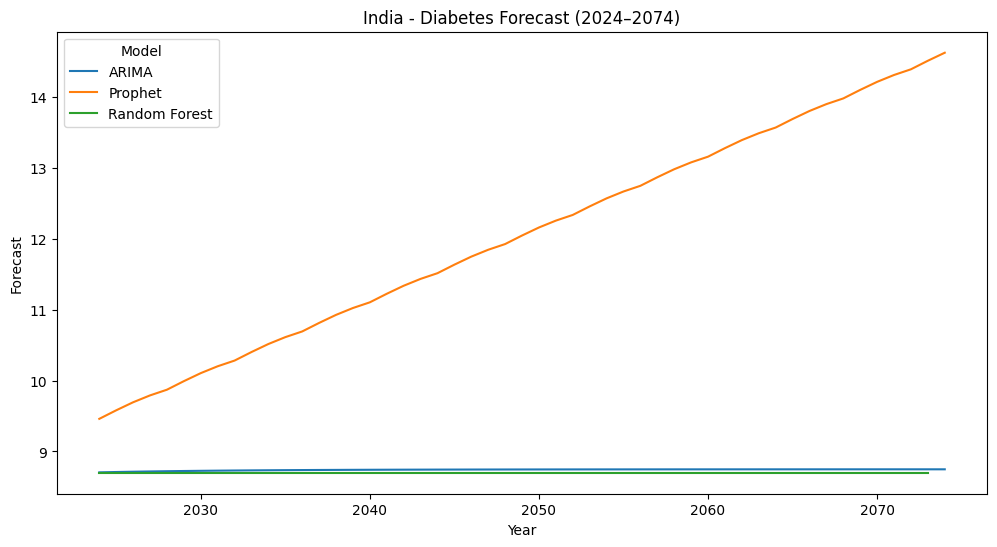

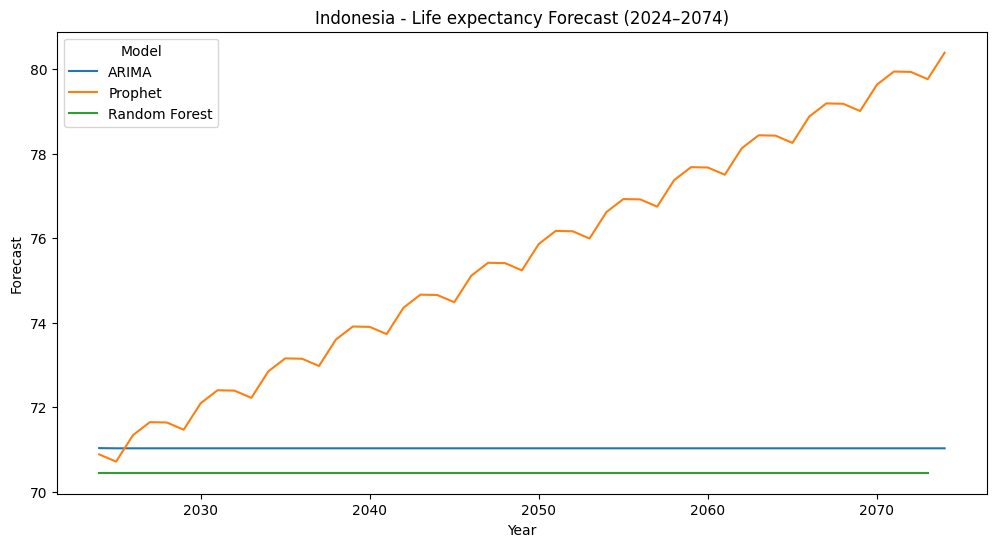

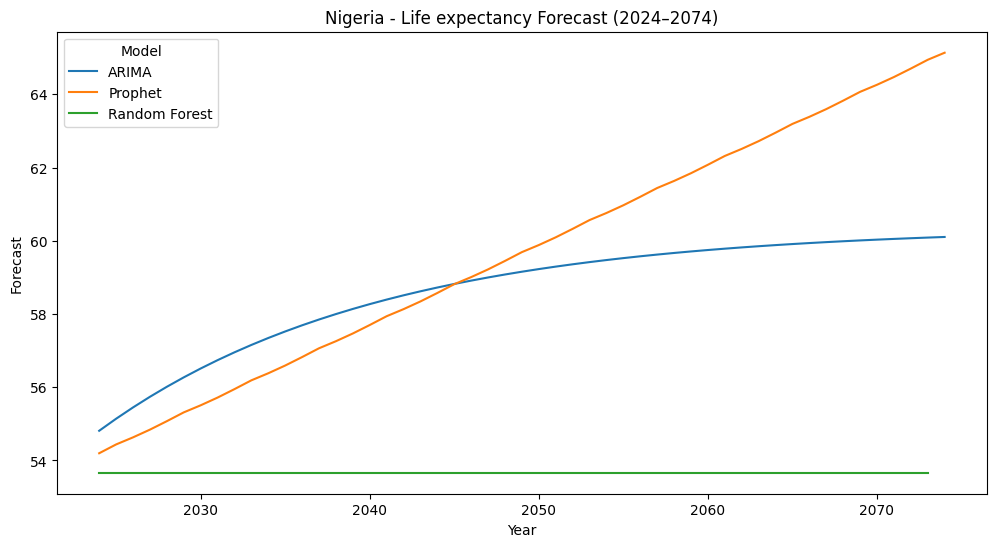

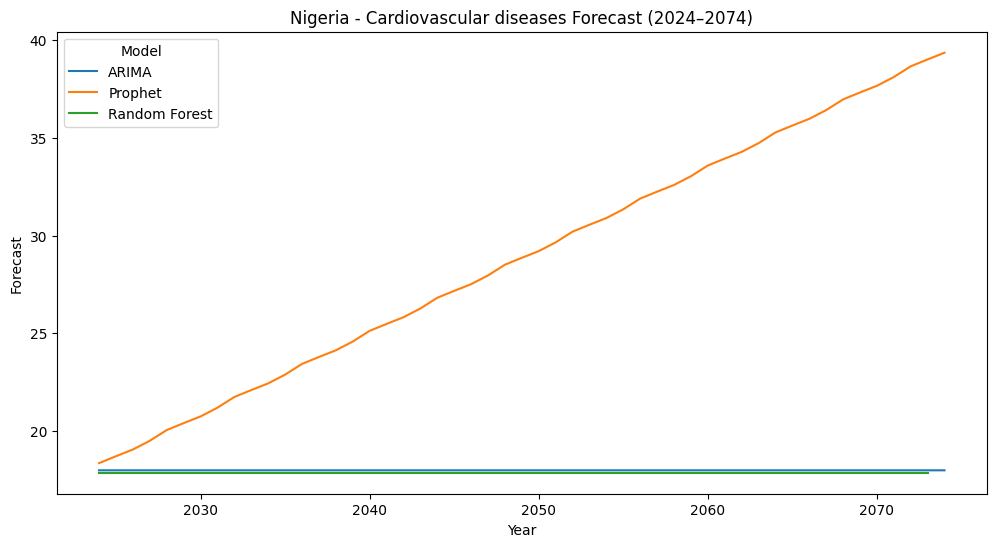

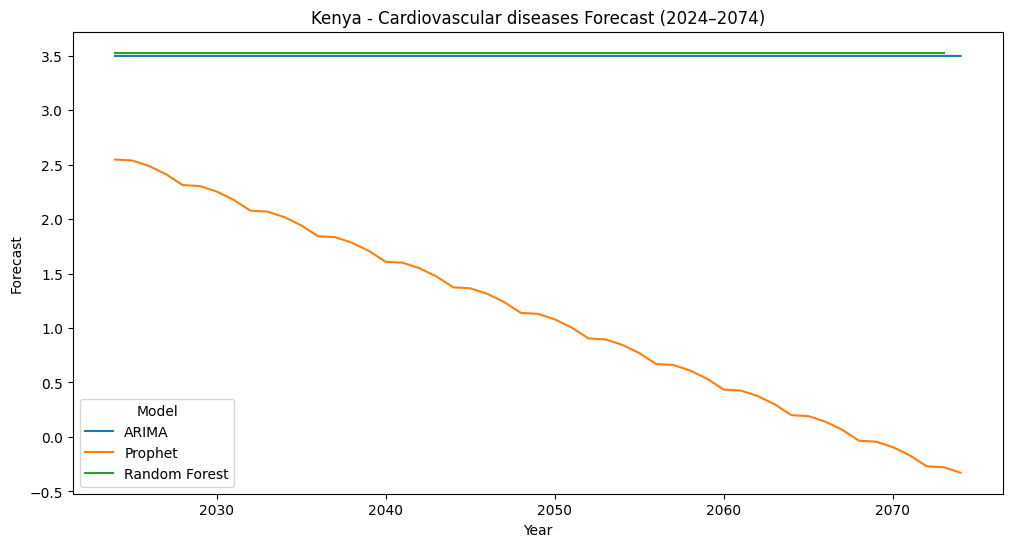

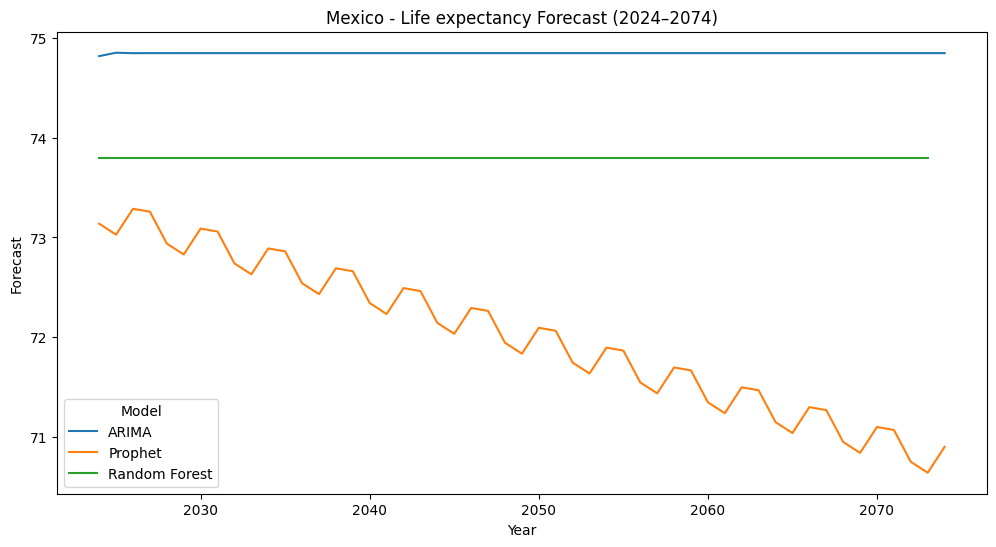

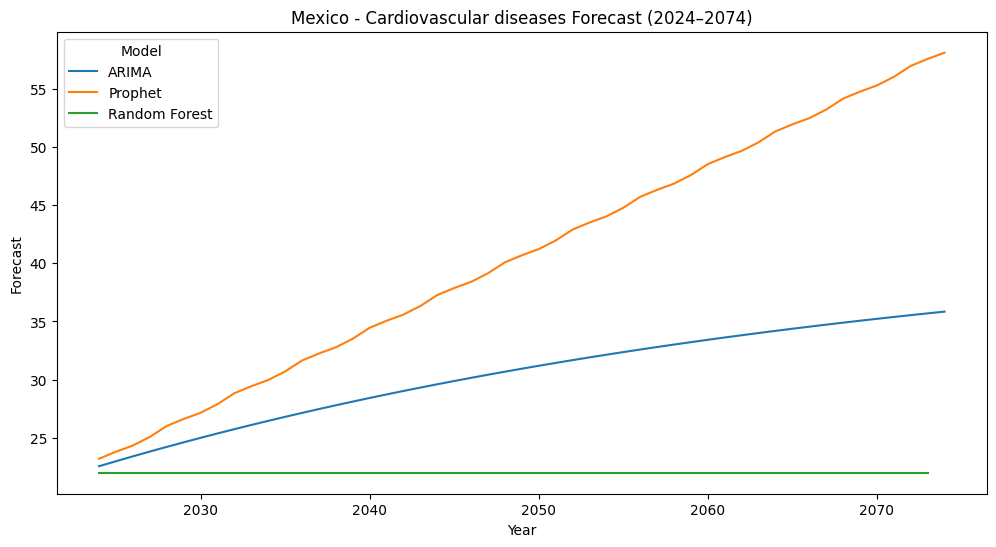

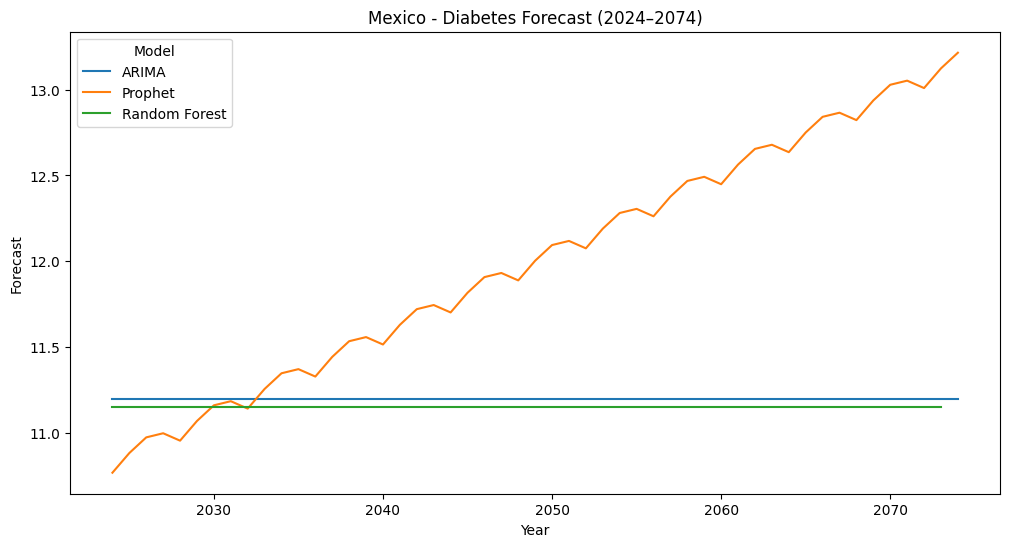

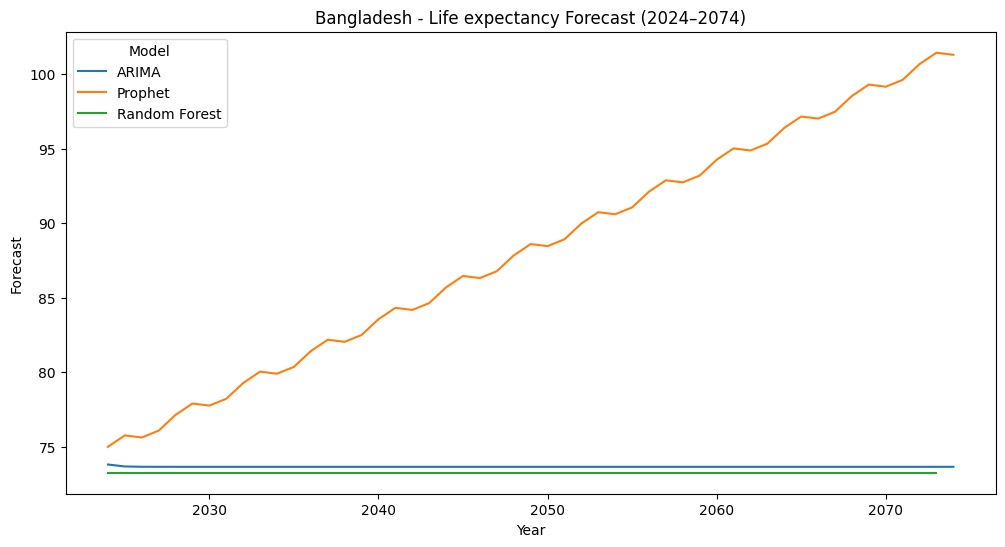

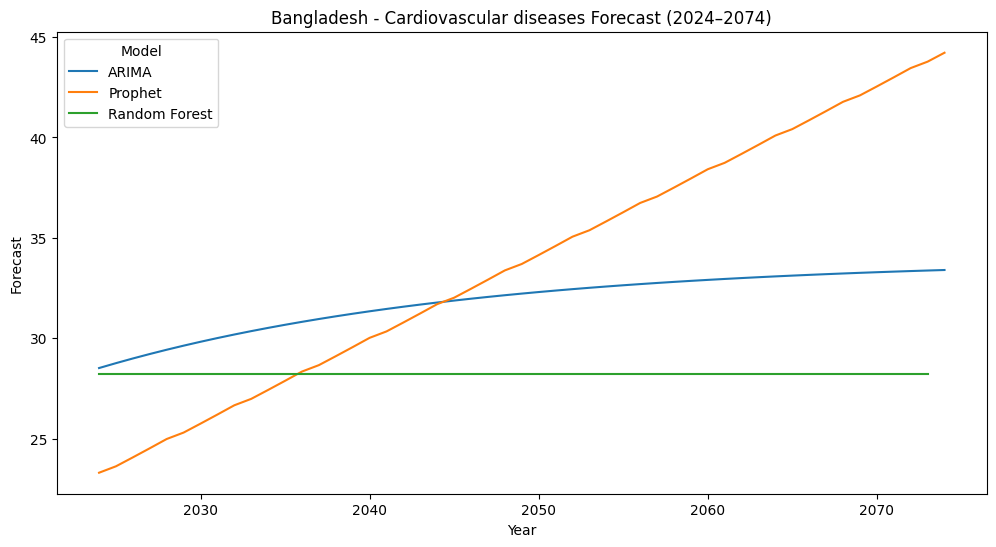

In [62]:
# Visaul Comparison ARIMA,Prophet and Random Forest
import seaborn as sns
import matplotlib.pyplot as plt

for country in selected_countries:
    for target in target_columns:
        df_plot = df_final_forecast_all[
            (df_final_forecast_all['Country'] == country) &
            (df_final_forecast_all['Target'] == target)
        ]
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=df_plot, x='Year', y='Forecast', hue='Model')
        plt.title(f"{country} - {target} Forecast (2024–2074)")
        plt.show()

In [73]:
# Time-based data split

train_end_year = 2020
val_years = [2021, 2022, 2023]
forecast_years = list(range(2024, 2076))  # up to 2075

In [84]:
## Actual and Forecast comparison 2021 - 2023  - ARIMA

print("Starting ARIMA training, validation, and forecasting...")

results = []  # store model outputs
metrics = []  # store evaluation metrics
arima_val_all = []

from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor

for country in selected_countries:
    print(f"\nProcessing country: {country}")
    df_country = df_forecast_ready[df_forecast_ready['Country'] == country].copy()

    for target in target_columns:
        if target not in df_country.columns:
            print(f"Skipping target {target} for country {country} (not in columns)")
            continue

        print(f"  Processing target: {target}")
        train_df = df_country[df_country['Year'] <= train_end_year].copy()
        val_df = df_country[df_country['Year'].isin(val_years)].copy()
        forecast_df = df_country[df_country['Year'].isin(forecast_years)].copy()

        # Prepare time series
        ts_train = train_df.set_index(pd.to_datetime(train_df['Year'], format='%Y'))[target].astype(float)
        print(f"    Training data points: {len(ts_train)}")

        ### --- ARIMA ---
        try:
            model_arima = ARIMA(ts_train, order=(1,1,1)).fit()

            # Forecast 2021–2023 (Validation)
            arima_val = model_arima.predict(start='2021', end='2023')
            arima_val = arima_val.reset_index()
            arima_val.columns = ['Year', 'Forecast']
            arima_val['Year'] = arima_val['Year'].dt.year

            # Align actual values
            actuals = val_df.set_index('Year')[target].reindex(arima_val['Year']).values
            arima_val['Actual'] = actuals

            # Check for missing actual values
            if pd.isnull(arima_val['Actual']).any():
                print(f"    Warning: Missing actual values in validation for {country} - {target}")

            arima_val['Model'] = 'ARIMA'
            arima_val['Target'] = target
            arima_val['Country'] = country

            # Evaluation
            mae = mean_absolute_error(arima_val['Actual'], arima_val['Forecast'])
            rmse = mean_squared_error(arima_val['Actual'], arima_val['Forecast']) ** 0.5
            metrics.append({'Country': country, 'Target': target, 'Model': 'ARIMA', 'MAE': mae, 'RMSE': rmse})

            print(f"    Validation MAE: {mae:.4f}, RMSE: {rmse:.4f}")

            # Forecast 2024–2074 (note changed end to 2074 to match your forecast_years)
            arima_forecast = model_arima.predict(start='2024', end='2074').reset_index()
            arima_forecast.columns = ['Year', 'Forecast']
            arima_forecast['Year'] = arima_forecast['Year'].dt.year
            arima_forecast['Model'] = 'ARIMA'
            arima_forecast['Target'] = target
            arima_forecast['Country'] = country
            arima_val_all.append(arima_val)      # in ARIMA block

            results.append(arima_forecast)

            print(f"    Forecast for 2024-2074 done, points: {len(arima_forecast)}")

        except Exception as e:
            print(f"ARIMA failed for {country}-{target}: {e}")

print("\nAll done!")
print(f"Total results dataframes: {len(results)}")
print(f"Total metric entries: {len(metrics)}")

# Optionally, convert metrics list to DataFrame and print
import pandas as pd
df_metrics = pd.DataFrame(metrics)
print("\nValidation metrics summary:")
print(df_metrics)



Starting ARIMA training, validation, and forecasting...

Processing country: United States
  Processing target: Life expectancy
    Training data points: 71
    Validation MAE: 1.6505, RMSE: 1.9969
    Forecast for 2024-2074 done, points: 51
  Processing target: Cardiovascular diseases
    Training data points: 71
    Validation MAE: 1.1904, RMSE: 1.1904
    Forecast for 2024-2074 done, points: 51
  Processing target: Diabetes
    Training data points: 71
    Validation MAE: 0.0075, RMSE: 0.0080
    Forecast for 2024-2074 done, points: 51

Processing country: Germany
  Processing target: Life expectancy
    Training data points: 71
    Validation MAE: 0.3551, RMSE: 0.4746
    Forecast for 2024-2074 done, points: 51
  Processing target: Cardiovascular diseases
    Training data points: 71
    Validation MAE: 0.4339, RMSE: 0.4339
    Forecast for 2024-2074 done, points: 51
  Processing target: Diabetes
    Training data points: 71
    Validation MAE: 0.0000, RMSE: 0.0000
    Forecast for

In [86]:
# ## Actual and Forecast comparison 2021 - 2023  - - Prophet - REVISED
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Initialize lists to store results and metrics
results = []
metrics = []
prophet_val_all = []

# Loop through countries and target variables
for country in selected_countries:
    df_country = df_forecast_ready[df_forecast_ready['Country'] == country].copy()

    for target in target_columns:
        if target not in df_country.columns:
            continue

        # Split data into train, validation, and forecast sets
        train_df = df_country[df_country['Year'] <= train_end_year].copy()  # train up to 2020
        val_df = df_country[df_country['Year'].isin(val_years)].copy()      # validation 2021-2023

        try:
            # Prepare Prophet training dataframe
            prophet_df = train_df[['Year', target]].rename(columns={'Year': 'ds', target: 'y'})
            prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')

            # Fit Prophet model
            model_prophet = Prophet()
            model_prophet.fit(prophet_df)

            # Prepare future dataframe for years 2021–2075
            future_years = list(range(val_years[0], forecast_years[-1] + 1))
            future_df = pd.DataFrame({'ds': pd.to_datetime(future_years, format='%Y')})

            # Predict future
            forecast_prophet = model_prophet.predict(future_df)[['ds', 'yhat']]
            forecast_prophet.columns = ['Year', 'Forecast']
            forecast_prophet['Year'] = forecast_prophet['Year'].dt.year

            # Validation predictions (2021-2023)
            prophet_val = forecast_prophet[forecast_prophet['Year'].isin(val_years)].copy()
            prophet_val['Actual'] = val_df.set_index('Year')[target].reindex(prophet_val['Year']).values

            # Add metadata
            prophet_val['Model'] = 'Prophet'
            prophet_val['Target'] = target
            prophet_val['Country'] = country

            # Calculate metrics for validation period
            mae = mean_absolute_error(prophet_val['Actual'], prophet_val['Forecast'])
            rmse = mean_squared_error(prophet_val['Actual'], prophet_val['Forecast']) ** 0.5
            metrics.append({
                'Country': country,
                'Target': target,
                'Model': 'Prophet',
                'MAE': mae,
                'RMSE': rmse
            })

            # Forecast 2024–2075
            prophet_forecast = forecast_prophet[forecast_prophet['Year'].isin(forecast_years)].copy()
            prophet_forecast['Model'] = 'Prophet'
            prophet_forecast['Target'] = target
            prophet_forecast['Country'] = country

            # Append forecast results
            results.append(prophet_forecast)
            prophet_val_all.append(prophet_val)  # in Prophet block


        except Exception as e:
            print(f"Prophet failed for {country}-{target}: {e}")

# After looping, convert metrics list to DataFrame and show summary
df_metrics = pd.DataFrame(metrics)
print("\nProphet Model Validation Metrics:")
print(df_metrics)

# Optional: Save metrics to CSV
# df_metrics.to_csv('prophet_validation_metrics.csv', index=False)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/hui4l3oe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/i_1t15tb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18183', 'data', 'file=/tmp/tmpfus6j9tk/hui4l3oe.json', 'init=/tmp/tmpfus6j9tk/i_1t15tb.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model_9q411uu/prophet_model-20250715004239.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:42:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:42:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali


Prophet Model Validation Metrics:
          Country                   Target    Model        MAE       RMSE
0   United States          Life expectancy  Prophet   1.258482   1.561422
1   United States  Cardiovascular diseases  Prophet  11.905792  11.974926
2   United States                 Diabetes  Prophet   0.485264   0.489566
3         Germany          Life expectancy  Prophet   0.525293   0.612408
4         Germany  Cardiovascular diseases  Prophet   2.056124   2.125500
5         Germany                 Diabetes  Prophet   2.756360   2.758175
6           Japan          Life expectancy  Prophet   0.493246   0.576474
7           Japan  Cardiovascular diseases  Prophet   7.661805   7.688441
8           Japan                 Diabetes  Prophet   1.840223   1.841061
9          Brazil          Life expectancy  Prophet   1.966449   2.189554
10         Brazil  Cardiovascular diseases  Prophet   6.513924   6.547227
11         Brazil                 Diabetes  Prophet   0.177966   0.186005
12 

In [106]:
# ## Actual and Forecast comparison 2021 - 2023  - - Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

def create_lag_features(df, target, lags=[1]):
    for lag in lags:
        df[f'lag_{lag}'] = df[target].shift(lag)
    return df

results = []       # to store forecast results
metrics = []       # to store error metrics
rf_val_all = []    # to store validation predictions for RF

for country in selected_countries:
    df_country = df_forecast_ready[df_forecast_ready['Country'] == country].copy()

    for target in target_columns:
        if target not in df_country.columns:
            continue

        df_country = df_country.sort_values('Year').reset_index(drop=True)
        df_country = create_lag_features(df_country, target, lags=[1])
        df_country = df_country.dropna(subset=['lag_1']).reset_index(drop=True)

        # Split into train and validation
        train_df = df_country[df_country['Year'] <= train_end_year].copy()
        val_df = df_country[df_country['Year'].isin(val_years)].copy()

        feature_cols = ['lag_1']
        X_train = train_df[feature_cols]
        y_train = train_df[target]

        X_val = val_df[feature_cols]
        y_val = val_df[target]

        try:
            # Train Random Forest model
            rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_model.fit(X_train, y_train)

            # Predict on validation set
            val_preds = rf_model.predict(X_val)

            # Calculate metrics
            mae = mean_absolute_error(y_val, val_preds)
            rmse = mean_squared_error(y_val, val_preds) ** 0.5
            metrics.append({
                'Country': country,
                'Target': target,
                'Model': 'RandomForest',
                'MAE': mae,
                'RMSE': rmse
            })

            # Prepare validation results for concatenation later
            val_df_rf = val_df[['Year', target]].copy()
            val_df_rf['Forecast'] = val_preds
            val_df_rf['Actual'] = val_df_rf[target]
            val_df_rf['Model'] = 'RandomForest'
            val_df_rf['Target'] = target
            val_df_rf['Country'] = country
            rf_val_all.append(val_df_rf[['Year', 'Actual', 'Forecast', 'Model', 'Target', 'Country']])

            # Forecast future years recursively (2024 - 2075)
            forecast_years_list = list(range(forecast_years[0], forecast_years[-1] + 1))
            forecast_records = []

            combined_df = pd.concat([train_df, val_df], ignore_index=True).sort_values('Year').reset_index(drop=True)
            last_known_year = combined_df['Year'].max()
            lag_1_val = combined_df.loc[combined_df['Year'] == last_known_year, target].values[0]

            for year in forecast_years_list:
                X_pred = pd.DataFrame({'lag_1': [lag_1_val]})
                pred = rf_model.predict(X_pred)[0]

                forecast_records.append({
                    'Year': year,
                    'Forecast': pred,
                    'Model': 'RandomForest',
                    'Target': target,
                    'Country': country
                })

                lag_1_val = pred

            forecast_df = pd.DataFrame(forecast_records)
            results.append(forecast_df)

        except Exception as e:
            print(f"Random Forest failed for {country}-{target}: {e}")

# After looping through countries and targets
df_metrics_rf = pd.DataFrame(metrics)
print("Random Forest Validation Metrics Summary:")
print(df_metrics_rf)

# Optional: save metrics to CSV
# df_metrics.to_csv('random_forest_metrics_summary.csv', index=False)

Random Forest Validation Metrics Summary:
          Country                   Target         Model           MAE  \
0   United States          Life expectancy  RandomForest  1.072507e+00   
1   United States  Cardiovascular diseases  RandomForest  2.428093e+00   
2   United States                 Diabetes  RandomForest  7.993606e-15   
3         Germany          Life expectancy  RandomForest  4.278093e-01   
4         Germany  Cardiovascular diseases  RandomForest  1.222081e+00   
5         Germany                 Diabetes  RandomForest  0.000000e+00   
6           Japan          Life expectancy  RandomForest  3.442503e-01   
7           Japan  Cardiovascular diseases  RandomForest  2.097032e+00   
8           Japan                 Diabetes  RandomForest  4.440892e-15   
9          Brazil          Life expectancy  RandomForest  1.296734e+00   
10         Brazil  Cardiovascular diseases  RandomForest  2.116450e+00   
11         Brazil                 Diabetes  RandomForest  1.243450e-14

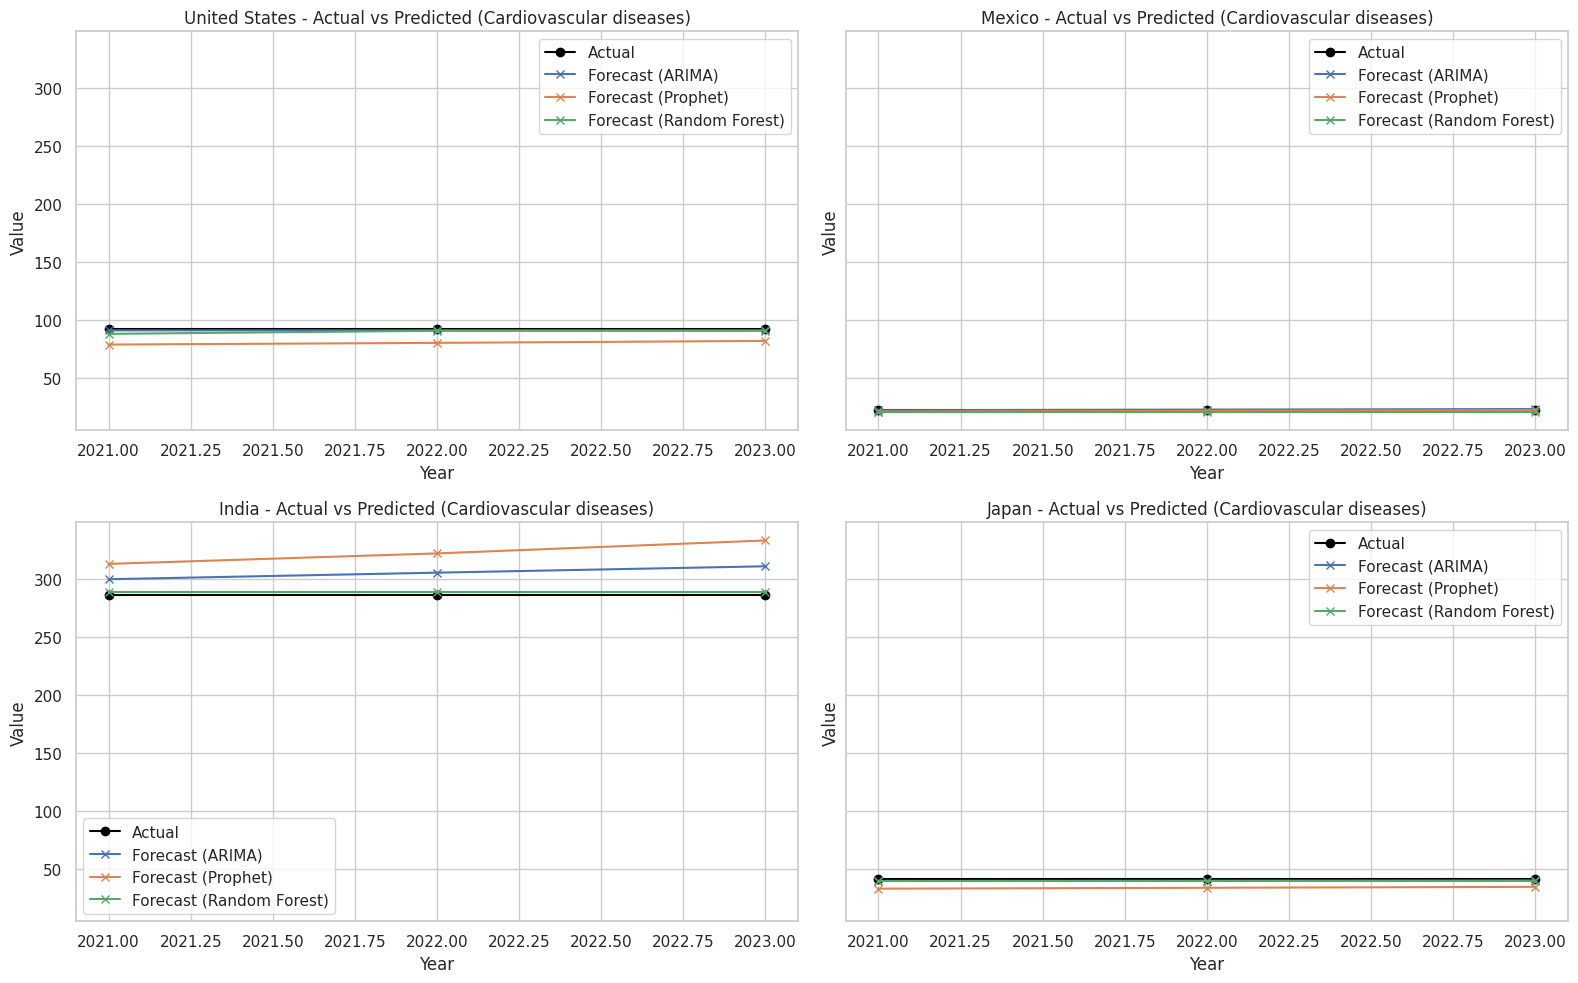

In [107]:
# Plot comparison for 4 countries

import matplotlib.pyplot as plt
import seaborn as sns

# Countries and years to plot
countries_to_plot = ['United States', 'Mexico', 'India', 'Japan']
years_to_plot = [2021, 2022, 2023]

# combine all result into one dataframe
val_results = pd.concat([
    pd.concat(arima_val_all, ignore_index=True),
    pd.concat(prophet_val_all, ignore_index=True),
    pd.concat(rf_val_all, ignore_index=True)
], ignore_index=True)

val_results['Model'] = val_results['Model'].replace({'RandomForest': 'Random Forest'})

# Filter validation results for these countries and years
plot_df = val_results[
    (val_results['Country'].isin(countries_to_plot)) &
    (val_results['Year'].isin(years_to_plot))
].copy()

# Example for one target variable, say target = 'Cardiovascular diseases'
target_of_interest = 'Cardiovascular diseases'
plot_df = plot_df[plot_df['Target'] == target_of_interest]

# Set seaborn style
sns.set(style="whitegrid")

# Create a separate plot for each country with actual vs predicted lines for each model
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharey=True)
axs = axs.flatten()

for i, country in enumerate(countries_to_plot):
    ax = axs[i]
    country_data = plot_df[plot_df['Country'] == country]

    # Plot Actual values
    actual_data = country_data[['Year', 'Actual']].drop_duplicates()
    ax.plot(actual_data['Year'], actual_data['Actual'], label='Actual', color='black', marker='o')

    # Plot Forecasts from each model
    for model in country_data['Model'].unique():
        model_data = country_data[country_data['Model'] == model]
        ax.plot(model_data['Year'], model_data['Forecast'], label=f'Forecast ({model})', marker='x')

    ax.set_title(f'{country} - Actual vs Predicted ({target_of_interest})')
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

## Metric Summary

In [112]:
# Metric summary
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define your split years
train_end_year = 2020
val_years = [2021, 2022, 2023]
forecast_years = list(range(2024, 2076))

# Initialize containers
arima_val_all = []
prophet_val_all = []
rf_val_all = []
arima_forecast_all = []
prophet_forecast_all = []
rf_forecast_all = []
metrics = []

for country in selected_countries:
    df_country = df_forecast_ready[df_forecast_ready['Country'] == country].copy()

    for target in target_columns:
        if target not in df_country.columns:
            print(f"Skipping {target} for {country} — target not in dataframe columns.")
            continue

        # Prepare train, val, forecast splits
        train_df = df_country[df_country['Year'] <= train_end_year].copy()
        val_df = df_country[df_country['Year'].isin(val_years)].copy()
        forecast_df = df_country[df_country['Year'].isin(forecast_years)].copy()

        print(f"\nProcessing {country} - {target}")
        print(f"Train shape: {train_df.shape}, Val shape: {val_df.shape}, Forecast shape: {forecast_df.shape}")

        # --- ARIMA ---
        try:
            ts_train = train_df.set_index(pd.to_datetime(train_df['Year'], format='%Y'))[target].astype(float)
            model_arima = ARIMA(ts_train, order=(1,1,1)).fit()

            arima_val = model_arima.predict(start='2021', end='2023').reset_index()
            arima_val.columns = ['Year', 'Forecast']
            arima_val['Year'] = arima_val['Year'].dt.year
            arima_val['Actual'] = val_df.set_index('Year')[target].reindex(arima_val['Year']).values
            arima_val['Model'] = 'ARIMA'
            arima_val['Target'] = target
            arima_val['Country'] = country
            arima_val_all.append(arima_val)

            mae = mean_absolute_error(arima_val['Actual'], arima_val['Forecast'])
            rmse = mean_squared_error(prophet_val['Actual'], prophet_val['Forecast']) ** 0.5
            metrics.append({'Country': country, 'Target': target, 'Model': 'ARIMA', 'MAE': mae, 'RMSE': rmse})
            print(f"ARIMA metrics: MAE={mae:.4f}, RMSE={rmse:.4f}")

            arima_forecast = model_arima.predict(start='2024', end='2075').reset_index()
            arima_forecast.columns = ['Year', 'Forecast']
            arima_forecast['Year'] = arima_forecast['Year'].dt.year
            arima_forecast['Model'] = 'ARIMA'
            arima_forecast['Target'] = target
            arima_forecast['Country'] = country
            arima_forecast_all.append(arima_forecast)

        except Exception as e:
            print(f"ARIMA failed for {country}-{target}: {e}")

        # --- Prophet ---
        try:
            prophet_df = train_df[['Year', target]].rename(columns={'Year': 'ds', target: 'y'})
            prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')
            model_prophet = Prophet()
            model_prophet.fit(prophet_df)

            future_df = pd.DataFrame({'ds': pd.to_datetime(list(range(2021, 2076)), format='%Y')})
            forecast_prophet = model_prophet.predict(future_df)[['ds', 'yhat']]
            forecast_prophet.columns = ['Year', 'Forecast']
            forecast_prophet['Year'] = forecast_prophet['Year'].dt.year

            prophet_val = forecast_prophet[forecast_prophet['Year'].isin(val_years)].copy()
            prophet_val['Actual'] = val_df.set_index('Year')[target].reindex(prophet_val['Year']).values
            prophet_val['Model'] = 'Prophet'
            prophet_val['Target'] = target
            prophet_val['Country'] = country
            prophet_val_all.append(prophet_val)

            mae = mean_absolute_error(prophet_val['Actual'], prophet_val['Forecast'])
            rmse = mean_squared_error(prophet_val['Actual'], prophet_val['Forecast']) ** 0.5
            metrics.append({'Country': country, 'Target': target, 'Model': 'Prophet', 'MAE': mae, 'RMSE': rmse})
            print(f"Prophet metrics: MAE={mae:.4f}, RMSE={rmse:.4f}")

            prophet_forecast = forecast_prophet[forecast_prophet['Year'].isin(forecast_years)].copy()
            prophet_forecast['Model'] = 'Prophet'
            prophet_forecast['Target'] = target
            prophet_forecast['Country'] = country
            prophet_forecast_all.append(prophet_forecast)

        except Exception as e:
            print(f"Prophet failed for {country}-{target}: {e}")

        # --- Random Forest ---
        try:
            features = selected_features_dict.get(target, [])
            features_available = [f for f in features if f in df_country.columns]

            if len(features_available) == 0:
                print(f"No features available for Random Forest on {country}-{target}, skipping.")
                continue

            X_train = train_df[features_available]
            y_train = train_df[target]
            X_val = val_df[features_available]
            y_val = val_df[target]
            X_forecast = forecast_df[features_available]

            model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
            model_rf.fit(X_train, y_train)

            rf_val_pred = model_rf.predict(X_val)
            rf_val = pd.DataFrame({
                'Year': val_df['Year'].values,
                'Forecast': rf_val_pred,
                'Actual': val_df[target].values,
                'Model': 'RandomForest',
                'Target': target,
                'Country': country
            })
            rf_val_all.append(rf_val)

            mae = mean_absolute_error(rf_val['Actual'], rf_val['Forecast'])
            rmse = mean_squared_error(prophet_val['Actual'], prophet_val['Forecast']) ** 0.5
            metrics.append({'Country': country, 'Target': target, 'Model': 'RandomForest', 'MAE': mae, 'RMSE': rmse})
            print(f"Random Forest metrics: MAE={mae:.4f}, RMSE={rmse:.4f}")

            rf_forecast_pred = model_rf.predict(X_forecast)
            rf_forecast = pd.DataFrame({
                'Year': forecast_df['Year'].values,
                'Forecast': rf_forecast_pred,
                'Model': 'RandomForest',
                'Target': target,
                'Country': country
            })
            rf_forecast_all.append(rf_forecast)

        except Exception as e:
            print(f"Random Forest failed for {country}-{target}: {e}")

# Combine all validation results and forecasts
try:
    val_results = pd.concat([
        pd.concat(arima_val_all, ignore_index=True),
        pd.concat(prophet_val_all, ignore_index=True),
        pd.concat(rf_val_all, ignore_index=True)
    ], ignore_index=True)

    results = pd.concat([
        pd.concat(arima_forecast_all, ignore_index=True),
        pd.concat(prophet_forecast_all, ignore_index=True),
        pd.concat(rf_forecast_all, ignore_index=True)
    ], ignore_index=True)

    metrics_df = pd.DataFrame(metrics)

    print("\nFinal Metrics Summary:")
    print(metrics_df)

except Exception as e:
    print(f"Error combining results: {e}")


Processing United States - Life expectancy
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/lp2xr3es.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/lwqopb8d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55104', 'data', 'file=/tmp/tmpfus6j9tk/lp2xr3es.json', 'init=/tmp/tmpfus6j9tk/lwqopb8d.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model7sdvhfdr/prophet_model-20250715013244.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:32:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=1.6505, RMSE=3.4797


01:32:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=1.2585, RMSE=1.5614
Random Forest metrics: MAE=0.9315, RMSE=1.5614

Processing United States - Cardiovascular diseases
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/7dqv8po0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/dbhwgbpp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42318', 'data', 'file=/tmp/tmpfus6j9tk/7dqv8po0.json', 'init=/tmp/tmpfus6j9tk/dbhwgbpp.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model7_zxx1ja/prophet_model-20250715013246.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:32:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=1.1904, RMSE=1.5614


01:32:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=11.9058, RMSE=11.9749
Random Forest metrics: MAE=4.2320, RMSE=11.9749

Processing United States - Diabetes
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/m2y3n56p.json


ARIMA metrics: MAE=0.0075, RMSE=11.9749


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/44hwzitv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30025', 'data', 'file=/tmp/tmpfus6j9tk/m2y3n56p.json', 'init=/tmp/tmpfus6j9tk/44hwzitv.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modela3ocohtf/prophet_model-20250715013249.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:32:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:32:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=0.4853, RMSE=0.4896
Random Forest metrics: MAE=0.0047, RMSE=0.4896

Processing Germany - Life expectancy
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/3sz40meh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/zdalmpb5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28363', 'data', 'file=/tmp/tmpfus6j9tk/3sz40meh.json', 'init=/tmp/tmpfus6j9tk/zdalmpb5.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model6e_5cj13/prophet_model-20250715013252.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:32:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=0.3551, RMSE=0.4896


01:32:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=0.5253, RMSE=0.6124
Random Forest metrics: MAE=0.3323, RMSE=0.6124

Processing Germany - Cardiovascular diseases
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/bzkp9vmx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/3uywljos.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82198', 'data', 'file=/tmp/tmpfus6j9tk/bzkp9vmx.json', 'init=/tmp/tmpfus6j9tk/3uywljos.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelz_c3ydql/prophet_model-20250715013255.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:32:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=0.4339, RMSE=0.6124


01:32:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=2.0561, RMSE=2.1255
Random Forest metrics: MAE=0.8260, RMSE=2.1255

Processing Germany - Diabetes
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/k7b392mt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/7odsjvc7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87263', 'data', 'file=/tmp/tmpfus6j9tk/k7b392mt.json', 'init=/tmp/tmpfus6j9tk/7odsjvc7.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelj1zwal7u/prophet_model-20250715013259.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:32:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=0.0000, RMSE=2.1255


01:33:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=2.7564, RMSE=2.7582
Random Forest metrics: MAE=0.0000, RMSE=2.7582

Processing Japan - Life expectancy
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/yhzhe44m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/awb2xecp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37972', 'data', 'file=/tmp/tmpfus6j9tk/yhzhe44m.json', 'init=/tmp/tmpfus6j9tk/awb2xecp.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelxuowyewa/prophet_model-20250715013303.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=0.5732, RMSE=2.7582


01:33:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=0.4932, RMSE=0.5765
Random Forest metrics: MAE=0.2536, RMSE=0.5765

Processing Japan - Cardiovascular diseases
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/0dd6bo06.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/v09pw08m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33836', 'data', 'file=/tmp/tmpfus6j9tk/0dd6bo06.json', 'init=/tmp/tmpfus6j9tk/v09pw08m.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model0jq4m38_/prophet_model-20250715013306.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=1.5380, RMSE=0.5765


01:33:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=7.6618, RMSE=7.6884
Random Forest metrics: MAE=2.5516, RMSE=7.6884

Processing Japan - Diabetes
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/4lda9z4a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/dgn96yeh.json


ARIMA metrics: MAE=0.0000, RMSE=7.6884


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34795', 'data', 'file=/tmp/tmpfus6j9tk/4lda9z4a.json', 'init=/tmp/tmpfus6j9tk/dgn96yeh.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model4s_j3mqt/prophet_model-20250715013310.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:33:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=1.8402, RMSE=1.8411
Random Forest metrics: MAE=0.0000, RMSE=1.8411

Processing Brazil - Life expectancy
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/zx2solcy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/7dnc84x8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6853', 'data', 'file=/tmp/tmpfus6j9tk/zx2solcy.json', 'init=/tmp/tmpfus6j9tk/7dnc84x8.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelb61jrxw_/prophet_model-20250715013313.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=2.4778, RMSE=1.8411


01:33:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=1.9664, RMSE=2.1896
Random Forest metrics: MAE=0.9191, RMSE=2.1896

Processing Brazil - Cardiovascular diseases
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/sf1qeort.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/ag2te2k8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73017', 'data', 'file=/tmp/tmpfus6j9tk/sf1qeort.json', 'init=/tmp/tmpfus6j9tk/ag2te2k8.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model0xtt_nse/prophet_model-20250715013316.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=1.8161, RMSE=2.1896


01:33:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=6.5139, RMSE=6.5472
Random Forest metrics: MAE=2.3173, RMSE=6.5472

Processing Brazil - Diabetes
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/akzbt40g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/m11o07d5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47290', 'data', 'file=/tmp/tmpfus6j9tk/akzbt40g.json', 'init=/tmp/tmpfus6j9tk/m11o07d5.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model9qg4lv1o/prophet_model-20250715013317.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=0.0000, RMSE=6.5472


01:33:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=0.1780, RMSE=0.1860
Random Forest metrics: MAE=0.0293, RMSE=0.1860

Processing India - Life expectancy
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/utdpvitf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/cb80ulgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91911', 'data', 'file=/tmp/tmpfus6j9tk/utdpvitf.json', 'init=/tmp/tmpfus6j9tk/cb80ulgt.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelhx191ucv/prophet_model-20250715013319.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=1.5416, RMSE=0.1860


01:33:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=1.6435, RMSE=2.4758
Random Forest metrics: MAE=2.7177, RMSE=2.4758

Processing India - Cardiovascular diseases
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/pki5n9rk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/slkj_zeq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3742', 'data', 'file=/tmp/tmpfus6j9tk/pki5n9rk.json', 'init=/tmp/tmpfus6j9tk/slkj_zeq.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelos4p9bwh/prophet_model-20250715013323.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=19.1265, RMSE=2.4758


01:33:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=36.4959, RMSE=37.4210
Random Forest metrics: MAE=12.9403, RMSE=37.4210

Processing India - Diabetes
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/lmsiao1r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/23h9q0kv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23117', 'data', 'file=/tmp/tmpfus6j9tk/lmsiao1r.json', 'init=/tmp/tmpfus6j9tk/23h9q0kv.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelzc9wfk9k/prophet_model-20250715013325.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=0.0185, RMSE=37.4210


01:33:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=0.8255, RMSE=0.8306
Random Forest metrics: MAE=0.0350, RMSE=0.8306

Processing Indonesia - Life expectancy
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/lfjkf38d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/ofcfzhc1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47535', 'data', 'file=/tmp/tmpfus6j9tk/lfjkf38d.json', 'init=/tmp/tmpfus6j9tk/ofcfzhc1.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model_fqirytp/prophet_model-20250715013328.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=1.8730, RMSE=0.8306


01:33:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=0.9978, RMSE=1.6929
Random Forest metrics: MAE=1.7877, RMSE=1.6929

Processing Indonesia - Cardiovascular diseases
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/e0oyc6ue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/_dfggz84.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6197', 'data', 'file=/tmp/tmpfus6j9tk/e0oyc6ue.json', 'init=/tmp/tmpfus6j9tk/_dfggz84.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model0wjif5fm/prophet_model-20250715013330.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=8.4755, RMSE=1.6929


01:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=7.1458, RMSE=7.9981


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/1pylhlao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/3m2qgyql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79342', 'data', 'file=/tmp/tmpfus6j9tk/1pylhlao.json', 'init=/tmp/tmpfus6j9tk/3m2qgyql.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelysu6ay46/prophet_model-20250715013331.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Random Forest metrics: MAE=7.3518, RMSE=7.9981

Processing Indonesia - Diabetes
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)
ARIMA metrics: MAE=0.0000, RMSE=7.9981


01:33:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=0.7114, RMSE=0.7121
Random Forest metrics: MAE=0.0090, RMSE=0.7121

Processing Nigeria - Life expectancy
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/hh1ew7tu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/8uj6t3mg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35486', 'data', 'file=/tmp/tmpfus6j9tk/hh1ew7tu.json', 'init=/tmp/tmpfus6j9tk/8uj6t3mg.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelaiihawkz/prophet_model-20250715013333.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=0.6316, RMSE=0.7121


01:33:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=0.3170, RMSE=0.3693
Random Forest metrics: MAE=6.3654, RMSE=0.3693

Processing Nigeria - Cardiovascular diseases
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ARIMA metrics: MAE=0.7163, RMSE=0.3693


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/tgz_dxm5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/0rl8o_po.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90553', 'data', 'file=/tmp/tmpfus6j9tk/tgz_dxm5.json', 'init=/tmp/tmpfus6j9tk/0rl8o_po.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelt9o2cdoe/prophet_model-20250715013336.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:33:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=4.4918, RMSE=4.4984
Random Forest metrics: MAE=1.7240, RMSE=4.4984

Processing Nigeria - Diabetes
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)
ARIMA metrics: MAE=0.0000, RMSE=4.4984


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/5_3v6uov.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/78c1ksvl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76930', 'data', 'file=/tmp/tmpfus6j9tk/5_3v6uov.json', 'init=/tmp/tmpfus6j9tk/78c1ksvl.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modeln_42r3nw/prophet_model-20250715013338.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:33:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=0.1278, RMSE=0.1408
Random Forest metrics: MAE=0.0040, RMSE=0.1408

Processing Kenya - Life expectancy
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/bj5px6st.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/snqbvejs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7073', 'data', 'file=/tmp/tmpfus6j9tk/bj5px6st.json', 'init=/tmp/tmpfus6j9tk/snqbvejs.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modele3r0jpg1/prophet_model-20250715013340.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=2.7616, RMSE=0.1408


01:33:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=1.3981, RMSE=1.6706
Random Forest metrics: MAE=0.8407, RMSE=1.6706

Processing Kenya - Cardiovascular diseases
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)
ARIMA metrics: MAE=0.1218, RMSE=1.6706


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/7g5ipfzp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/mdx5ronw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39191', 'data', 'file=/tmp/tmpfus6j9tk/7g5ipfzp.json', 'init=/tmp/tmpfus6j9tk/mdx5ronw.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelhrbfsy8z/prophet_model-20250715013342.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:33:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=0.9324, RMSE=0.9335
Random Forest metrics: MAE=0.3225, RMSE=0.9335

Processing Kenya - Diabetes
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/h0e_y8b3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/3iefok84.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11807', 'data', 'file=/tmp/tmpfus6j9tk/h0e_y8b3.json', 'init=/tmp/tmpfus6j9tk/3iefok84.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelsb5gek4j/prophet_model-20250715013343.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=0.0003, RMSE=0.9335


01:33:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=3.4788, RMSE=3.4797
Random Forest metrics: MAE=0.0070, RMSE=3.4797

Processing Mexico - Life expectancy
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/15_j0hfy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/t4mdkvxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57578', 'data', 'file=/tmp/tmpfus6j9tk/15_j0hfy.json', 'init=/tmp/tmpfus6j9tk/t4mdkvxb.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelpicl9u47/prophet_model-20250715013346.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=5.2414, RMSE=3.4797


01:33:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=1.8007, RMSE=2.4286
Random Forest metrics: MAE=2.4676, RMSE=2.4286

Processing Mexico - Cardiovascular diseases
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/e0cajn71.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/8upf4pae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84019', 'data', 'file=/tmp/tmpfus6j9tk/e0cajn71.json', 'init=/tmp/tmpfus6j9tk/8upf4pae.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelqjqj3wl6/prophet_model-20250715013349.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=0.4802, RMSE=2.4286


01:33:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=0.6810, RMSE=0.8437
Random Forest metrics: MAE=2.4129, RMSE=0.8437

Processing Mexico - Diabetes
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)
ARIMA metrics: MAE=0.0000, RMSE=0.8437


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/yqfarhh5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/36ddlap5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73900', 'data', 'file=/tmp/tmpfus6j9tk/yqfarhh5.json', 'init=/tmp/tmpfus6j9tk/36ddlap5.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelw4_6jd9d/prophet_model-20250715013352.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:33:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=0.7986, RMSE=0.7997
Random Forest metrics: MAE=0.0170, RMSE=0.7997

Processing Bangladesh - Life expectancy
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/2_vx7q85.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/nrhsi97e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73959', 'data', 'file=/tmp/tmpfus6j9tk/2_vx7q85.json', 'init=/tmp/tmpfus6j9tk/nrhsi97e.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelc5tym82v/prophet_model-20250715013353.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=2.0438, RMSE=0.7997


01:33:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=1.3652, RMSE=1.6767
Random Forest metrics: MAE=2.9804, RMSE=1.6767

Processing Bangladesh - Cardiovascular diseases
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/fq3vjj1l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/59_g5ry6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38935', 'data', 'file=/tmp/tmpfus6j9tk/fq3vjj1l.json', 'init=/tmp/tmpfus6j9tk/59_g5ry6.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_model1qulsnk7/prophet_model-20250715013355.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


ARIMA metrics: MAE=1.1376, RMSE=1.6767


01:33:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=6.9772, RMSE=6.9912


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/xe7uwlsw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfus6j9tk/kojnahqa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14413', 'data', 'file=/tmp/tmpfus6j9tk/xe7uwlsw.json', 'init=/tmp/tmpfus6j9tk/kojnahqa.json', 'output', 'file=/tmp/tmpfus6j9tk/prophet_modelmqz4v8_y/prophet_model-20250715013356.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:33:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Random Forest metrics: MAE=0.4101, RMSE=6.9912

Processing Bangladesh - Diabetes
Train shape: (71, 54), Val shape: (3, 54), Forecast shape: (50, 54)
ARIMA metrics: MAE=0.0000, RMSE=6.9912


01:33:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet metrics: MAE=2.9878, RMSE=2.9878
Random Forest metrics: MAE=0.1027, RMSE=2.9878

Final Metrics Summary:
          Country                   Target         Model        MAE       RMSE
0   United States          Life expectancy         ARIMA   1.650538   3.479734
1   United States          Life expectancy       Prophet   1.258482   1.561422
2   United States          Life expectancy  RandomForest   0.931501   1.561422
3   United States  Cardiovascular diseases         ARIMA   1.190368   1.561422
4   United States  Cardiovascular diseases       Prophet  11.905792  11.974926
..            ...                      ...           ...        ...        ...
85     Bangladesh  Cardiovascular diseases       Prophet   6.977247   6.991238
86     Bangladesh  Cardiovascular diseases  RandomForest   0.410136   6.991238
87     Bangladesh                 Diabetes         ARIMA   0.000033   6.991238
88     Bangladesh                 Diabetes       Prophet   2.987791   2.987844
89     Bangladesh  